#### Import packages

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

temp = pd.read_csv("stage3.csv")

In [4]:
temp1 = temp.dropna(subset = "gun_type")

In [5]:
#Organzied by State and time

temp2 = temp1.sort_values(by=['state', "date"])

temp3 = temp2.drop(columns=["incident_url", "address", "source_url", "incident_url_fields_missing", "incident_characteristics", "latitude", "location_description", "longitude", "notes", "sources", "state_house_district",
            "state_senate_district", "participant_name"])

#### Description of variables used

In [6]:
temp3.head(n=5)

incident_id        date    state city_or_county  n_killed  n_injured  \
465         92453  2014-01-01  Alabama     Huntsville         0          2   
959         93118  2014-01-05  Alabama     Somerville         1          0   
1046        93760  2014-01-06  Alabama         Mobile         0          0   
1986        95867  2014-01-13  Alabama         Marion         0          1   
2237        97507  2014-01-14  Alabama      Talladega         0          1   

      congressional_district              gun_stolen                gun_type  \
465                      5.0              0::Unknown              0::Unknown   
959                      5.0              0::Unknown              0::Unknown   
1046                     1.0  0::Unknown||1::Unknown  0::Unknown||1::Unknown   
1986                     7.0              0::Unknown              0::Unknown   
2237                     3.0              0::Unknown              0::Unknown   

      n_guns_involved participant_age  \
465               1.0           0::17   
959               1.0             NaN   
1046              2.0    6::16||7::16   
1986              1.0           0::39   
2237              1.0            0::9   

                         participant_age_group           participant_gender  \
465                0::Teen 12-17||1::Adult 18+             0::Male||1::Male   
959                 0::Adult 18+||1::Adult 18+         0::Female||1::Female   
1046              6::Teen 12-17||7::Teen 12-17             6::Male||7::Male   
1986  0::Adult 18+||1::Adult 18+||2::Adult 18+  0::Male||1::Male||2::Female   
2237                             0::Child 0-11                      0::Male   

     participant_relationship  \
465                       NaN   
959                 1::Family   
1046                      NaN   
1986                      NaN   
2237                      NaN   

                                     participant_status  \
465                              0::Injured||1::Injured   
959                    0::Killed||1::Unharmed, Arrested   
1046  0::Unharmed||1::Unharmed||2::Unharmed||3::Unha...   
1986               0::Injured||1::Unharmed||2::Unharmed   
2237                                         0::Injured   

                                       participant_type  
465            0::Victim||1::Victim||2::Subject-Suspect  
959                       0::Victim||1::Subject-Suspect  
1046  0::Victim||1::Victim||2::Victim||3::Victim||4:...  
1986  0::Victim||1::Subject-Suspect||2::Subject-Suspect  
2237                                          0::Victim

* incident_id	- ID of shooting incident
* date - date of incident
* state - state incident occured	
* city_or_county - city or county where incident occured	
* n_killed - number of people killed
* n_injured - number of people injured
* congressional_district - district where incident occured
* gun_stolen - guns stolen, unknown, or not stolen
* gun_type - type of gun involved
* n_guns_involved	- number of guns involved
* participant_age	- participants age, killed, injured, or assailant
* participant_age_group - age group of participants
* participant_gender	- gender of participants
* participant_relationship - participant relationships to other participants
* participant_status - participant status: 'Arrested', 'Killed', 'Injured', or 'Unharmed'
* participant_type - particpant type:  'Victim' or 'Subject-Suspect

#### Data cleaning process

In [7]:
## Checking the data type of columns

temp3.dtypes

temp3.info(verbose=True)

##  re-indexing the dataframe

temp4 = temp3.reset_index(drop=True)

temp4.head(n=5)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 140226 entries, 465 to 239153
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   incident_id               140226 non-null  int64  
 1   date                      140226 non-null  object 
 2   state                     140226 non-null  object 
 3   city_or_county            140226 non-null  object 
 4   n_killed                  140226 non-null  int64  
 5   n_injured                 140226 non-null  int64  
 6   congressional_district    128301 non-null  float64
 7   gun_stolen                140179 non-null  object 
 8   gun_type                  140226 non-null  object 
 9   n_guns_involved           140226 non-null  float64
 10  participant_age           91195 non-null   object 
 11  participant_age_group     115234 non-null  object 
 12  participant_gender        118579 non-null  object 
 13  participant_relationship  11661 non-null  

incident_id        date    state city_or_county  n_killed  n_injured  \
0        92453  2014-01-01  Alabama     Huntsville         0          2   
1        93118  2014-01-05  Alabama     Somerville         1          0   
2        93760  2014-01-06  Alabama         Mobile         0          0   
3        95867  2014-01-13  Alabama         Marion         0          1   
4        97507  2014-01-14  Alabama      Talladega         0          1   

   congressional_district              gun_stolen                gun_type  \
0                     5.0              0::Unknown              0::Unknown   
1                     5.0              0::Unknown              0::Unknown   
2                     1.0  0::Unknown||1::Unknown  0::Unknown||1::Unknown   
3                     7.0              0::Unknown              0::Unknown   
4                     3.0              0::Unknown              0::Unknown   

   n_guns_involved participant_age                     participant_age_group  \
0              1.0           0::17               0::Teen 12-17||1::Adult 18+   
1              1.0             NaN                0::Adult 18+||1::Adult 18+   
2              2.0    6::16||7::16              6::Teen 12-17||7::Teen 12-17   
3              1.0           0::39  0::Adult 18+||1::Adult 18+||2::Adult 18+   
4              1.0            0::9                             0::Child 0-11   

            participant_gender participant_relationship  \
0             0::Male||1::Male                      NaN   
1         0::Female||1::Female                1::Family   
2             6::Male||7::Male                      NaN   
3  0::Male||1::Male||2::Female                      NaN   
4                      0::Male                      NaN   

                                  participant_status  \
0                             0::Injured||1::Injured   
1                   0::Killed||1::Unharmed, Arrested   
2  0::Unharmed||1::Unharmed||2::Unharmed||3::Unha...   
3               0::Injured||1::Unharmed||2::Unharmed   
4                                         0::Injured   

                                    participant_type  
0           0::Victim||1::Victim||2::Subject-Suspect  
1                      0::Victim||1::Subject-Suspect  
2  0::Victim||1::Victim||2::Victim||3::Victim||4:...  
3  0::Victim||1::Subject-Suspect||2::Subject-Suspect  
4                                          0::Victim

In [8]:
# ## Note gun_stolen column values is a string, but with inner and outer separators, according to James' Gun Violence data repo

## But let's make sure that it is in a string format

temp5 = temp4.astype({'gun_stolen':str})

## Now create a function to take care of || and :: ....

text_list = [] 
def extract(x):
    """This is a recursive function to extract text separated by ||"""
    ch = '|'
    if ch not in x:
        for i in range(len(x)):
            if x[i] == ":" and x[i+1] == ":":
                text = x[i+2:]
                text_list.append(text)
                return text_list
    else:
        for i in range(len(x)):
            if x[i] == '|' and x[i+1] == '|':
                first_text = x[0:i]
                for j in range(len(first_text)):
                    if first_text[j] == ":" and first_text[j+1] == ":":
                        better_text = first_text[j+2:]
                        text_list.append(better_text)
                        break
                newtext = x[i+2:]
                extract(newtext)
                break
        return text_list


In [9]:
## Now apply extract function to gun_stolen column

# for i in range(len(temp5)):
#     stats = temp5.loc[i, 'gun_stolen']
#     text_list = []
#     complete_list = extract(stats)
#     if not complete_list:
#         complete_list = ["NA"]
#         temp5.at[i, 'gun_stolen'] = complete_list
#     else:
#         counts = {}
#         for i in complete_list:
#             counts[i] = counts.get(i, 0) + 1
#         temp5.at[i, 'gun_stolen'] = counts

for i in range(len(temp5)):
    stats = temp5.loc[i, 'gun_stolen']
    text_list = []
    complete_list = extract(stats)
    temp5.at[i, 'gun_stolen'] = complete_list
    



In [10]:
temp5.head(5)

incident_id        date    state city_or_county  n_killed  n_injured  \
0        92453  2014-01-01  Alabama     Huntsville         0          2   
1        93118  2014-01-05  Alabama     Somerville         1          0   
2        93760  2014-01-06  Alabama         Mobile         0          0   
3        95867  2014-01-13  Alabama         Marion         0          1   
4        97507  2014-01-14  Alabama      Talladega         0          1   

   congressional_district          gun_stolen                gun_type  \
0                     5.0           [Unknown]              0::Unknown   
1                     5.0           [Unknown]              0::Unknown   
2                     1.0  [Unknown, Unknown]  0::Unknown||1::Unknown   
3                     7.0           [Unknown]              0::Unknown   
4                     3.0           [Unknown]              0::Unknown   

   n_guns_involved participant_age                     participant_age_group  \
0              1.0           0::17               0::Teen 12-17||1::Adult 18+   
1              1.0             NaN                0::Adult 18+||1::Adult 18+   
2              2.0    6::16||7::16              6::Teen 12-17||7::Teen 12-17   
3              1.0           0::39  0::Adult 18+||1::Adult 18+||2::Adult 18+   
4              1.0            0::9                             0::Child 0-11   

            participant_gender participant_relationship  \
0             0::Male||1::Male                      NaN   
1         0::Female||1::Female                1::Family   
2             6::Male||7::Male                      NaN   
3  0::Male||1::Male||2::Female                      NaN   
4                      0::Male                      NaN   

                                  participant_status  \
0                             0::Injured||1::Injured   
1                   0::Killed||1::Unharmed, Arrested   
2  0::Unharmed||1::Unharmed||2::Unharmed||3::Unha...   
3               0::Injured||1::Unharmed||2::Unharmed   
4                                         0::Injured   

                                    participant_type  
0           0::Victim||1::Victim||2::Subject-Suspect  
1                      0::Victim||1::Subject-Suspect  
2  0::Victim||1::Victim||2::Victim||3::Victim||4:...  
3  0::Victim||1::Subject-Suspect||2::Subject-Suspect  
4                                          0::Victim

In [11]:
temp5.tail(5)

incident_id        date    state          city_or_county  n_killed  \
140221      1073419  2018-03-18  Wyoming                  Casper         1   
140222      1076613  2018-03-19  Wyoming                Cheyenne         1   
140223      1074675  2018-03-21  Wyoming                  Casper         0   
140224      1076607  2018-03-22  Wyoming                Glenrock         1   
140225      1079998  2018-03-28  Wyoming  Jackson (Jackson Hole)         0   

        n_injured  congressional_district          gun_stolen  \
140221          0                     0.0           [Unknown]   
140222          0                     0.0           [Unknown]   
140223          0                     0.0           [Unknown]   
140224          0                     0.0  [Unknown, Unknown]   
140225          0                     0.0            [Stolen]   

                    gun_type  n_guns_involved participant_age  \
140221            0::Unknown              1.0           0::49   
140222            0::Unknown              1.0             NaN   
140223            0::Unknown              1.0    0::20||1::22   
140224  0::Handgun||1::Rifle              2.0           0::86   
140225              0::Rifle              1.0             NaN   

             participant_age_group participant_gender  \
140221                0::Adult 18+            0::Male   
140222                0::Adult 18+            0::Male   
140223  0::Adult 18+||1::Adult 18+   0::Male||1::Male   
140224                0::Adult 18+            0::Male   
140225                         NaN                NaN   

       participant_relationship                            participant_status  \
140221                      NaN                                     0::Killed   
140222                      NaN                                     0::Killed   
140223                      NaN  0::Unharmed, Arrested||1::Unharmed, Arrested   
140224                      NaN                                     0::Killed   
140225                      NaN                                           NaN   

                              participant_type  
140221                               0::Victim  
140222                      0::Subject-Suspect  
140223  0::Subject-Suspect||1::Subject-Suspect  
140224                      0::Subject-Suspect  
140225                                     NaN

In [12]:
temp5.to_csv("temp5.csv")

In [13]:
maximum = 0
for i in range(len(temp5)):
    l = temp5.loc[i, 'gun_stolen']
    if not l:
        l = ["Unknown"]
        temp5.at[i, 'gun_stolen'] = l
    elif len(l) > maximum:
        maximum = len(l)
        print(f"This index {i} is the max so far with {maximum}")
    

This index 0 is the max so far with 1
This index 2 is the max so far with 2
This index 38 is the max so far with 4
This index 114 is the max so far with 7
This index 146 is the max so far with 8
This index 180 is the max so far with 13
This index 236 is the max so far with 35
This index 1112 is the max so far with 39
This index 1170 is the max so far with 41
This index 1248 is the max so far with 50
This index 4059 is the max so far with 100
This index 7628 is the max so far with 400


In [14]:
# Let's expand the dataframe to include three more columns

temp5[["Number_Unknown_Guns", "Number_Stolen_Guns", "Number_Not_Stolen_Guns"]] = None

In [15]:
temp5.head(5)

incident_id        date    state city_or_county  n_killed  n_injured  \
0        92453  2014-01-01  Alabama     Huntsville         0          2   
1        93118  2014-01-05  Alabama     Somerville         1          0   
2        93760  2014-01-06  Alabama         Mobile         0          0   
3        95867  2014-01-13  Alabama         Marion         0          1   
4        97507  2014-01-14  Alabama      Talladega         0          1   

   congressional_district          gun_stolen                gun_type  \
0                     5.0           [Unknown]              0::Unknown   
1                     5.0           [Unknown]              0::Unknown   
2                     1.0  [Unknown, Unknown]  0::Unknown||1::Unknown   
3                     7.0           [Unknown]              0::Unknown   
4                     3.0           [Unknown]              0::Unknown   

   n_guns_involved participant_age                     participant_age_group  \
0              1.0           0::17               0::Teen 12-17||1::Adult 18+   
1              1.0             NaN                0::Adult 18+||1::Adult 18+   
2              2.0    6::16||7::16              6::Teen 12-17||7::Teen 12-17   
3              1.0           0::39  0::Adult 18+||1::Adult 18+||2::Adult 18+   
4              1.0            0::9                             0::Child 0-11   

            participant_gender participant_relationship  \
0             0::Male||1::Male                      NaN   
1         0::Female||1::Female                1::Family   
2             6::Male||7::Male                      NaN   
3  0::Male||1::Male||2::Female                      NaN   
4                      0::Male                      NaN   

                                  participant_status  \
0                             0::Injured||1::Injured   
1                   0::Killed||1::Unharmed, Arrested   
2  0::Unharmed||1::Unharmed||2::Unharmed||3::Unha...   
3               0::Injured||1::Unharmed||2::Unharmed   
4                                         0::Injured   

                                    participant_type Number_Unknown_Guns  \
0           0::Victim||1::Victim||2::Subject-Suspect                None   
1                      0::Victim||1::Subject-Suspect                None   
2  0::Victim||1::Victim||2::Victim||3::Victim||4:...                None   
3  0::Victim||1::Subject-Suspect||2::Subject-Suspect                None   
4                                          0::Victim                None   

  Number_Stolen_Guns Number_Not_Stolen_Guns  
0               None                   None  
1               None                   None  
2               None                   None  
3               None                   None  
4               None                   None

In [17]:
# Rearranging the columns so the newly added columns are next to gun_stolen

temp6 = temp5[['incident_id', 'date', 'state', 'city_or_county', 'n_killed', 'n_injured', 'congressional_district', 'gun_stolen', 
'Number_Unknown_Guns', 'Number_Stolen_Guns', 'Number_Not_Stolen_Guns', 'gun_type', 'n_guns_involved', 'participant_age', 'participant_age_group', 
'participant_gender', 'participant_relationship', 'participant_status', 'participant_type']]

In [18]:
# Let's create a dictionary of items in gun_stolen and count them. Then put appropriate numbers in appropriate columns
for i in range(len(temp6)):
    gunstolen_list = temp6.loc[i, 'gun_stolen']
    gunstolen_dict = {}
    for j in gunstolen_list:
        gunstolen_dict[j] = gunstolen_dict.get(j, 0) + 1
    temp6.at[i, 'Number_Unknown_Guns'] = gunstolen_dict.get('Unknown')
    temp6.at[i, 'Number_Stolen_Guns'] = gunstolen_dict.get('Stolen')
    temp6.at[i, 'Number_Not_Stolen_Guns'] = gunstolen_dict.get('Not-Stolen')



In [33]:
stats = temp6.loc[7628, 'gun_stolen']

#print(stats)


counts = {}
for i in stats:
    counts[i] = counts.get(i, 0) + 1
#print(counts)

unk = counts.get('Unknown')
#print(unk)

In [54]:
#temp6.head(5)

In [53]:
#temp6.tail(5)
#Transform None to 0s
target = ['Number_Unknown_Guns', 'Number_Stolen_Guns','Number_Not_Stolen_Guns']
for t in target:
    temp6[t] = temp6[t].fillna(0)
temp6.tail(10)

incident_id        date    state          city_or_county  n_killed  \
140216      1043611  2018-02-03  Wyoming                 Douglas         1   
140217      1060924  2018-02-06  Wyoming                Cheyenne         0   
140218      1057874  2018-02-25  Wyoming                  Casper         1   
140219      1064693  2018-03-01  Wyoming  Jackson (Jackson Hole)         0   
140220      1067971  2018-03-10  Wyoming                Sheridan         1   
140221      1073419  2018-03-18  Wyoming                  Casper         1   
140222      1076613  2018-03-19  Wyoming                Cheyenne         1   
140223      1074675  2018-03-21  Wyoming                  Casper         0   
140224      1076607  2018-03-22  Wyoming                Glenrock         1   
140225      1079998  2018-03-28  Wyoming  Jackson (Jackson Hole)         0   

        n_injured  congressional_district          gun_stolen  \
140216          0                     0.0           [Unknown]   
140217          0                     0.0    [Stolen, Stolen]   
140218          0                     NaN           [Unknown]   
140219          0                     0.0            [Stolen]   
140220          0                     0.0           [Unknown]   
140221          0                     0.0           [Unknown]   
140222          0                     0.0           [Unknown]   
140223          0                     0.0           [Unknown]   
140224          0                     0.0  [Unknown, Unknown]   
140225          0                     0.0            [Stolen]   

        Number_Unknown_Guns  Number_Stolen_Guns  Number_Not_Stolen_Guns  \
140216                    1                   0                       0   
140217                    0                   2                       0   
140218                    1                   0                       0   
140219                    0                   1                       0   
140220                    1                   0                       0   
140221                    1                   0                       0   
140222                    1                   0                       0   
140223                    1                   0                       0   
140224                    2                   0                       0   
140225                    0                   1                       0   

                    gun_type  n_guns_involved participant_age  \
140216            0::Unknown              1.0           0::24   
140217  0::308 Win||1::Rifle              2.0             NaN   
140218            0::Unknown              1.0           0::36   
140219            0::Handgun              1.0             NaN   
140220            0::Unknown              1.0             NaN   
140221            0::Unknown              1.0           0::49   
140222            0::Unknown              1.0             NaN   
140223            0::Unknown              1.0    0::20||1::22   
140224  0::Handgun||1::Rifle              2.0           0::86   
140225              0::Rifle              1.0             NaN   

             participant_age_group participant_gender  \
140216                0::Adult 18+            0::Male   
140217                         NaN                NaN   
140218                0::Adult 18+            0::Male   
140219                         NaN                NaN   
140220                0::Adult 18+            0::Male   
140221                0::Adult 18+            0::Male   
140222                0::Adult 18+            0::Male   
140223  0::Adult 18+||1::Adult 18+   0::Male||1::Male   
140224                0::Adult 18+            0::Male   
140225                         NaN                NaN   

       participant_relationship                            participant_status  \
140216                      NaN                                     0::Killed   
140217                      NaN                                           NaN   
140218              

### Exploratory Analysis

#### Description of dataset

In [22]:
temp6.describe()

incident_id       n_killed      n_injured  congressional_district  \
count  1.402260e+05  140226.000000  140226.000000           128301.000000   
mean   7.319036e+05       0.252806       0.452733                8.032634   
std    2.383545e+05       0.540029       0.720231                8.355114   
min    9.211700e+04       0.000000       0.000000                0.000000   
25%    5.836858e+05       0.000000       0.000000                2.000000   
50%    7.710820e+05       0.000000       0.000000                5.000000   
75%    9.205505e+05       0.000000       1.000000               11.000000   
max    1.083472e+06      50.000000      53.000000               53.000000   

       n_guns_involved  
count    140226.000000  
mean          1.372442  
std           4.678202  
min           1.000000  
25%           1.000000  
50%           1.000000  
75%           1.000000  
max         400.000000

Here we see a description of the dataset with continuous variables. The average number of guns involved, injured, and killed are respectively, 0.25 killed, 0.45 injured, and 1.37 guns. We see that the largest number of guns involved in a mass shooting was 400, while the largest killing of a mass shooting was 50 killed. 

In [55]:
## Pair plot for by state for variables: number killed, number guns involved, congressional district, number injured
pair_df = temp6.drop(columns=["incident_id", "date", "city_or_county", "participant_age", "participant_age_group", 
                              "gun_stolen", "gun_type", "participant_age", "participant_age_group", "participant_gender", 
                              "participant_relationship", "participant_status", "participant_type"])


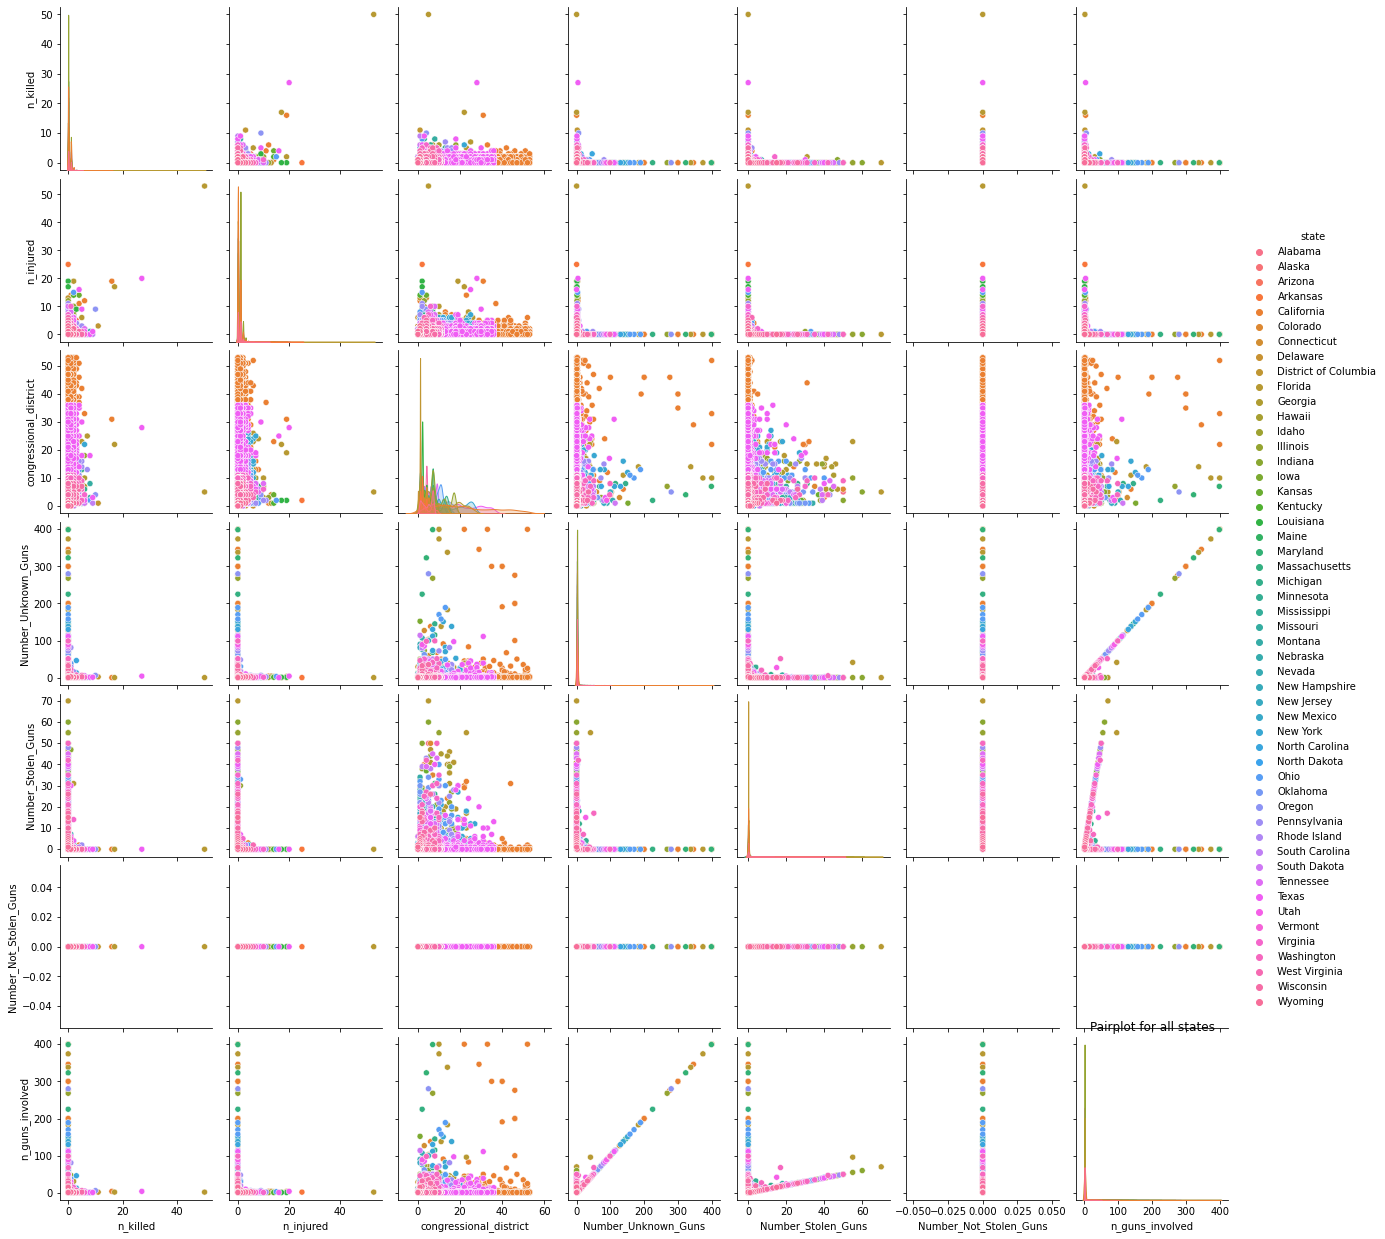

In [56]:
sns.pairplot(pair_df, kind='scatter',hue='state')
plt.title('Pairplot for all states')
plt.show()

### Pair plot by state

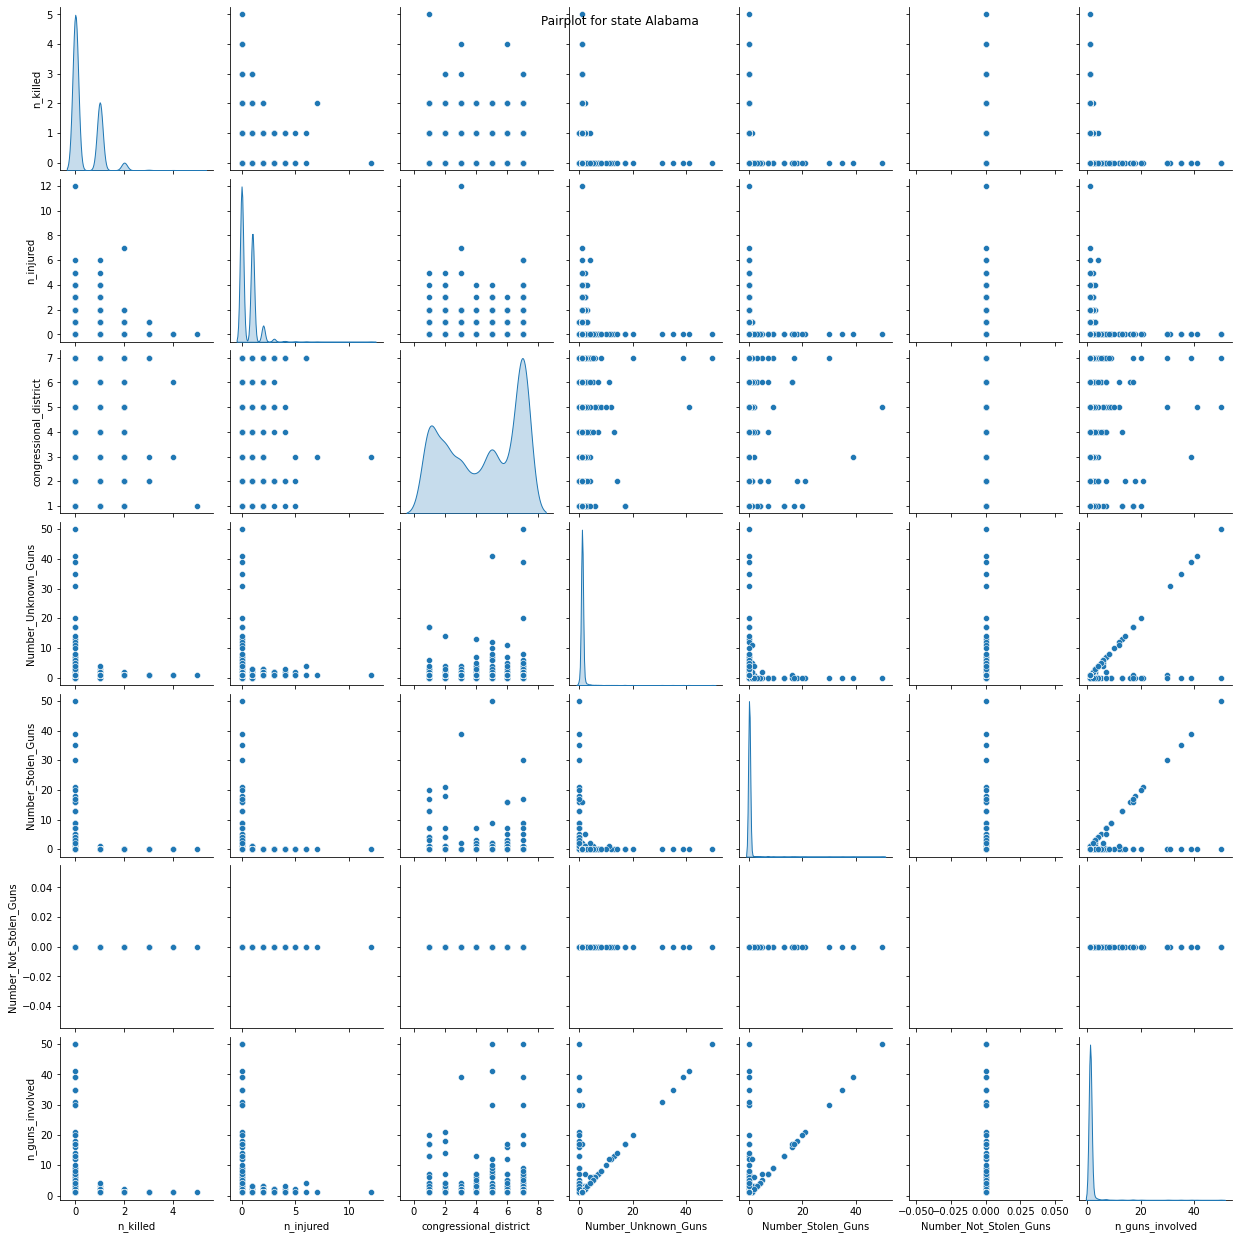

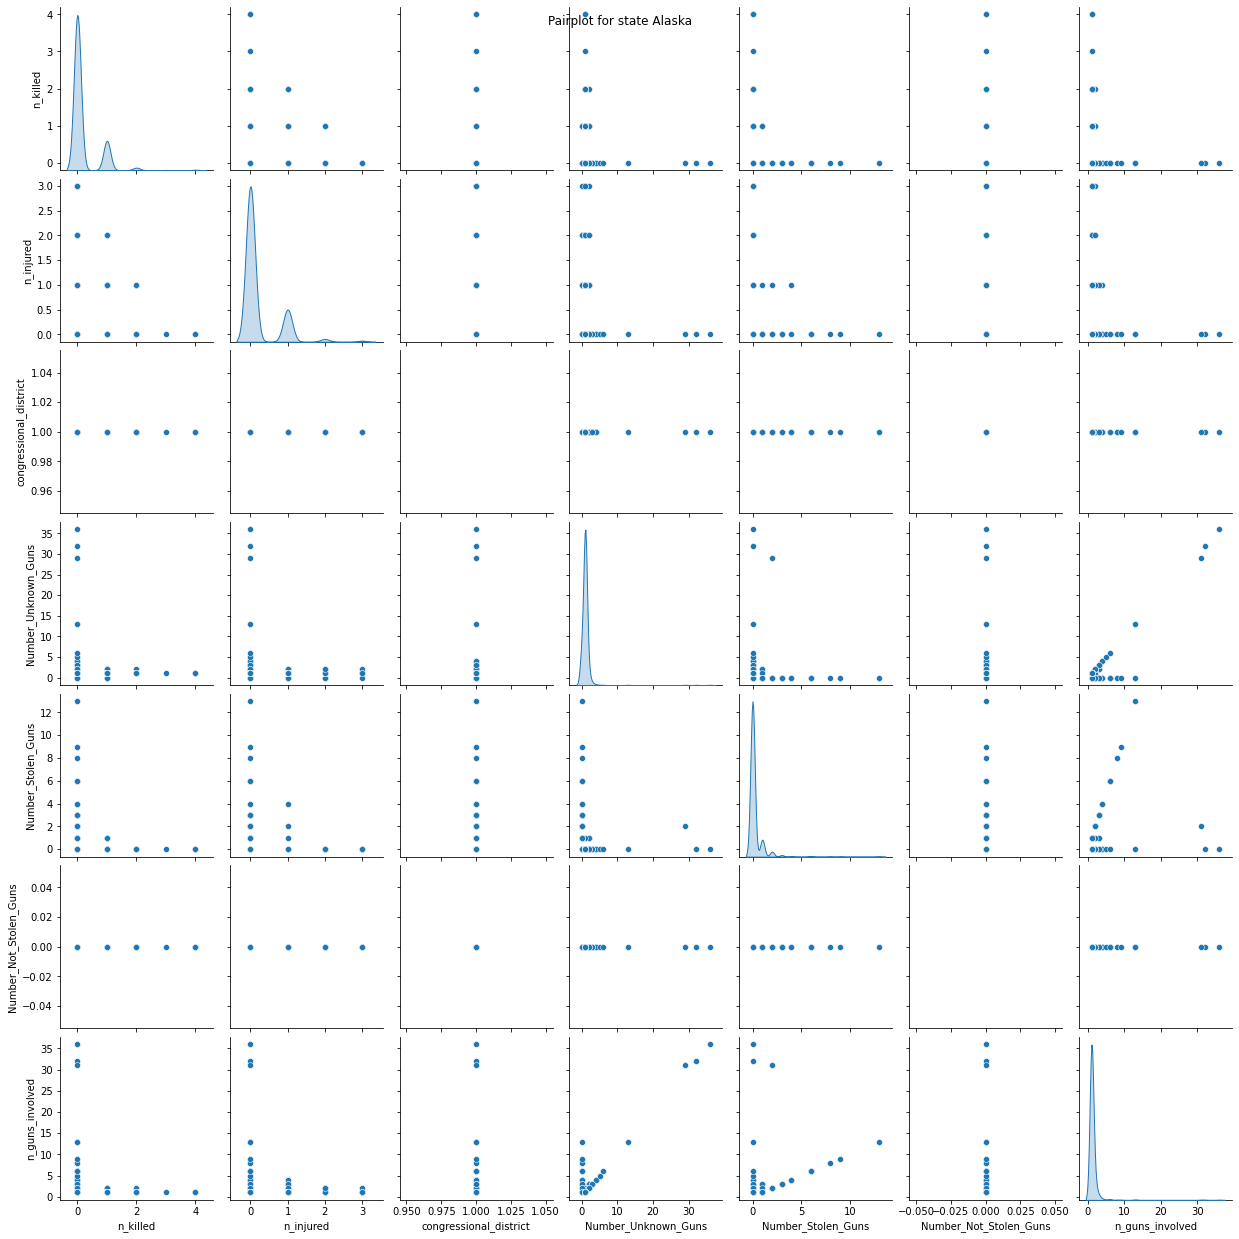

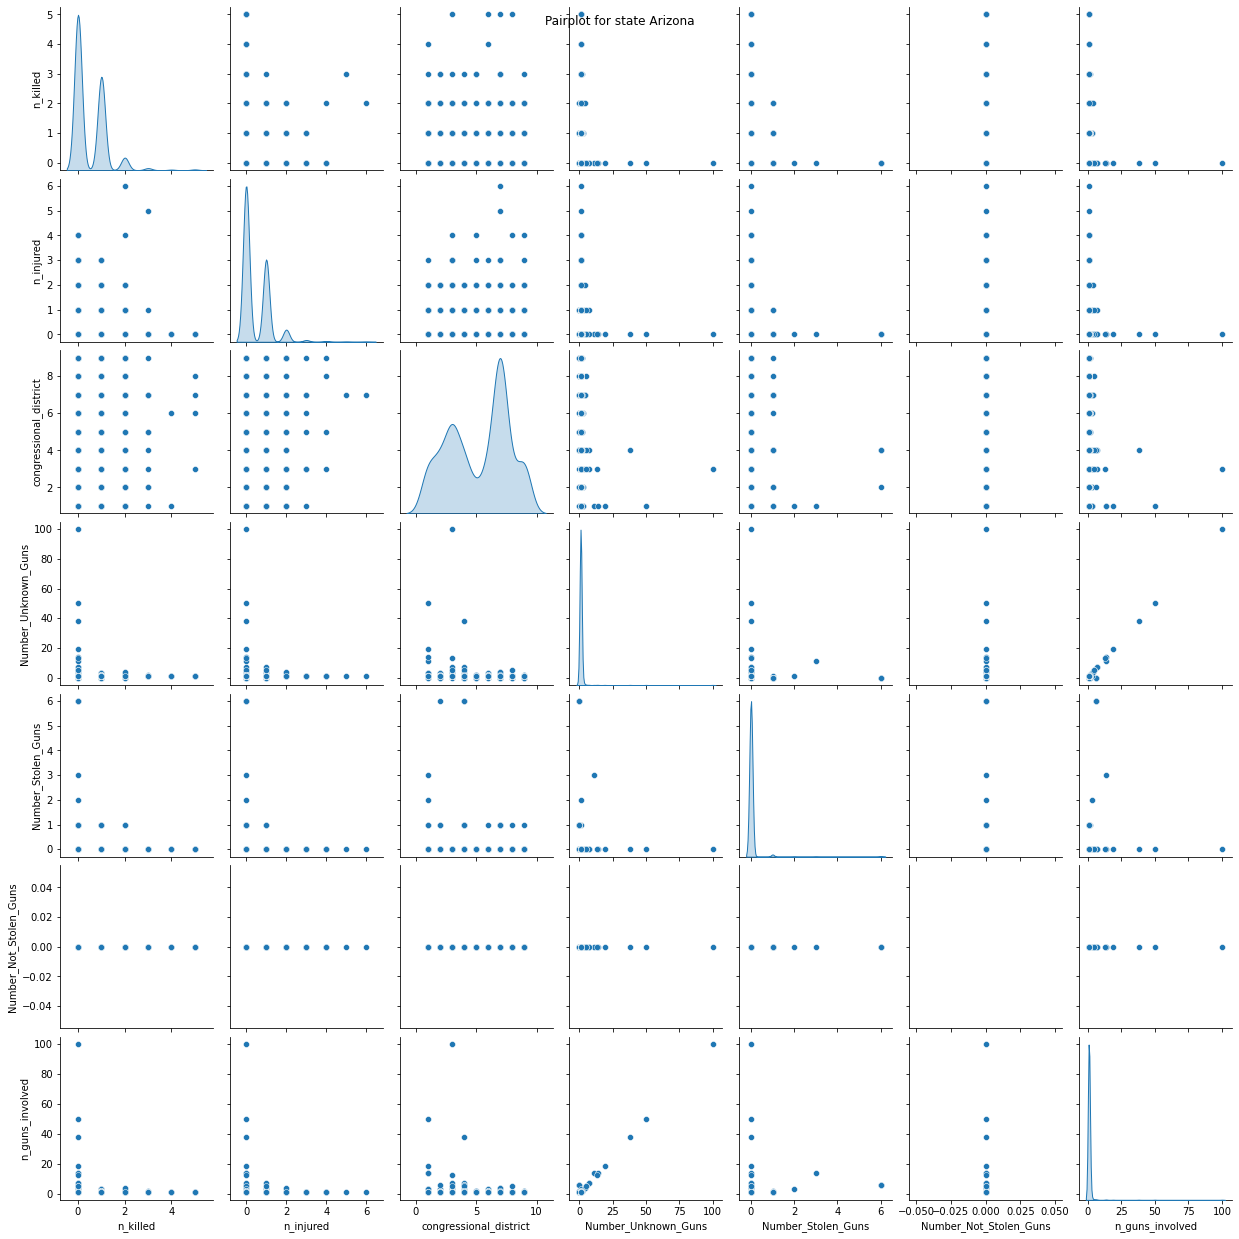

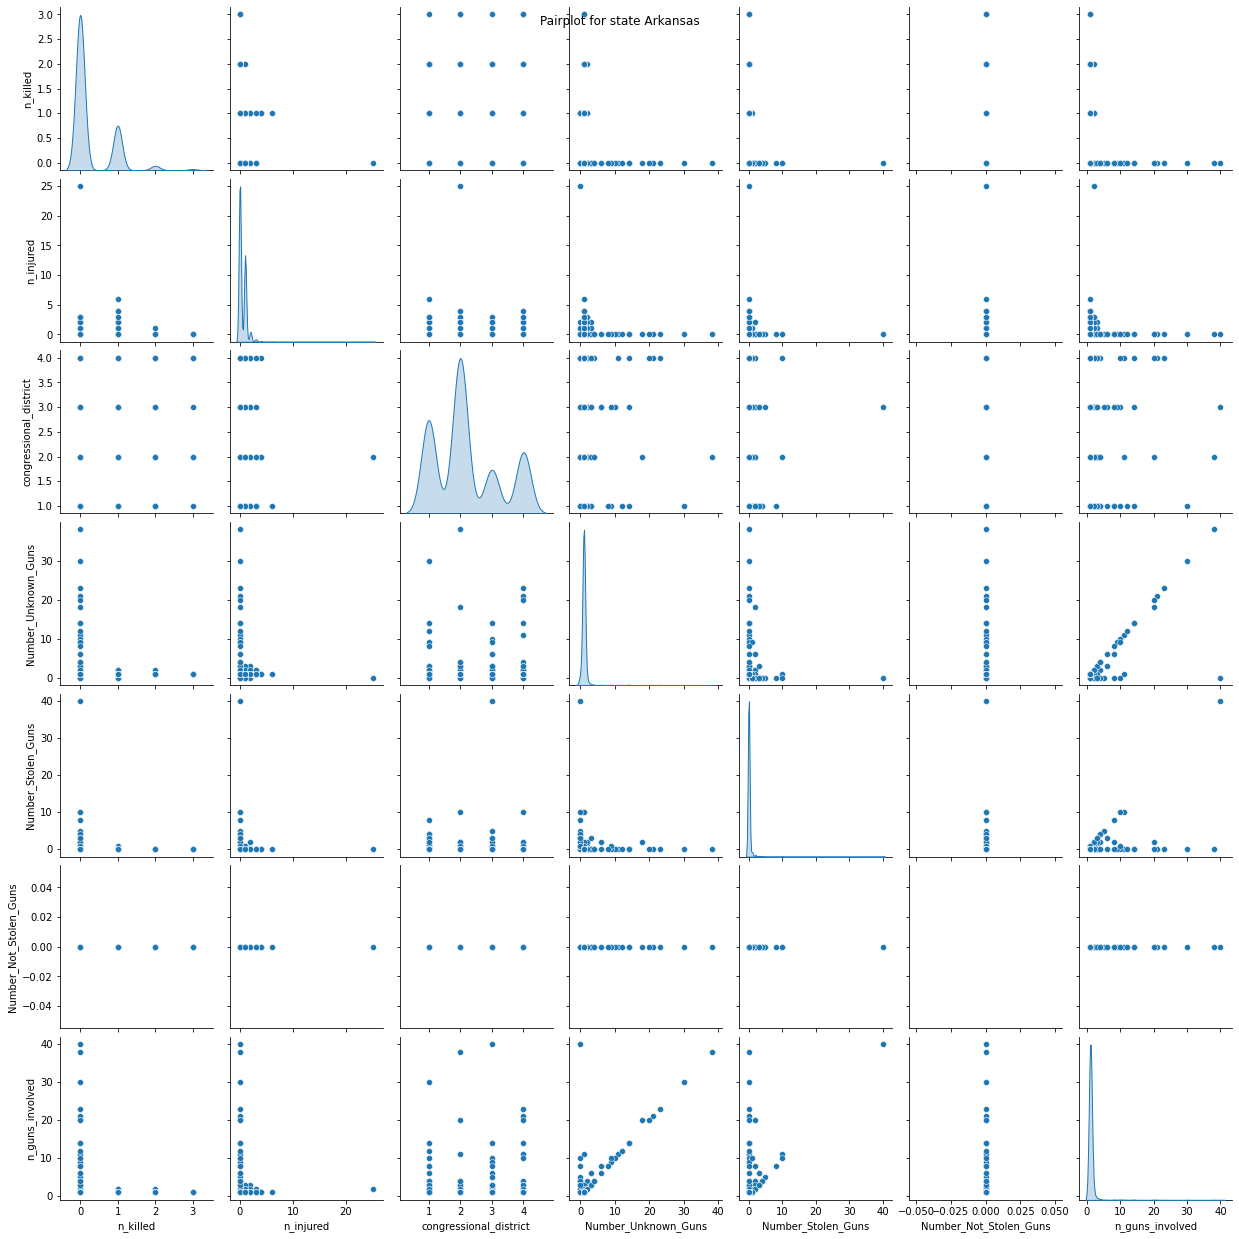

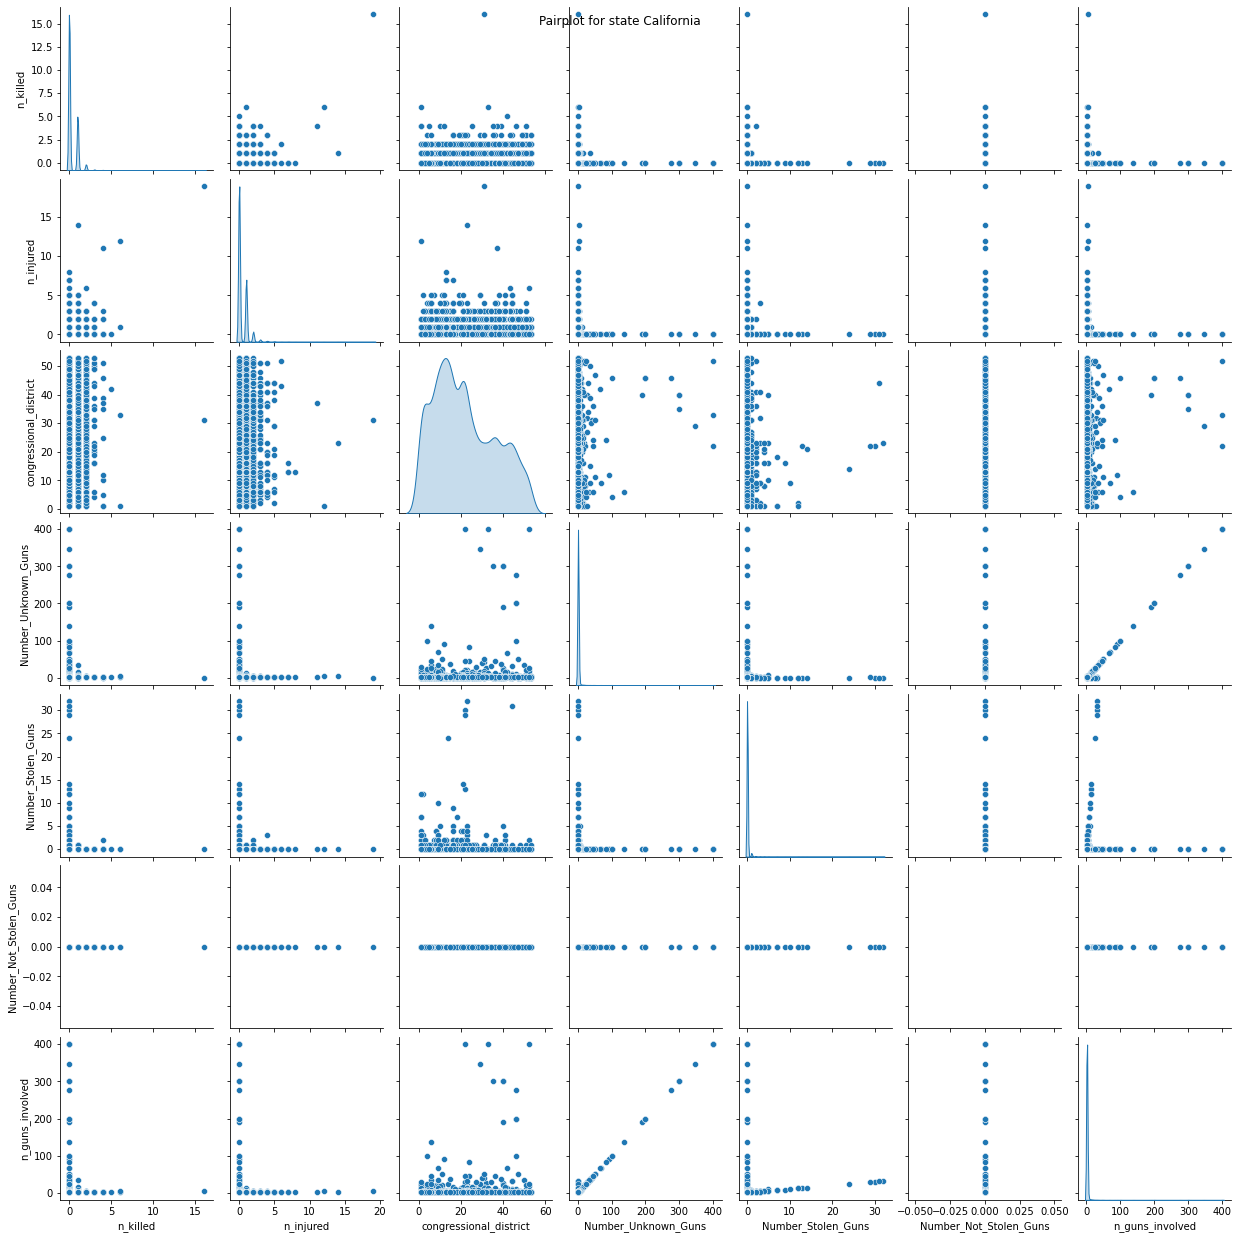

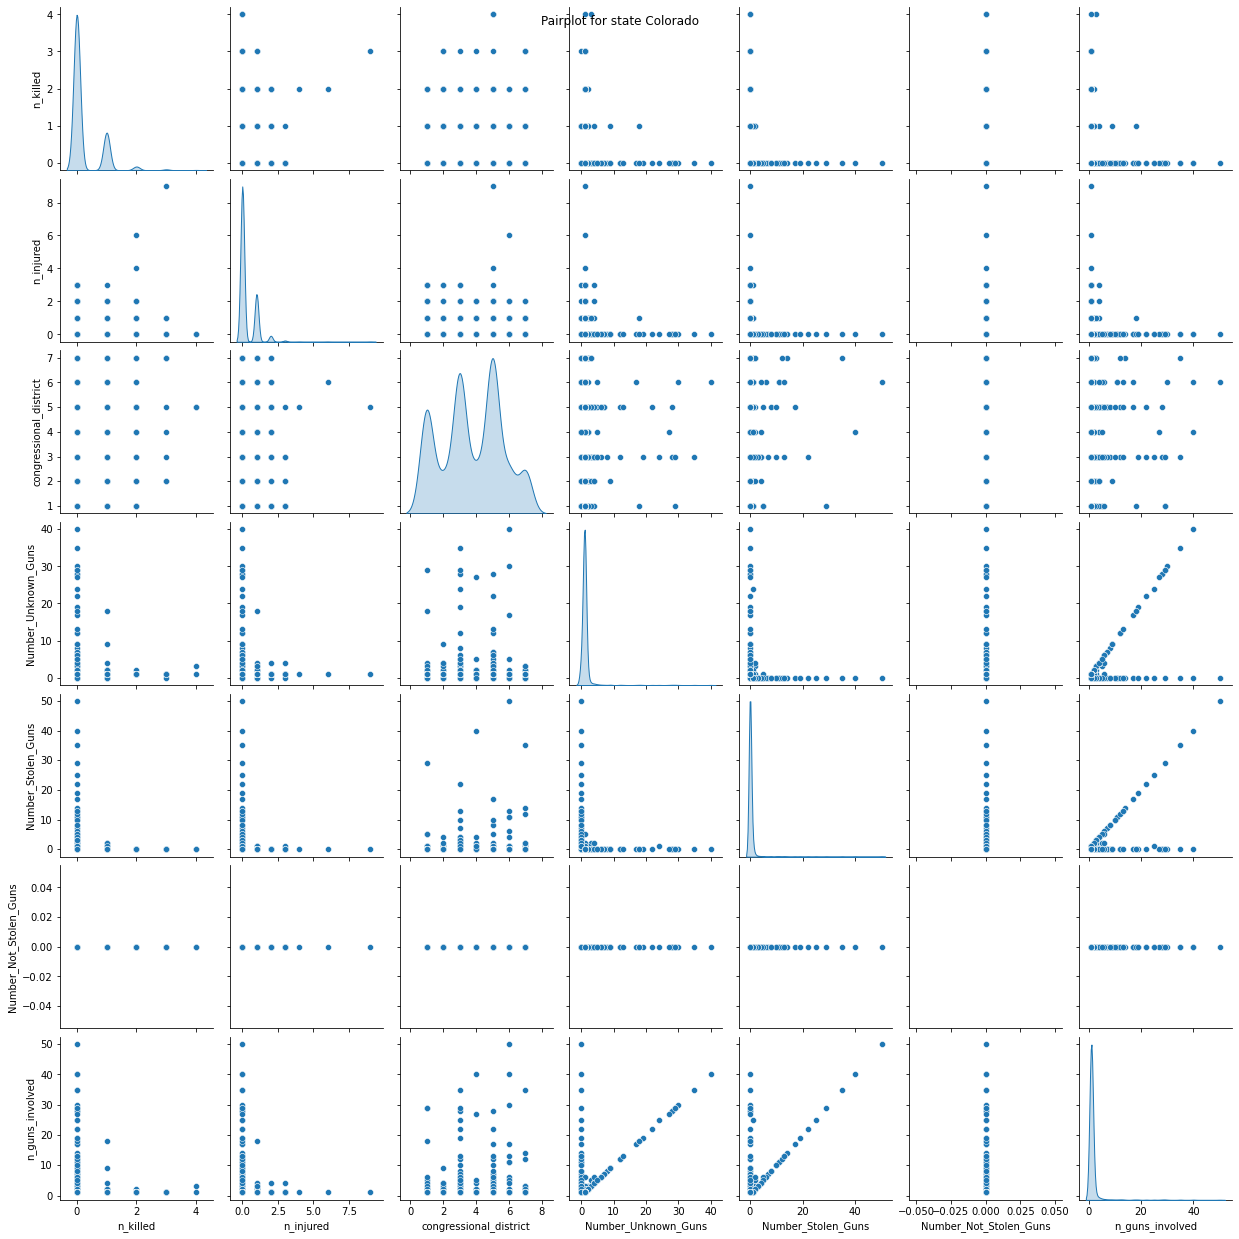

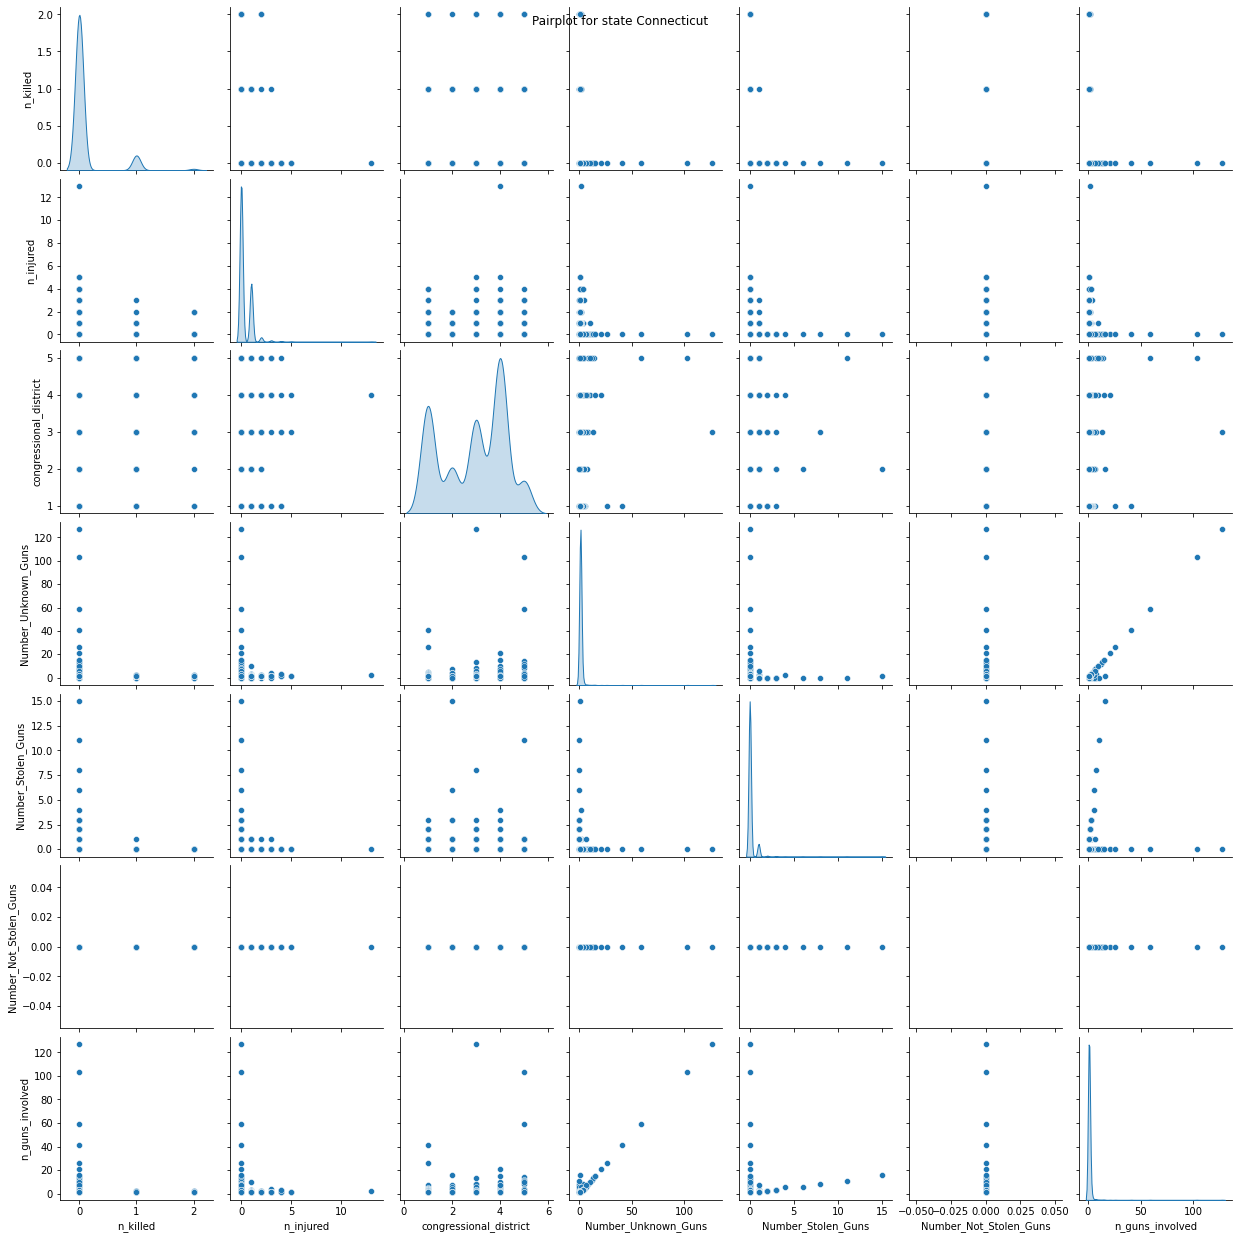

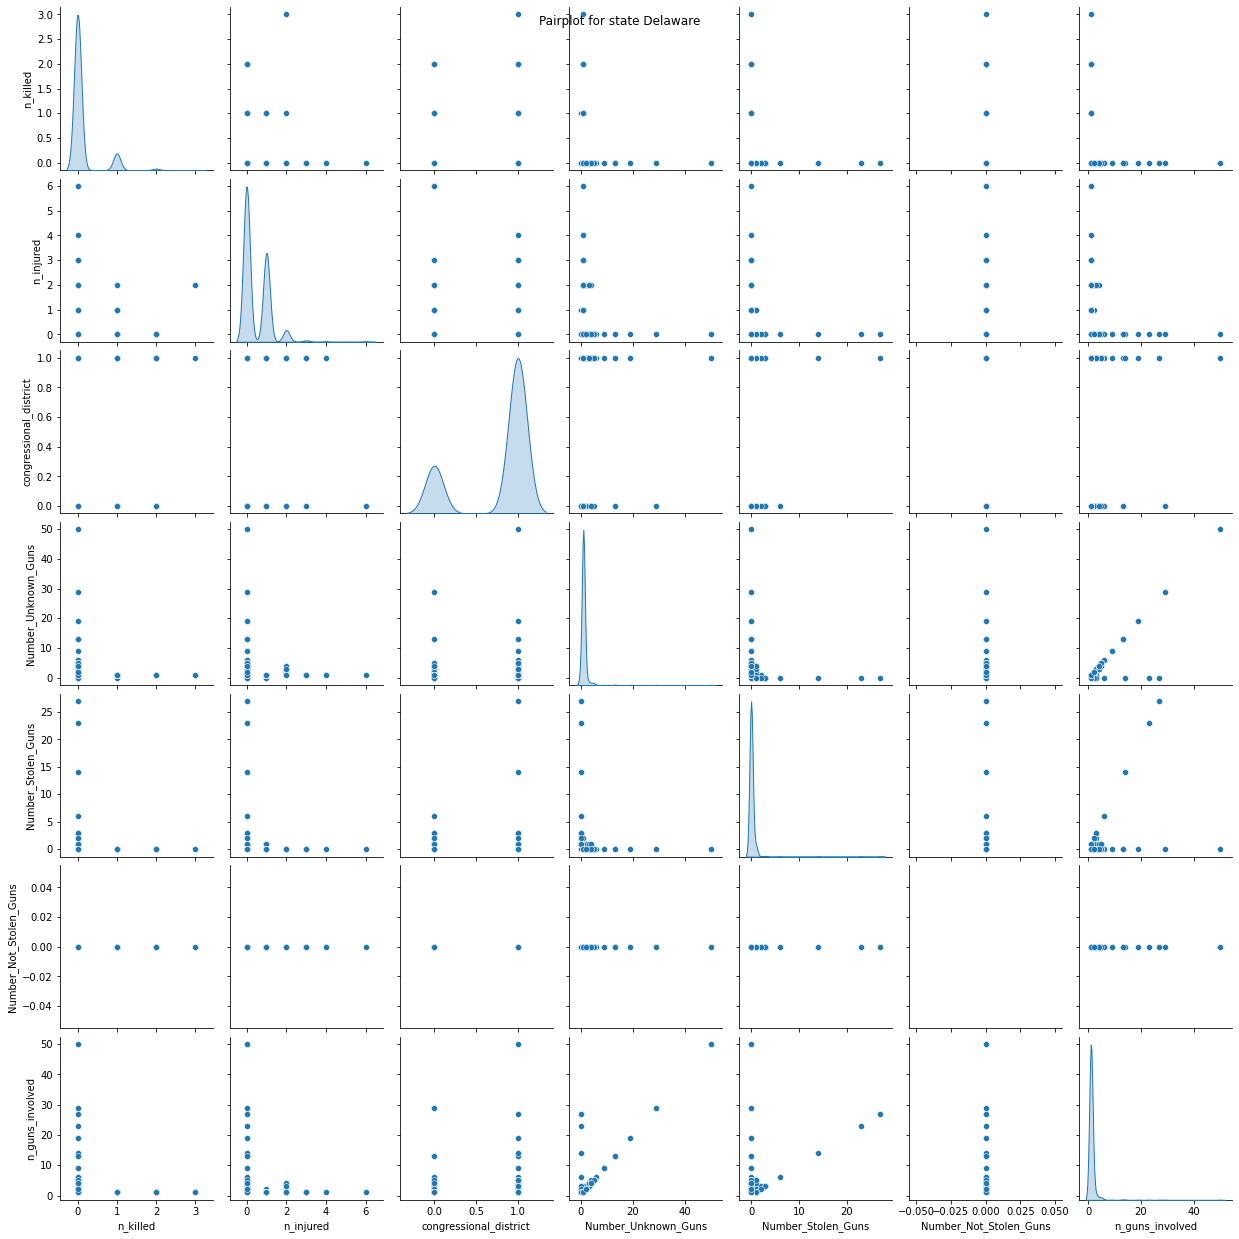

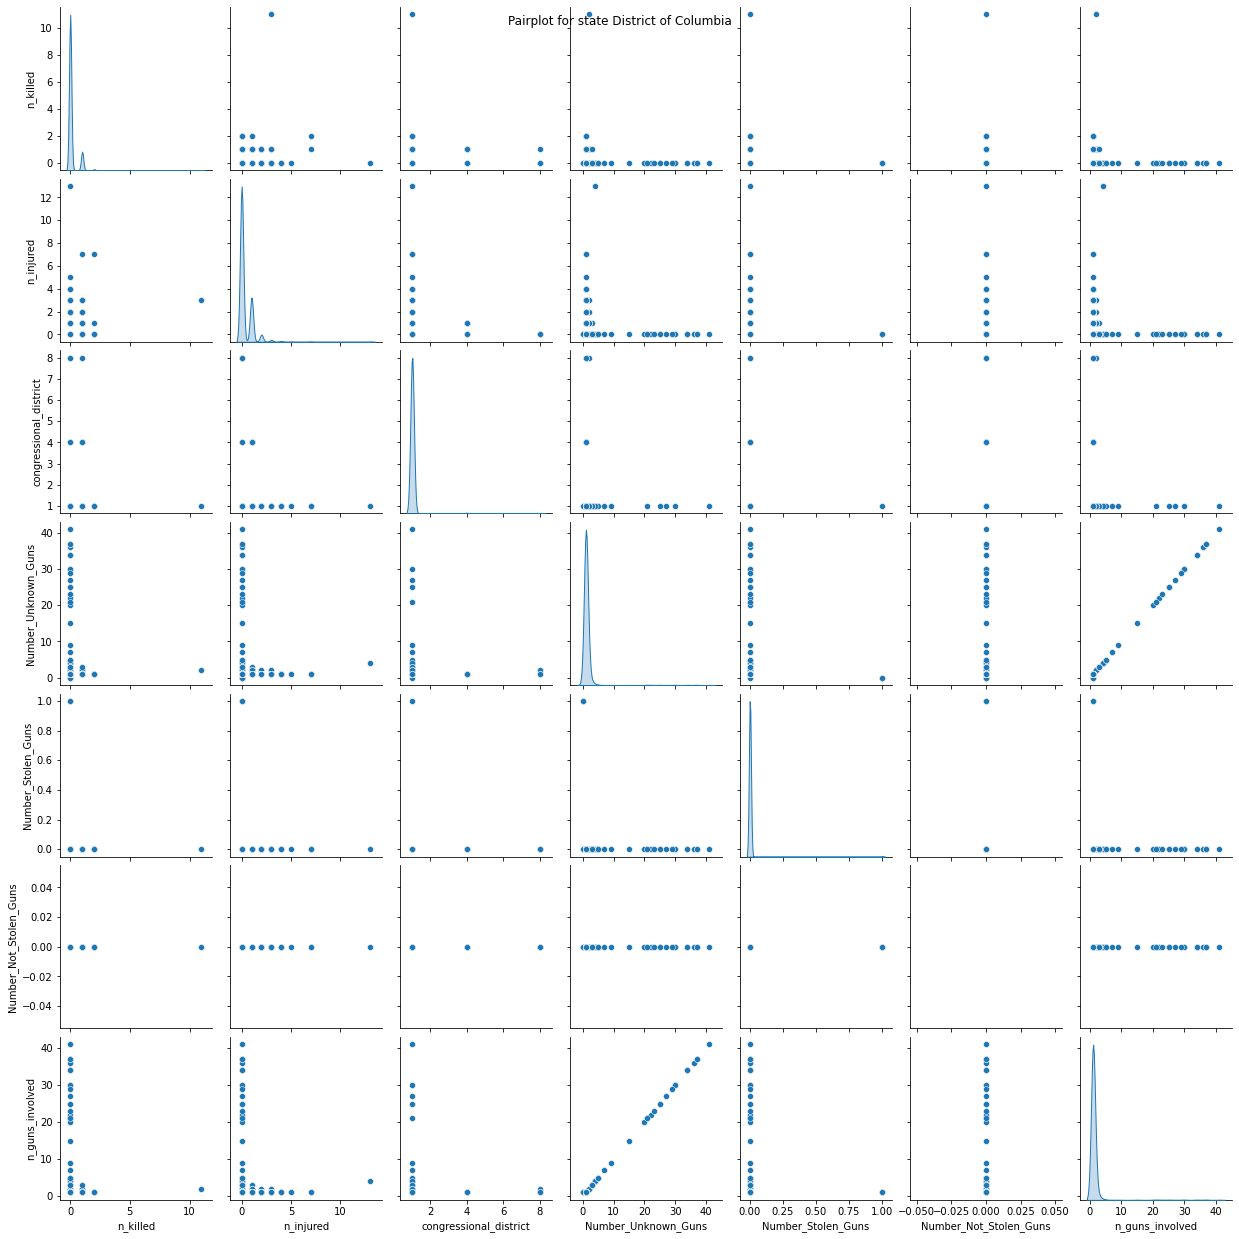

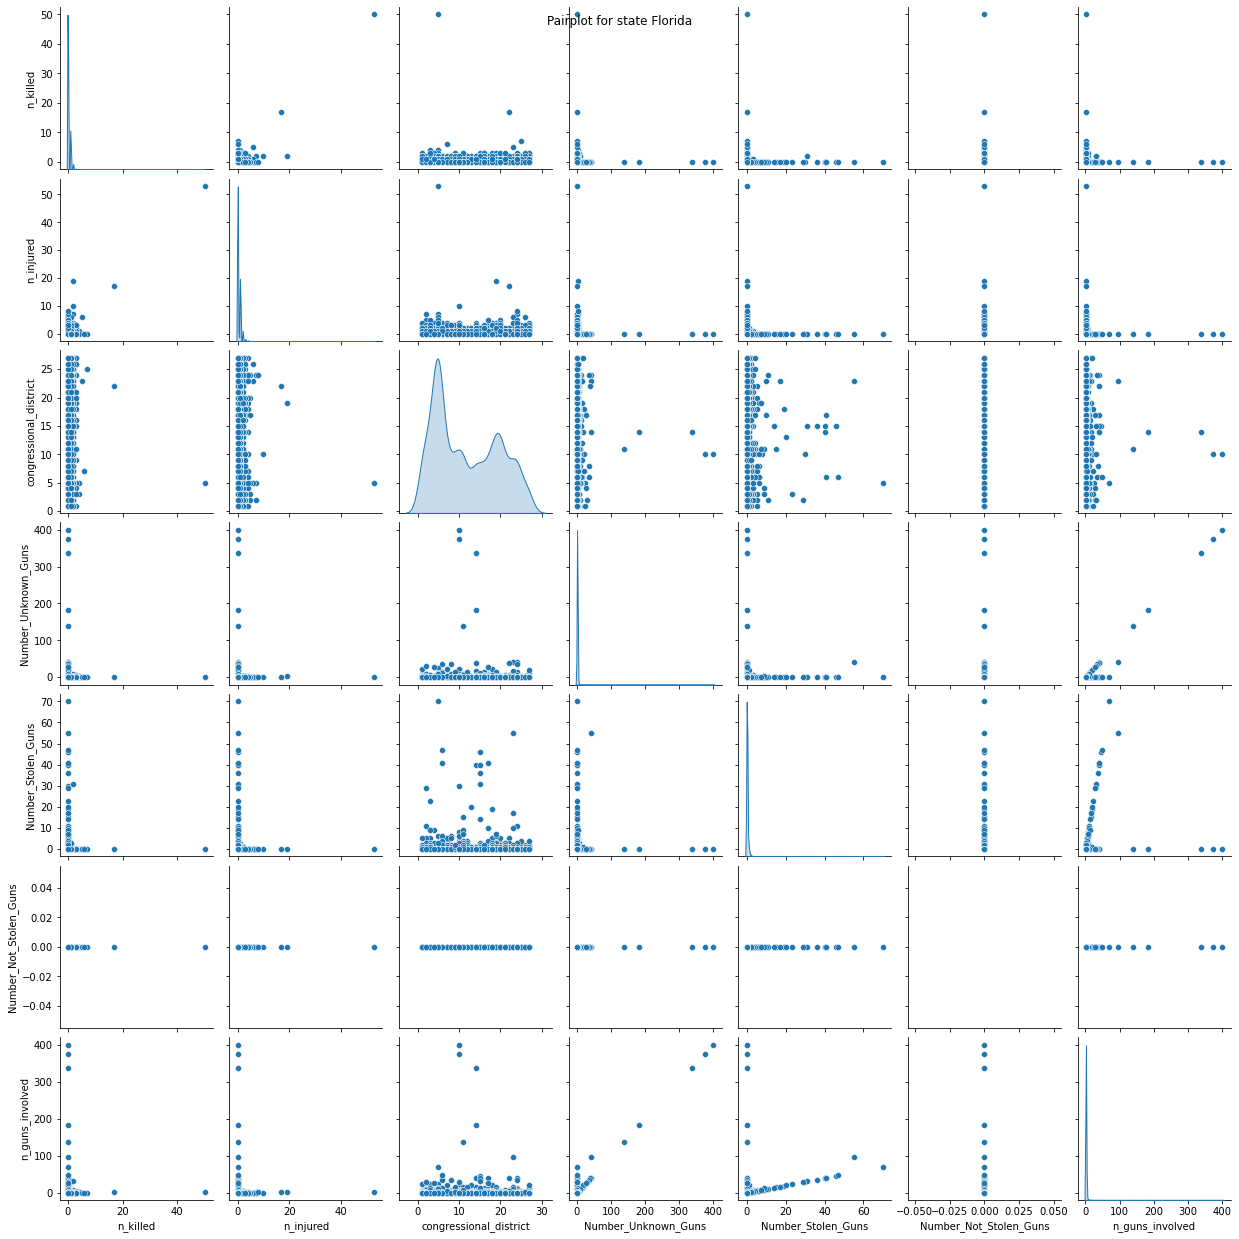

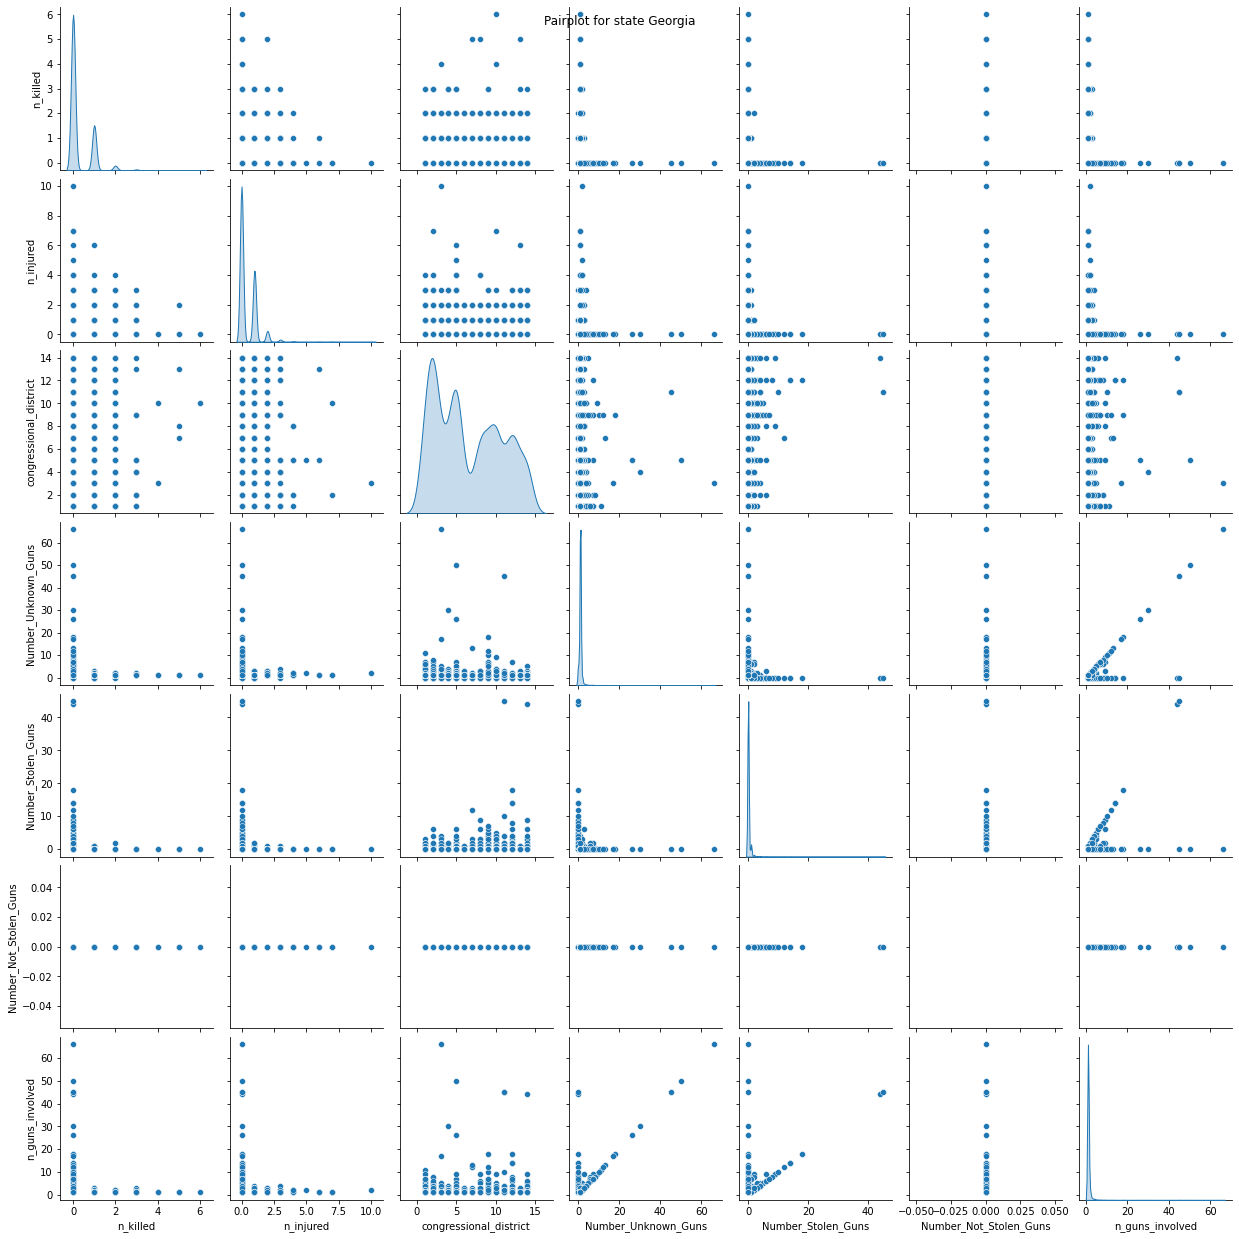

C:\Users\15599\Anaconda\lib\site-packages\seaborn\axisgrid.py:1278: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.hue_vals = pd.Series(["_nolegend_"] * len(data),


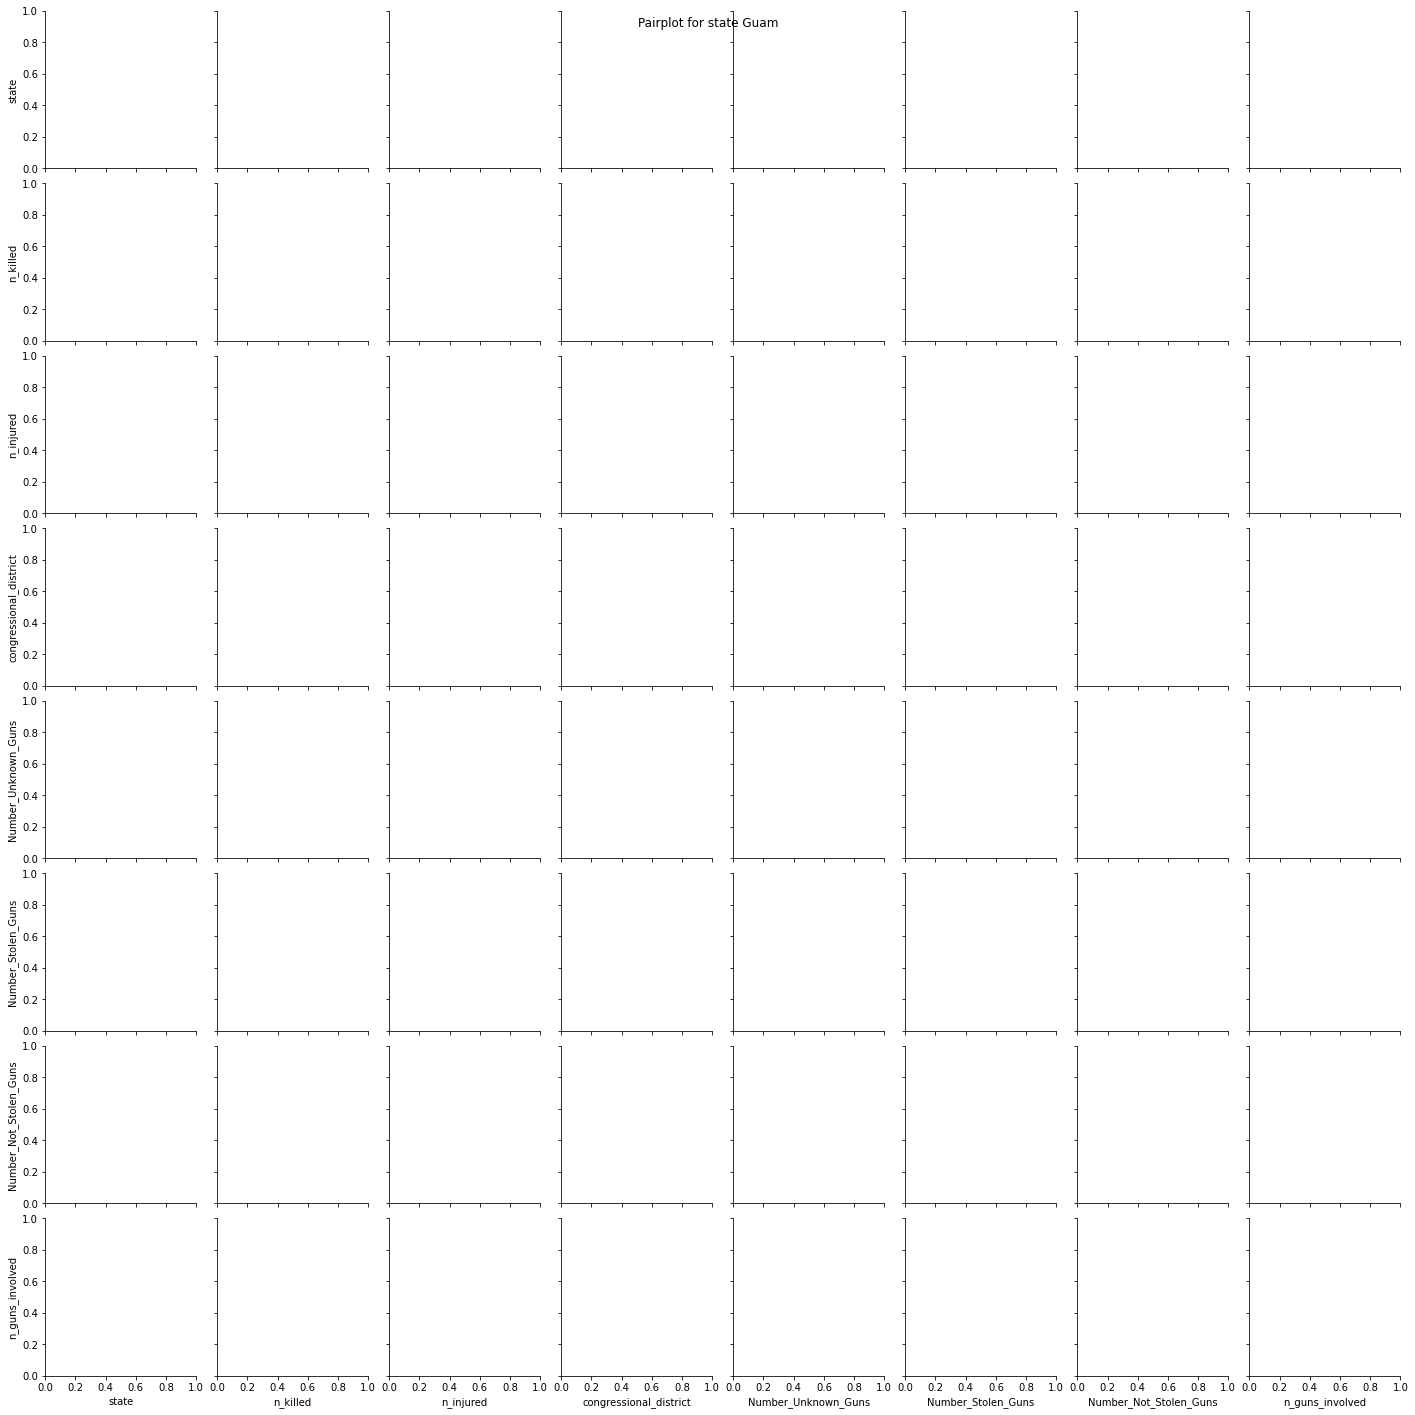

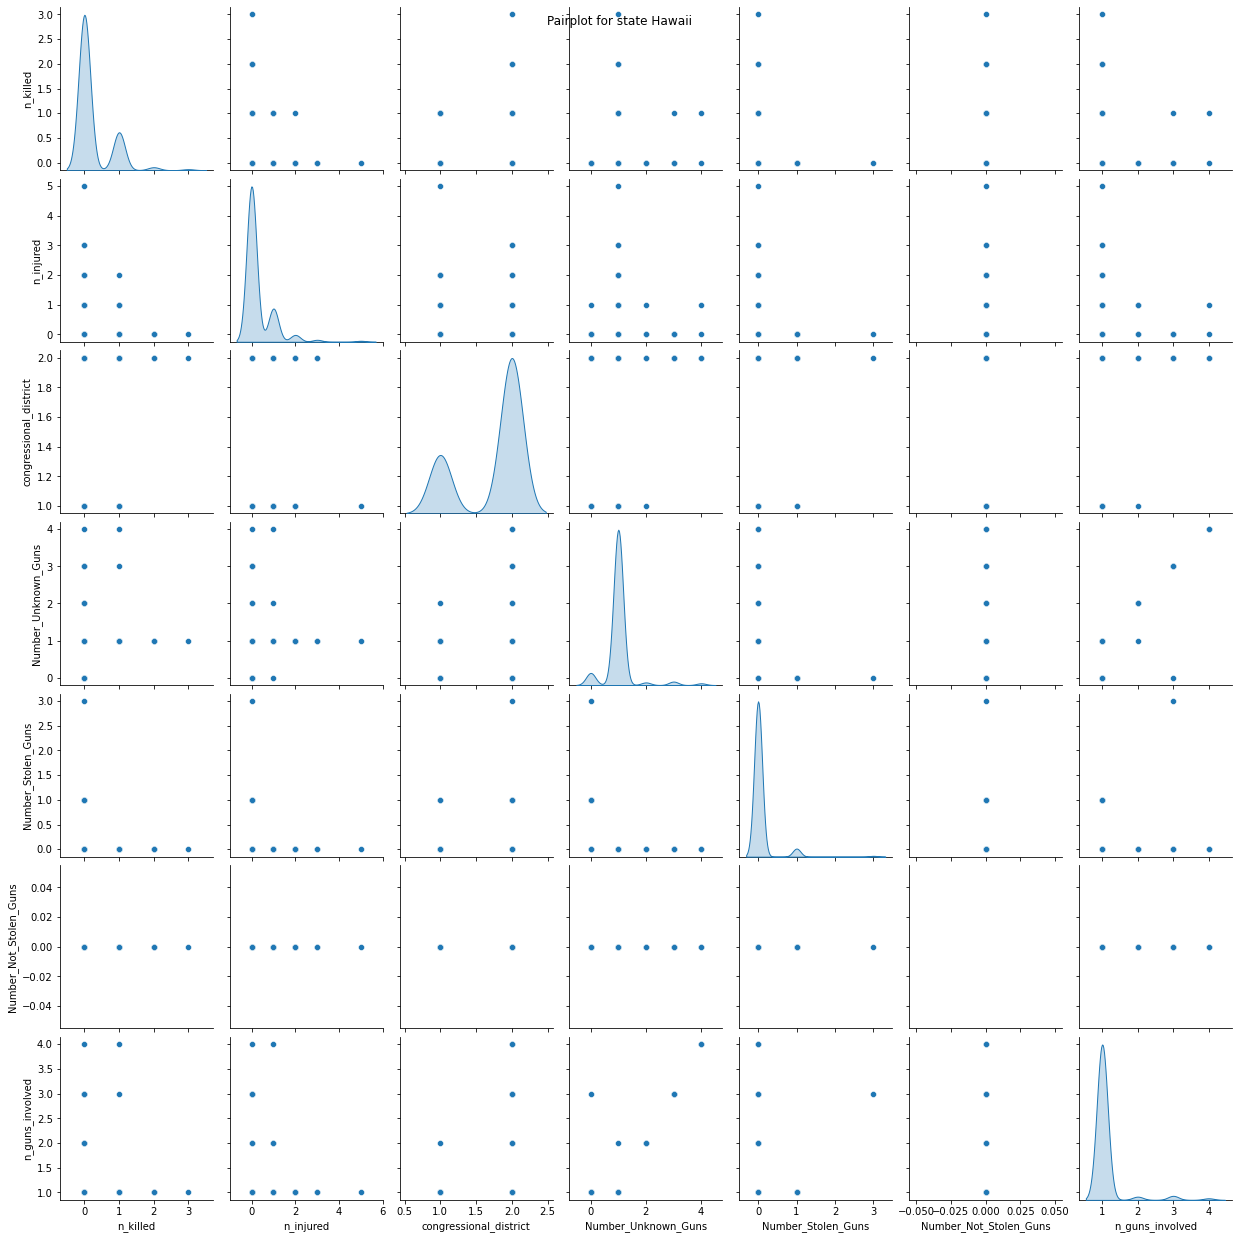

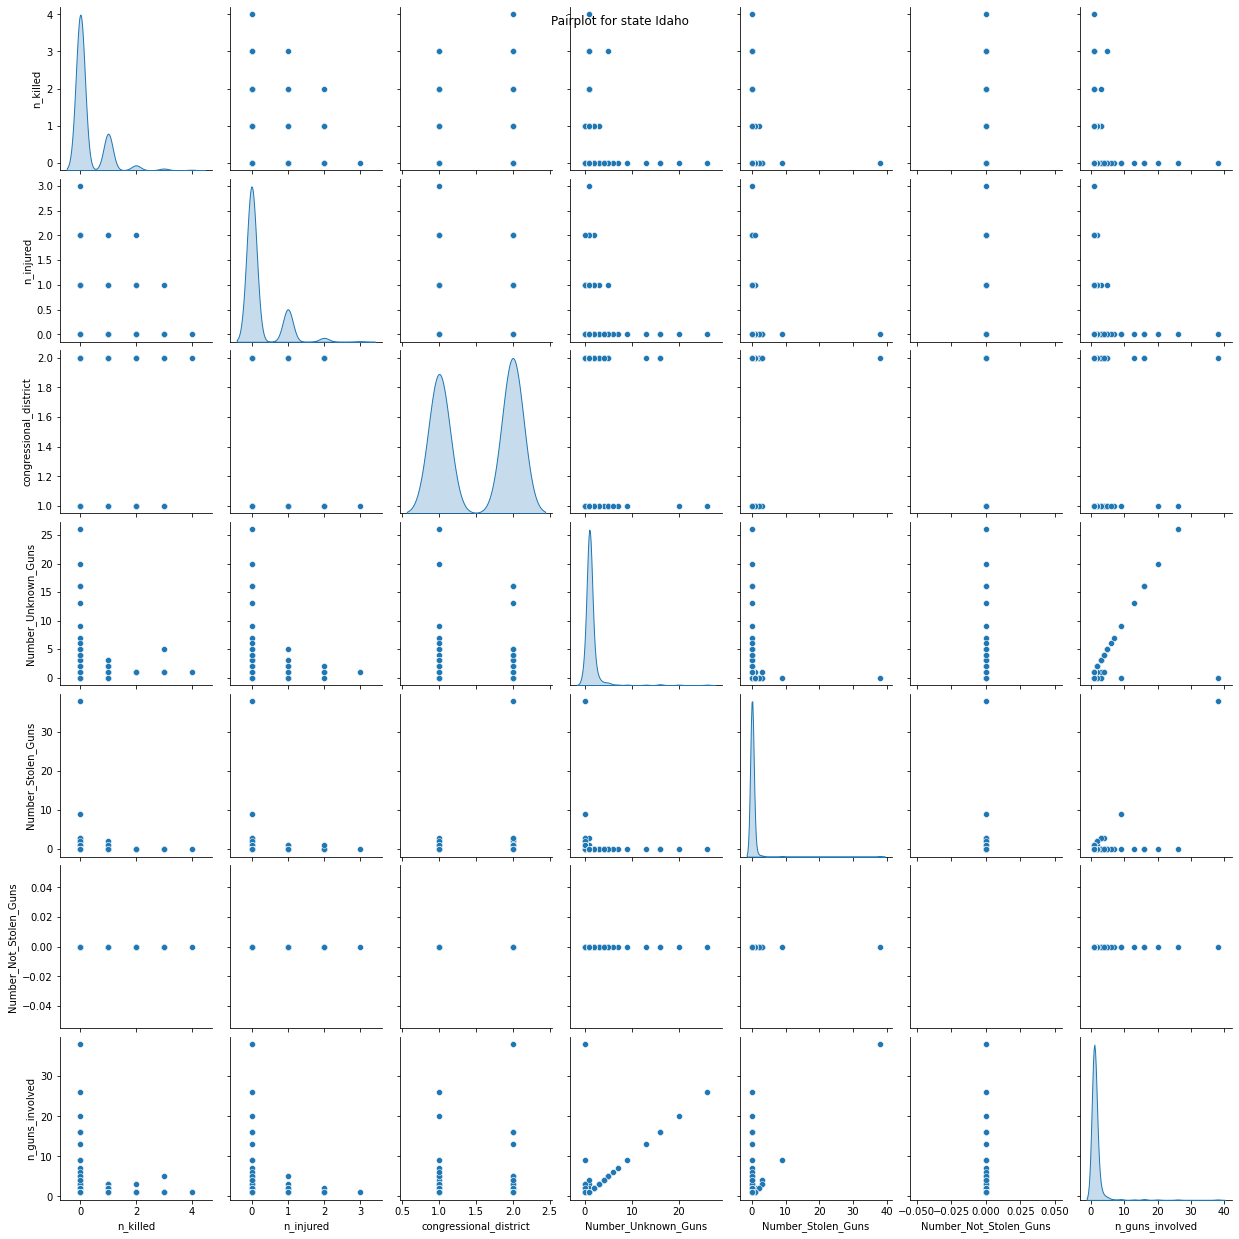

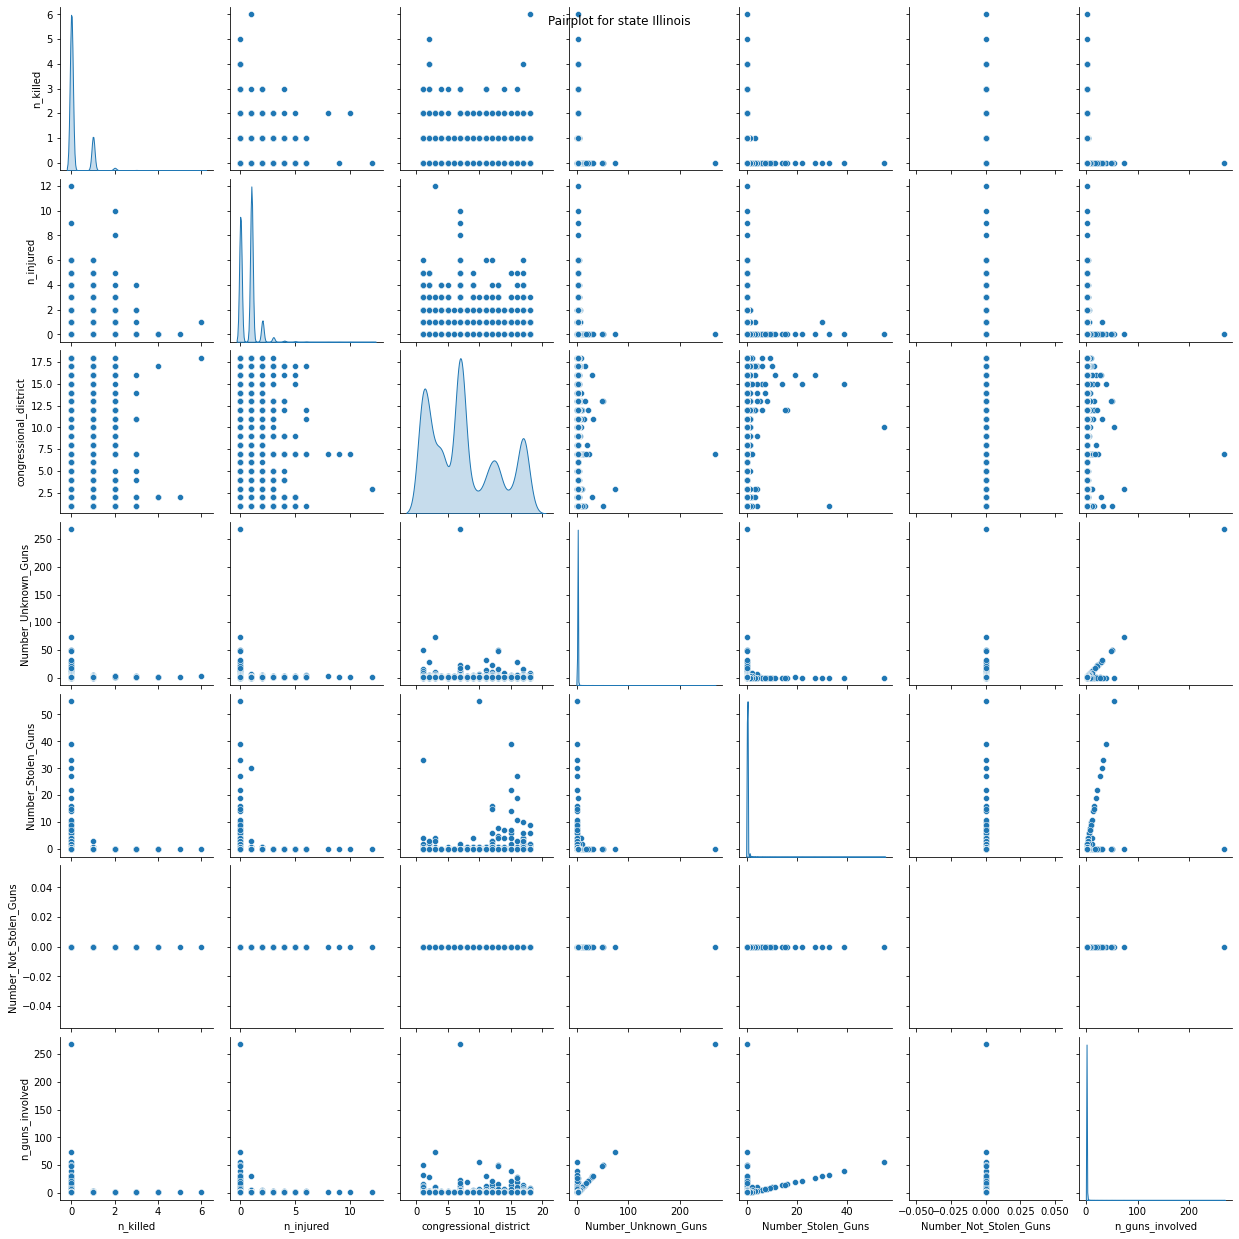

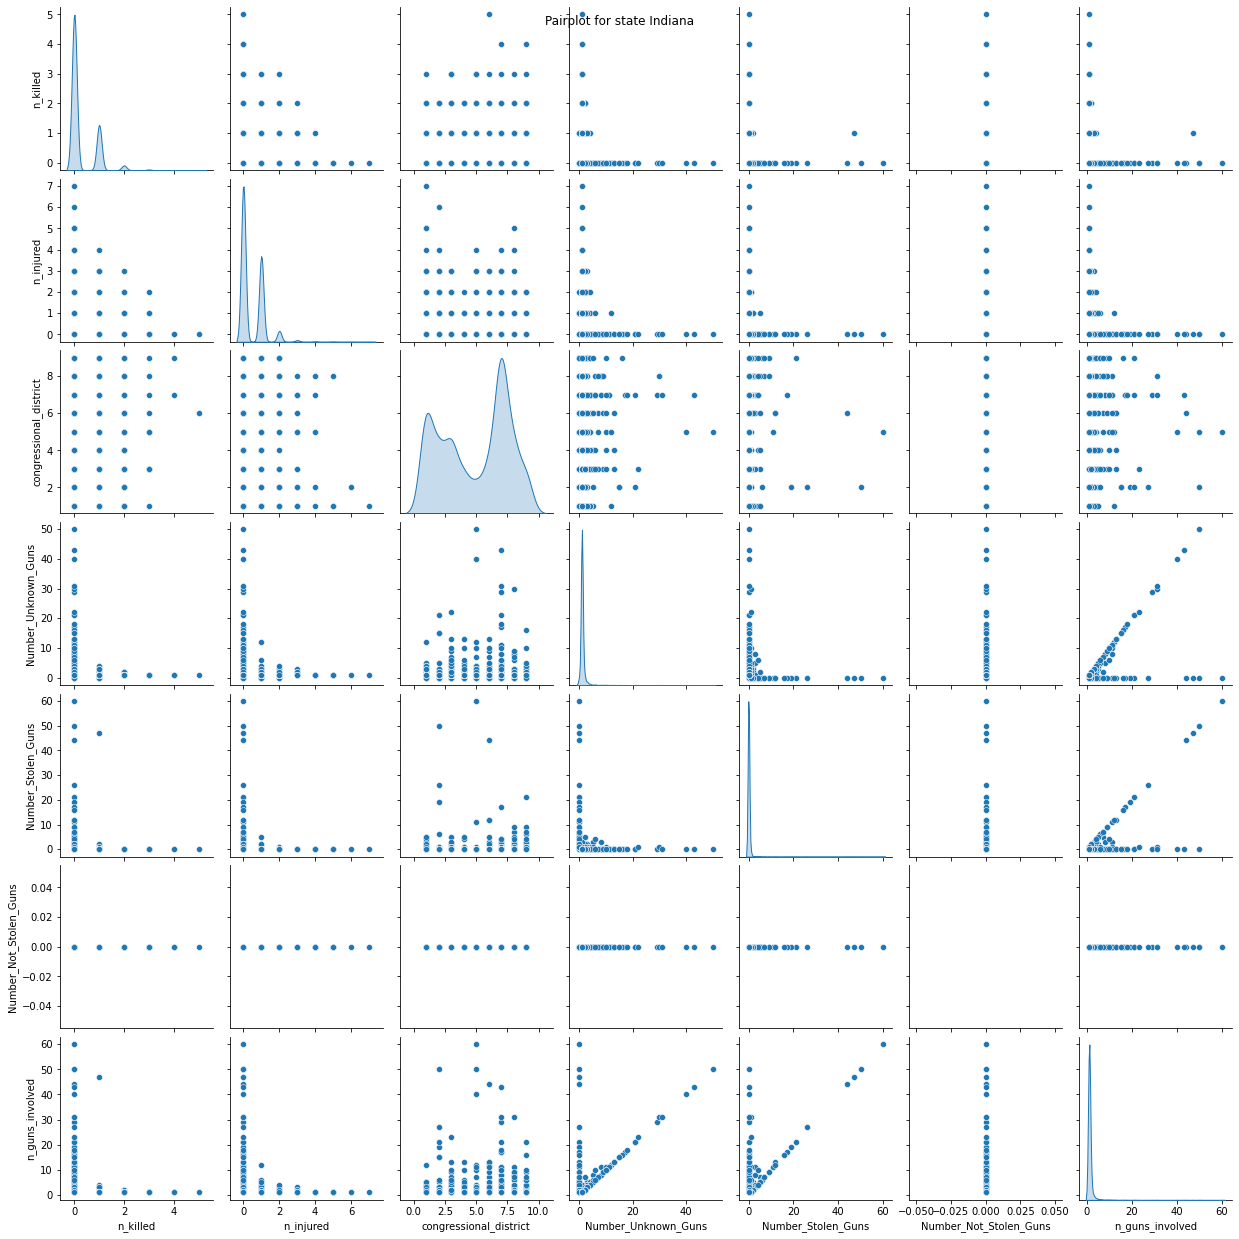

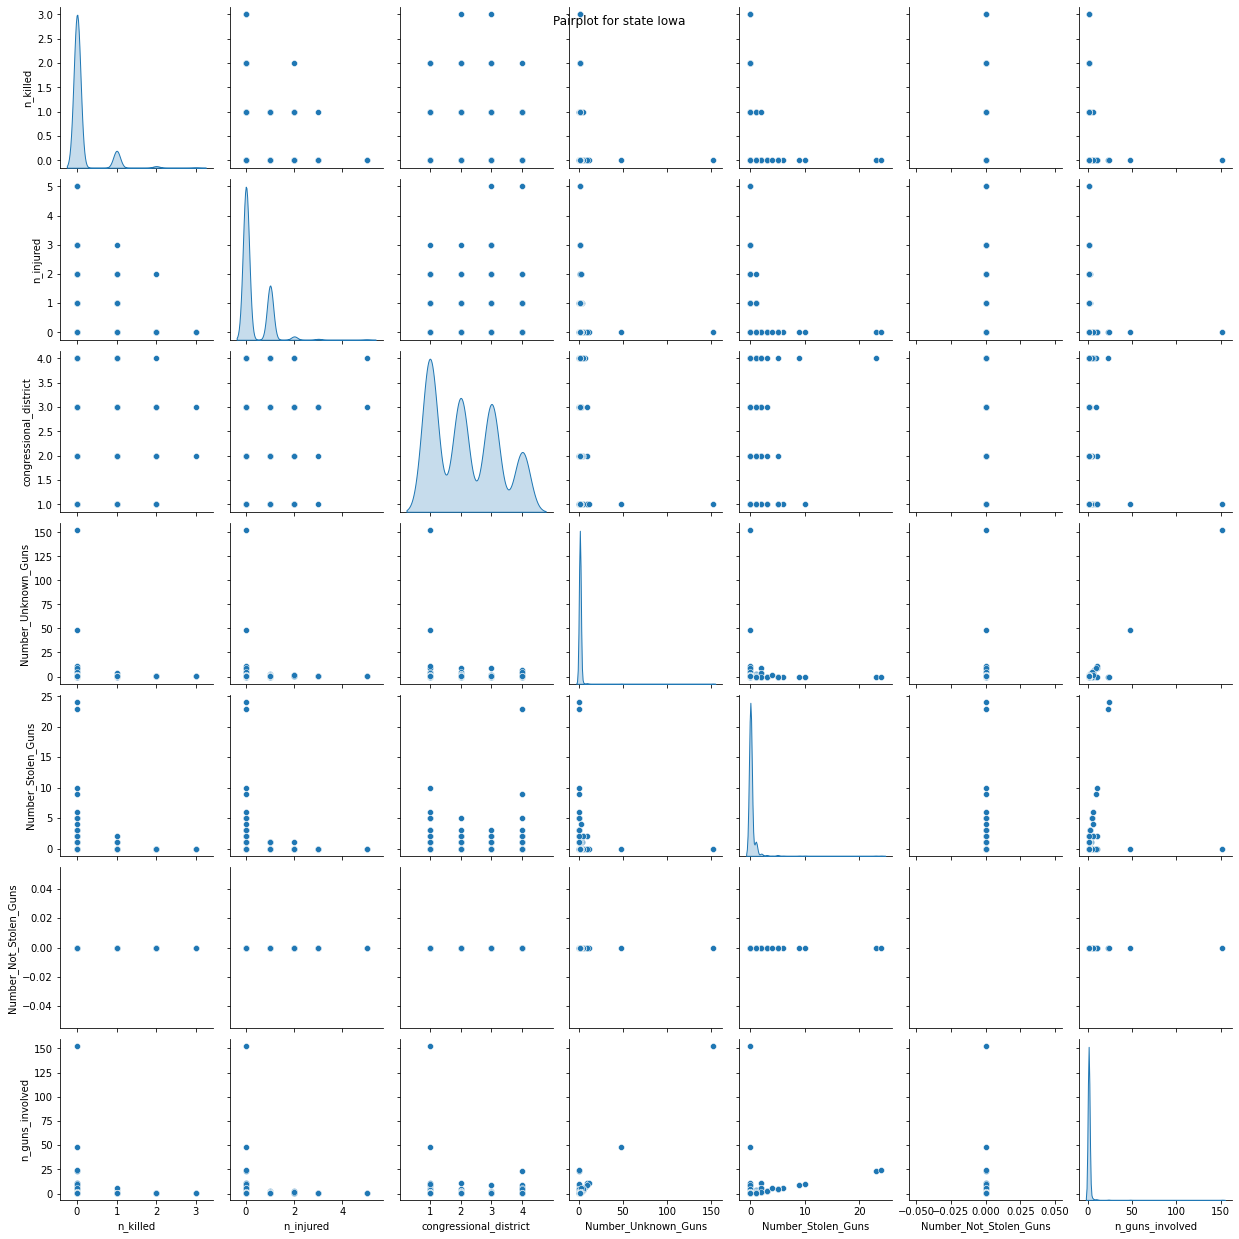

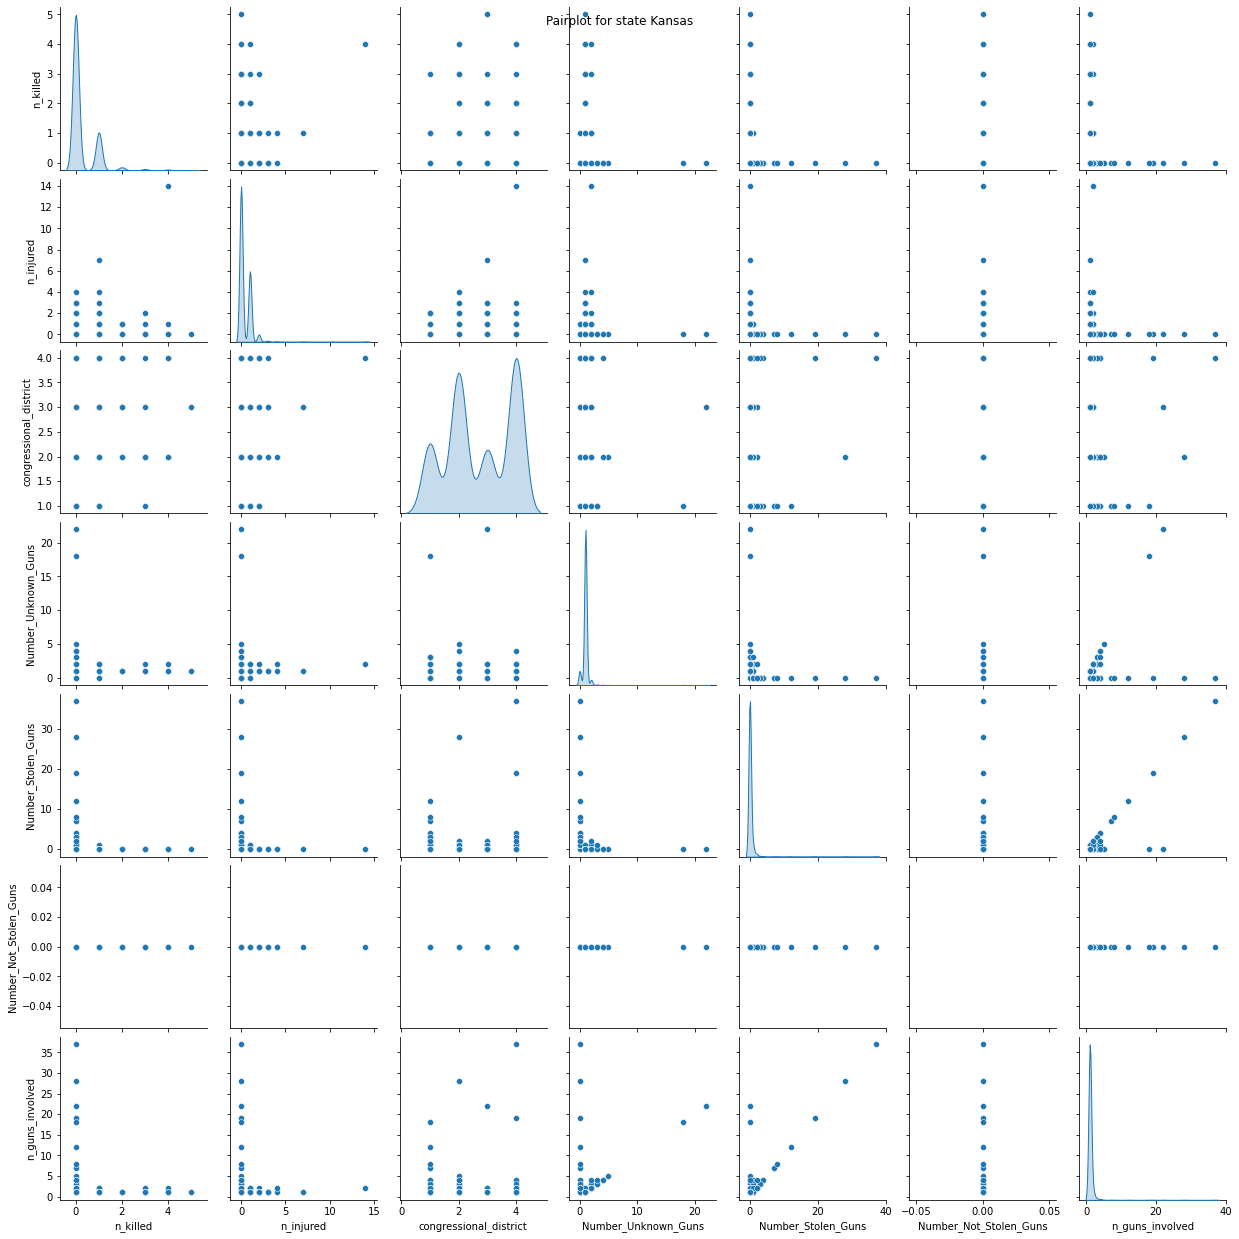

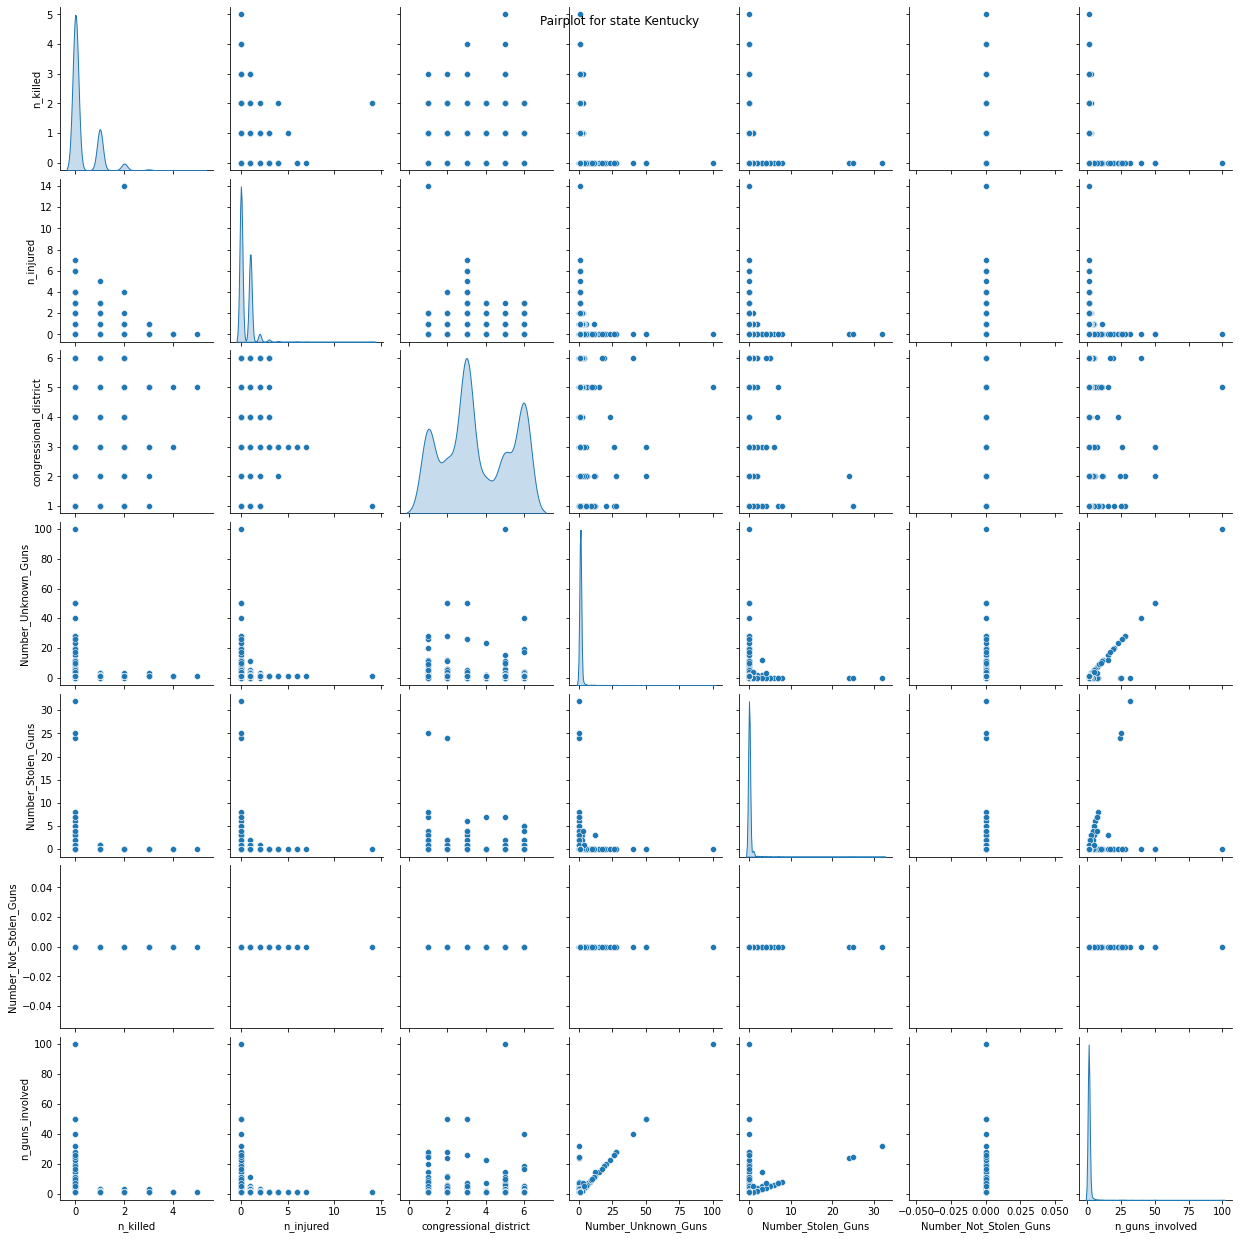

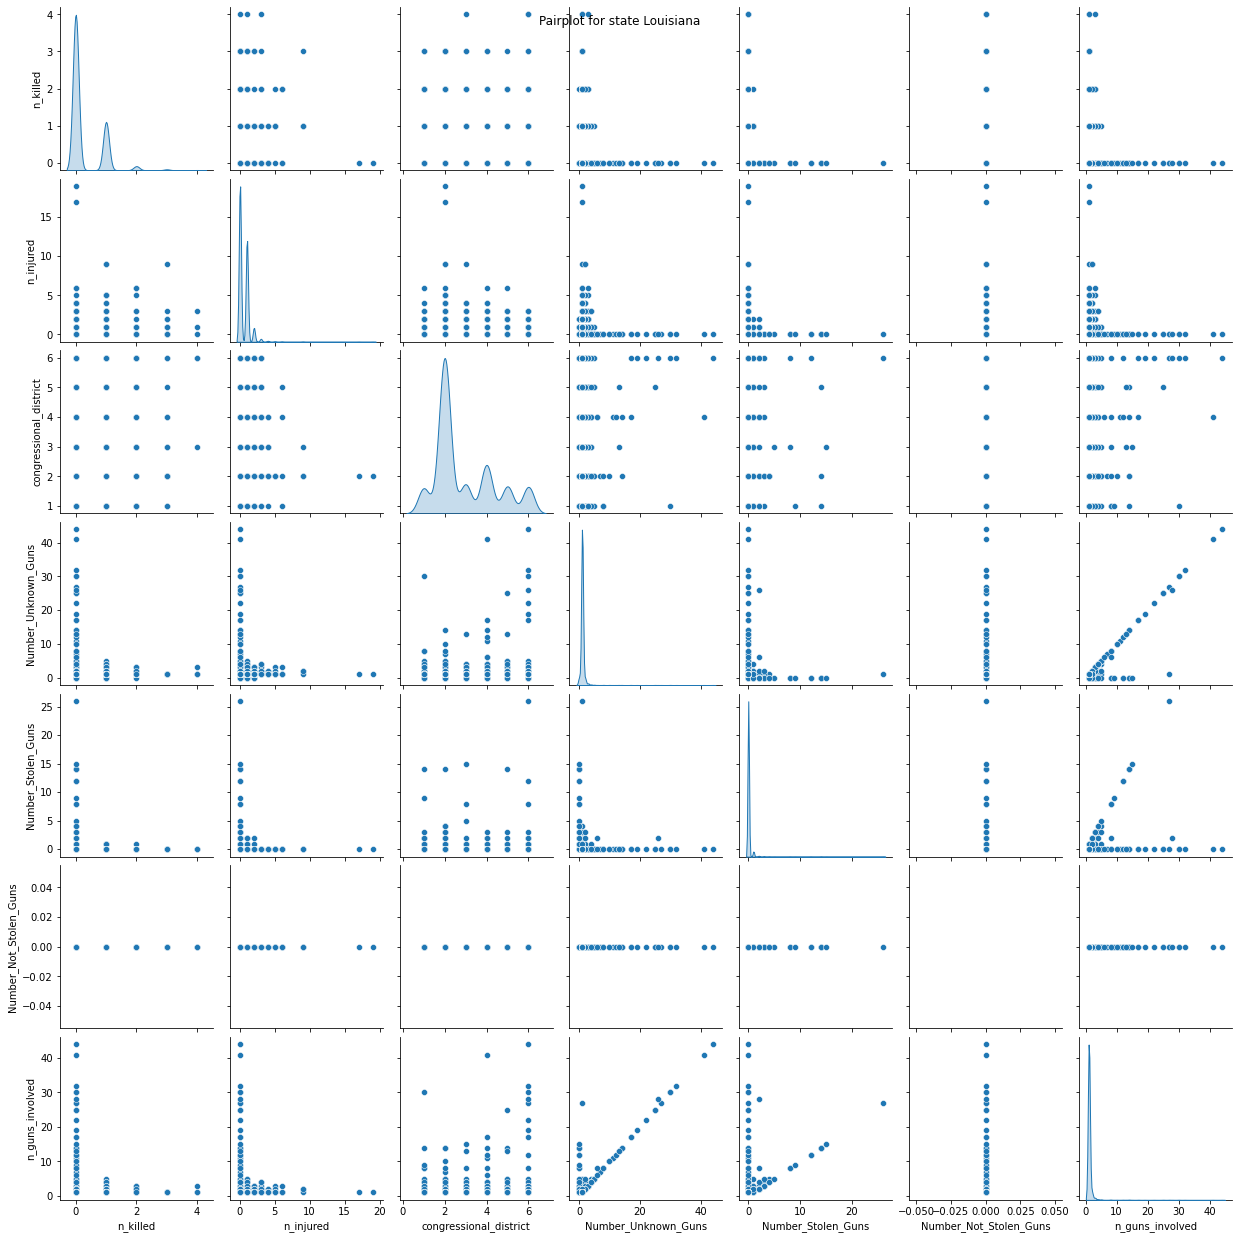

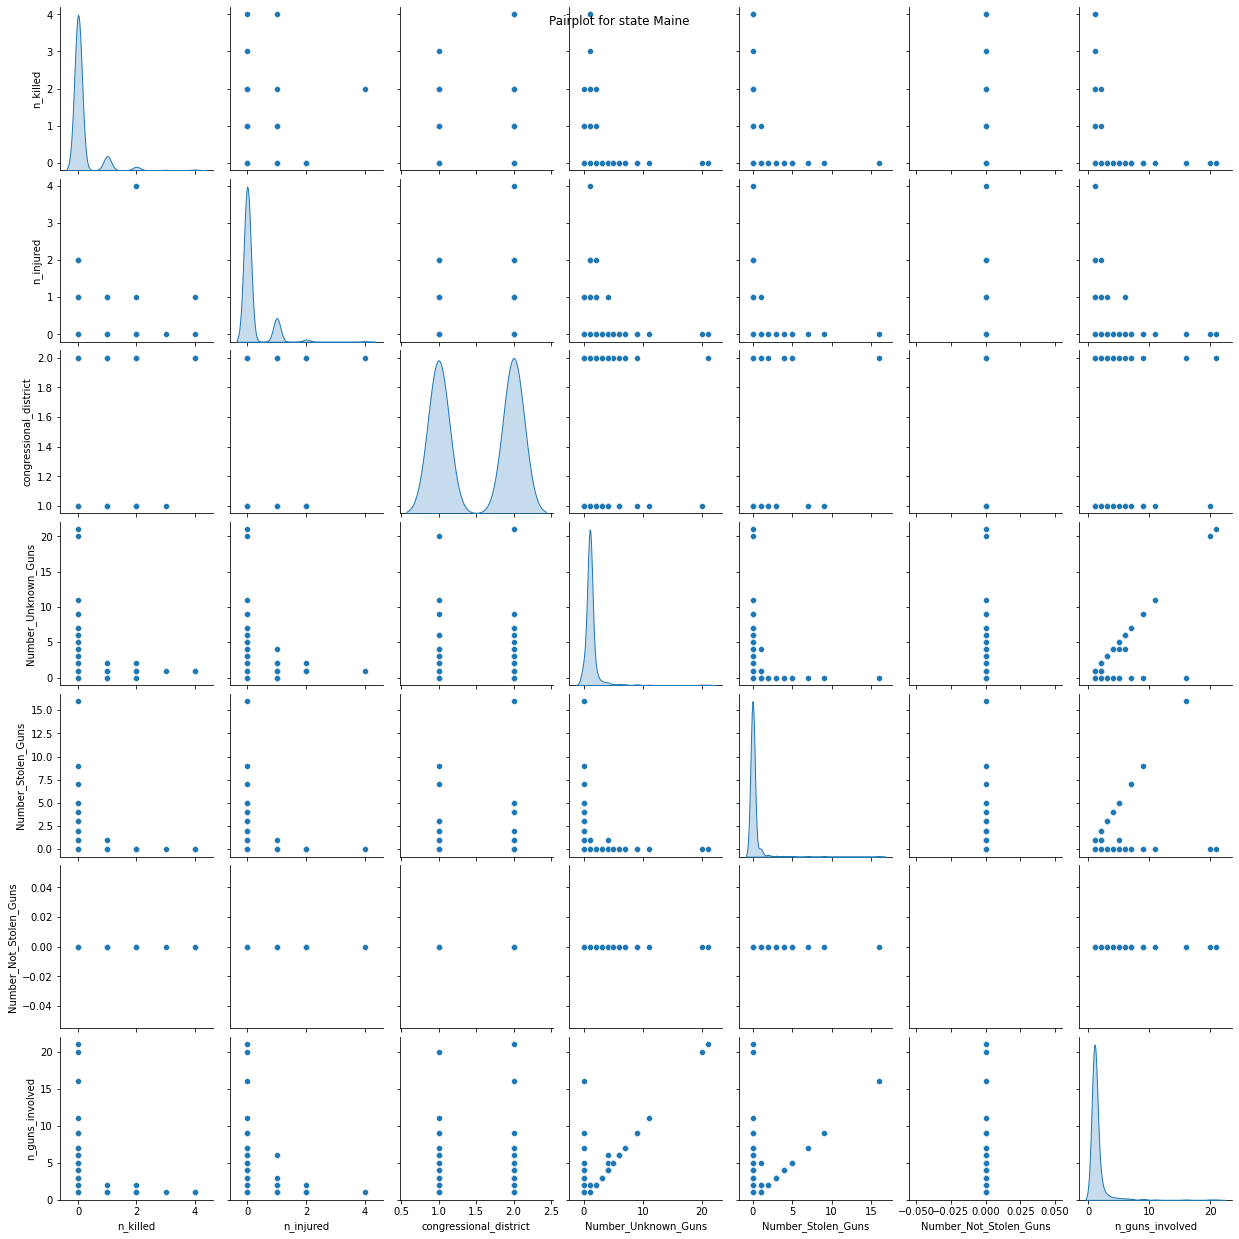

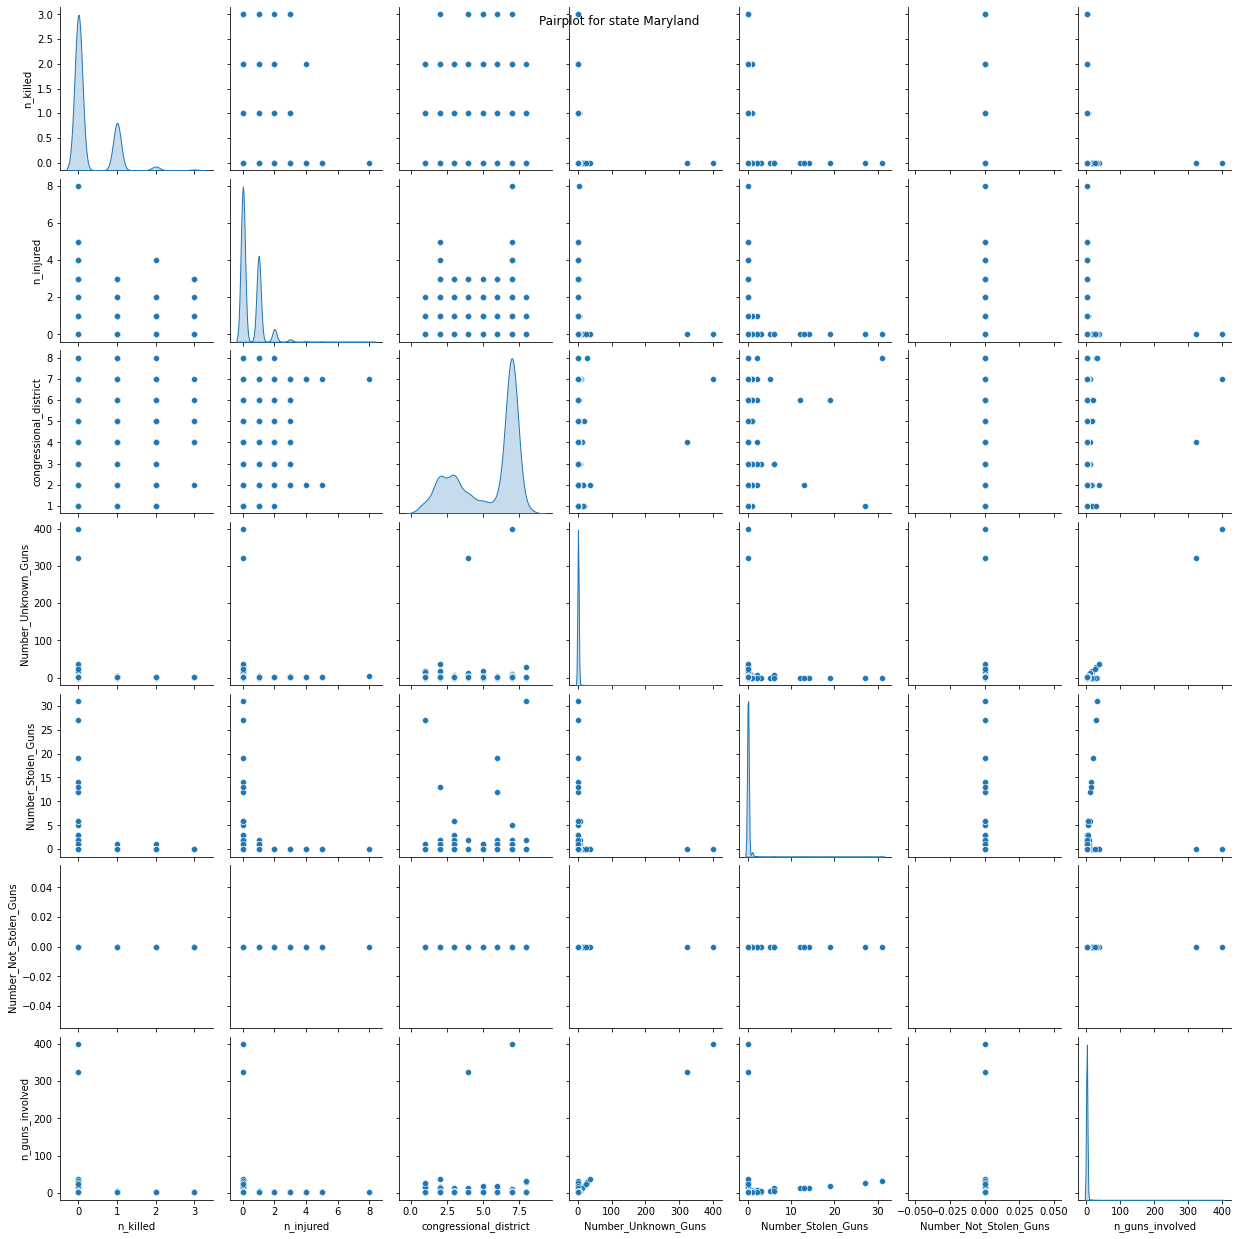

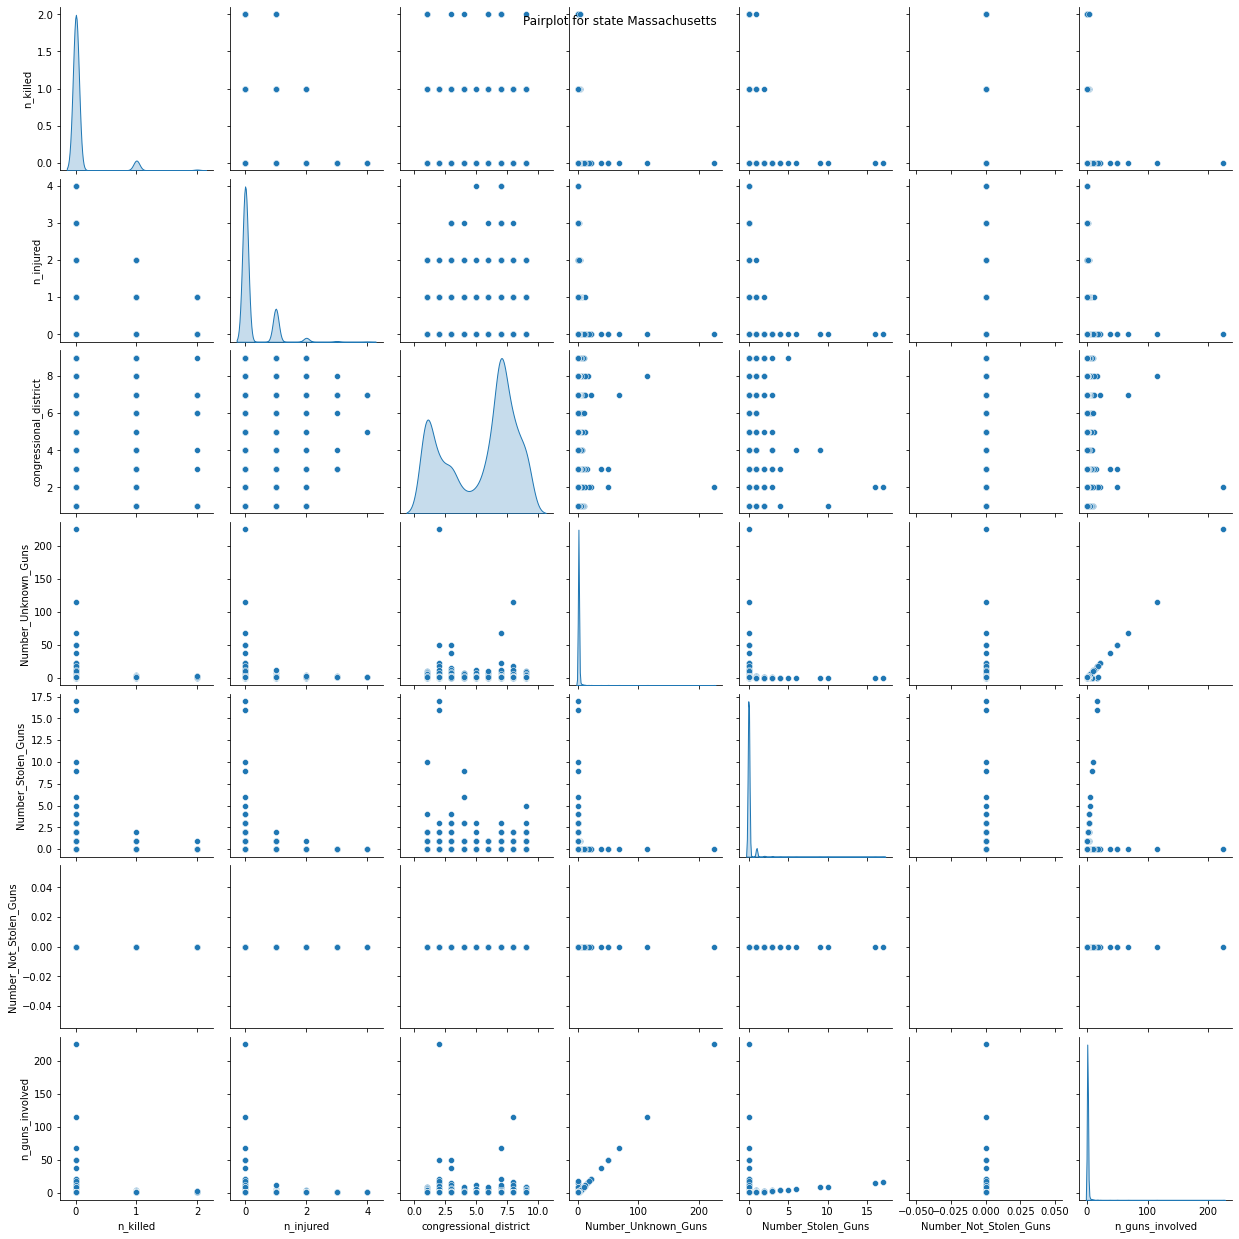

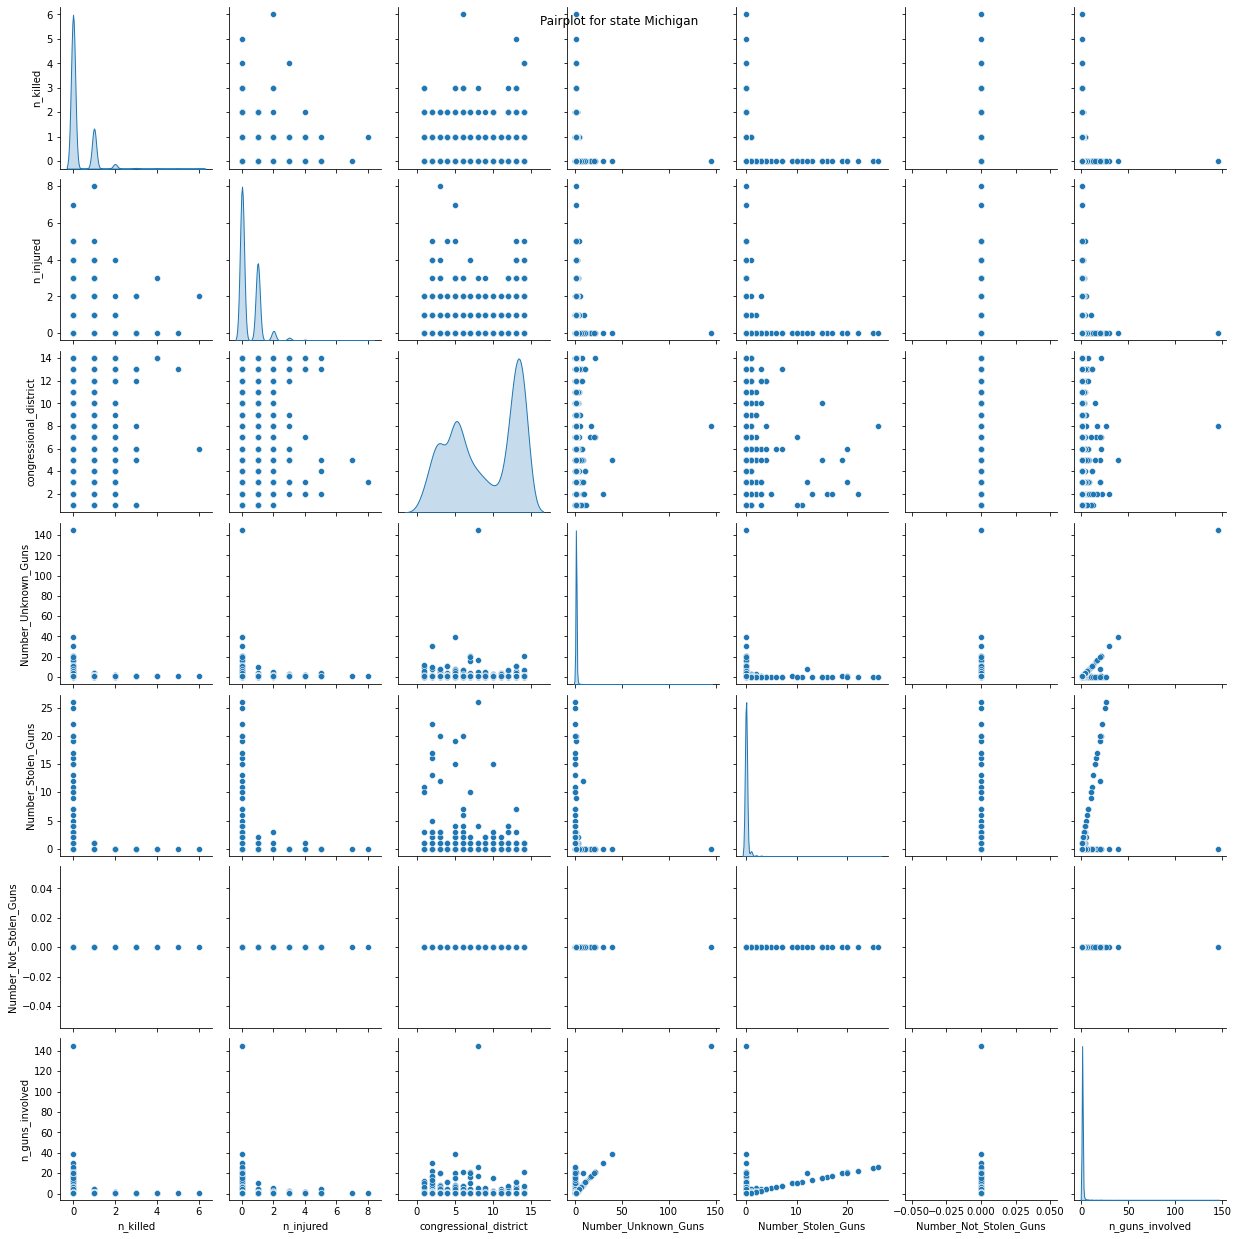

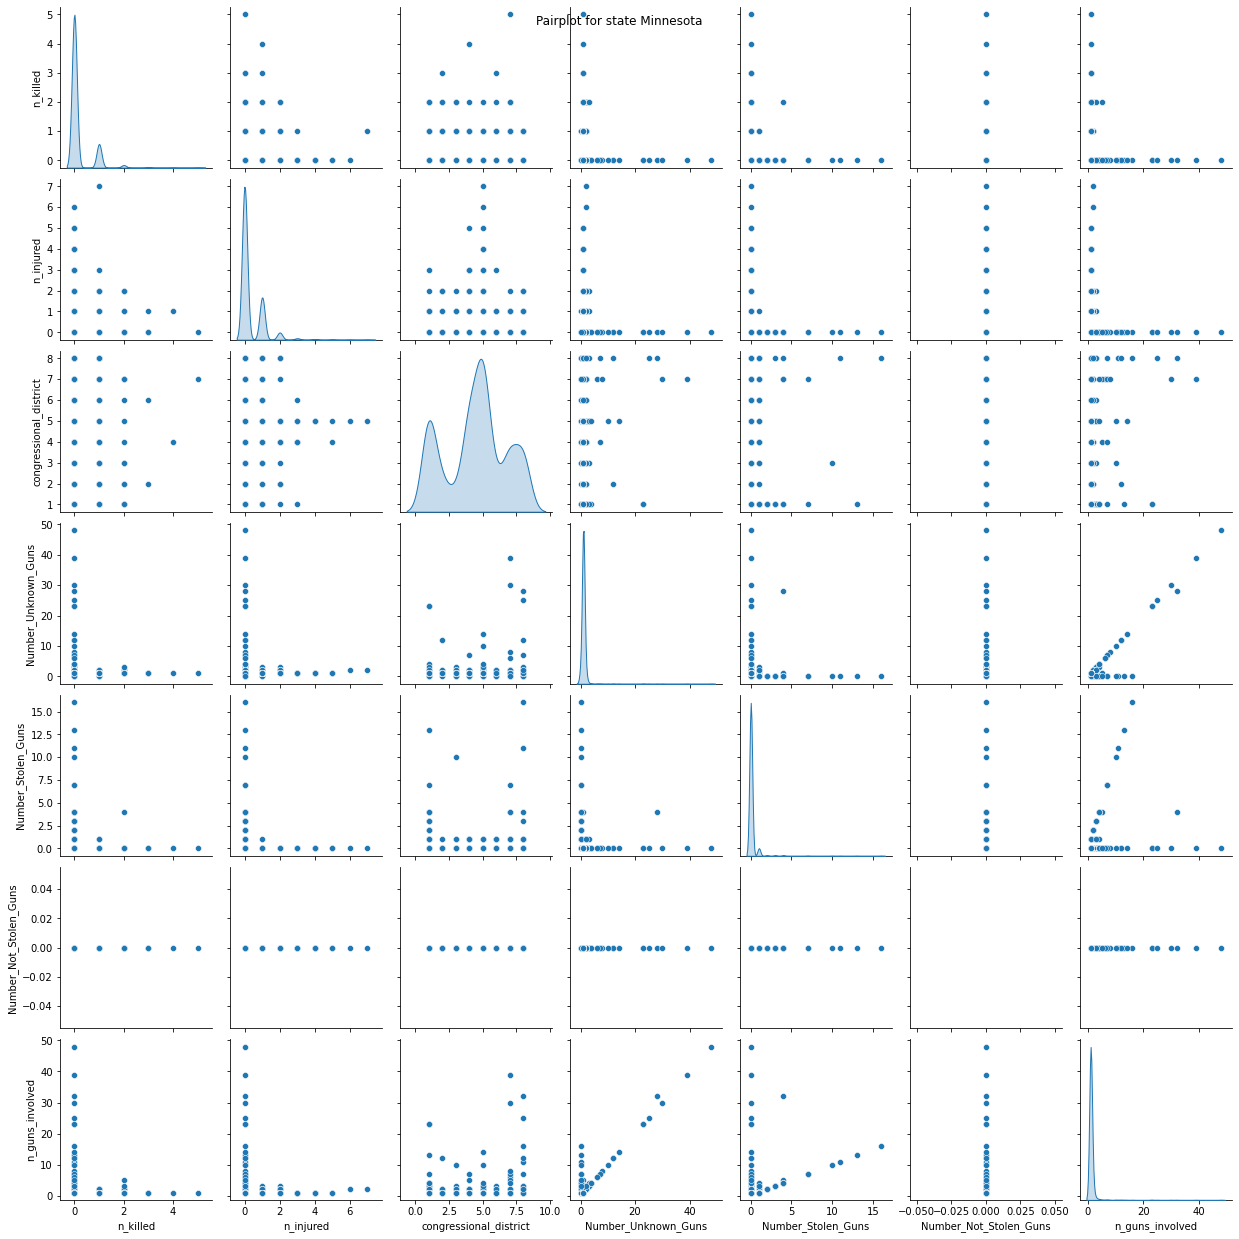

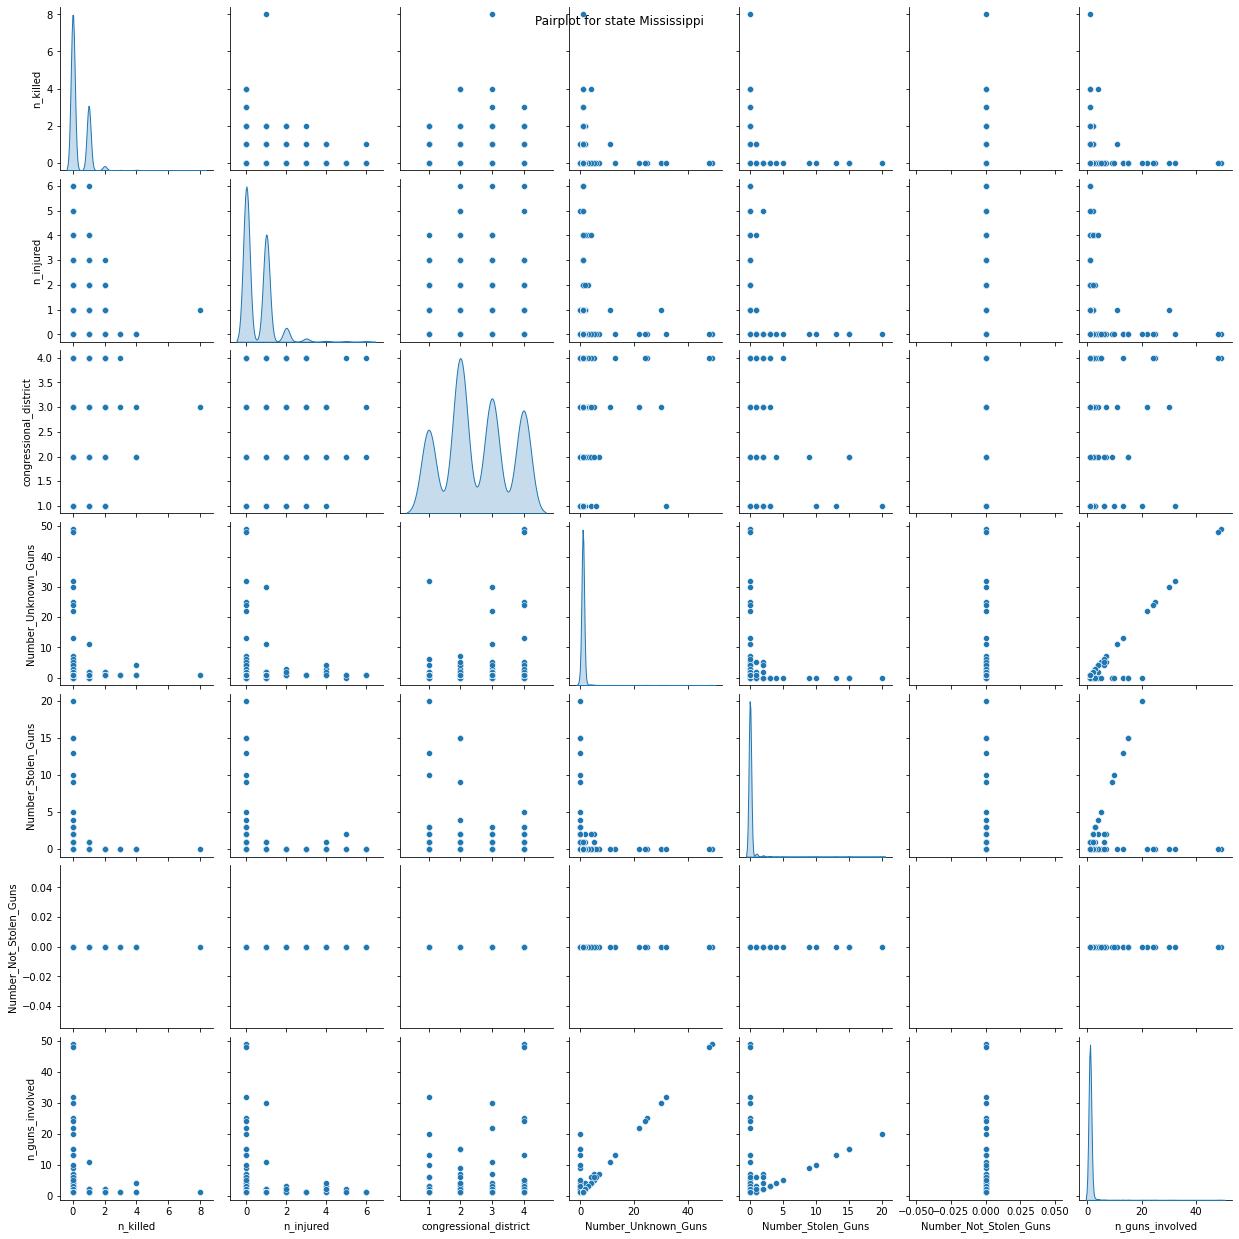

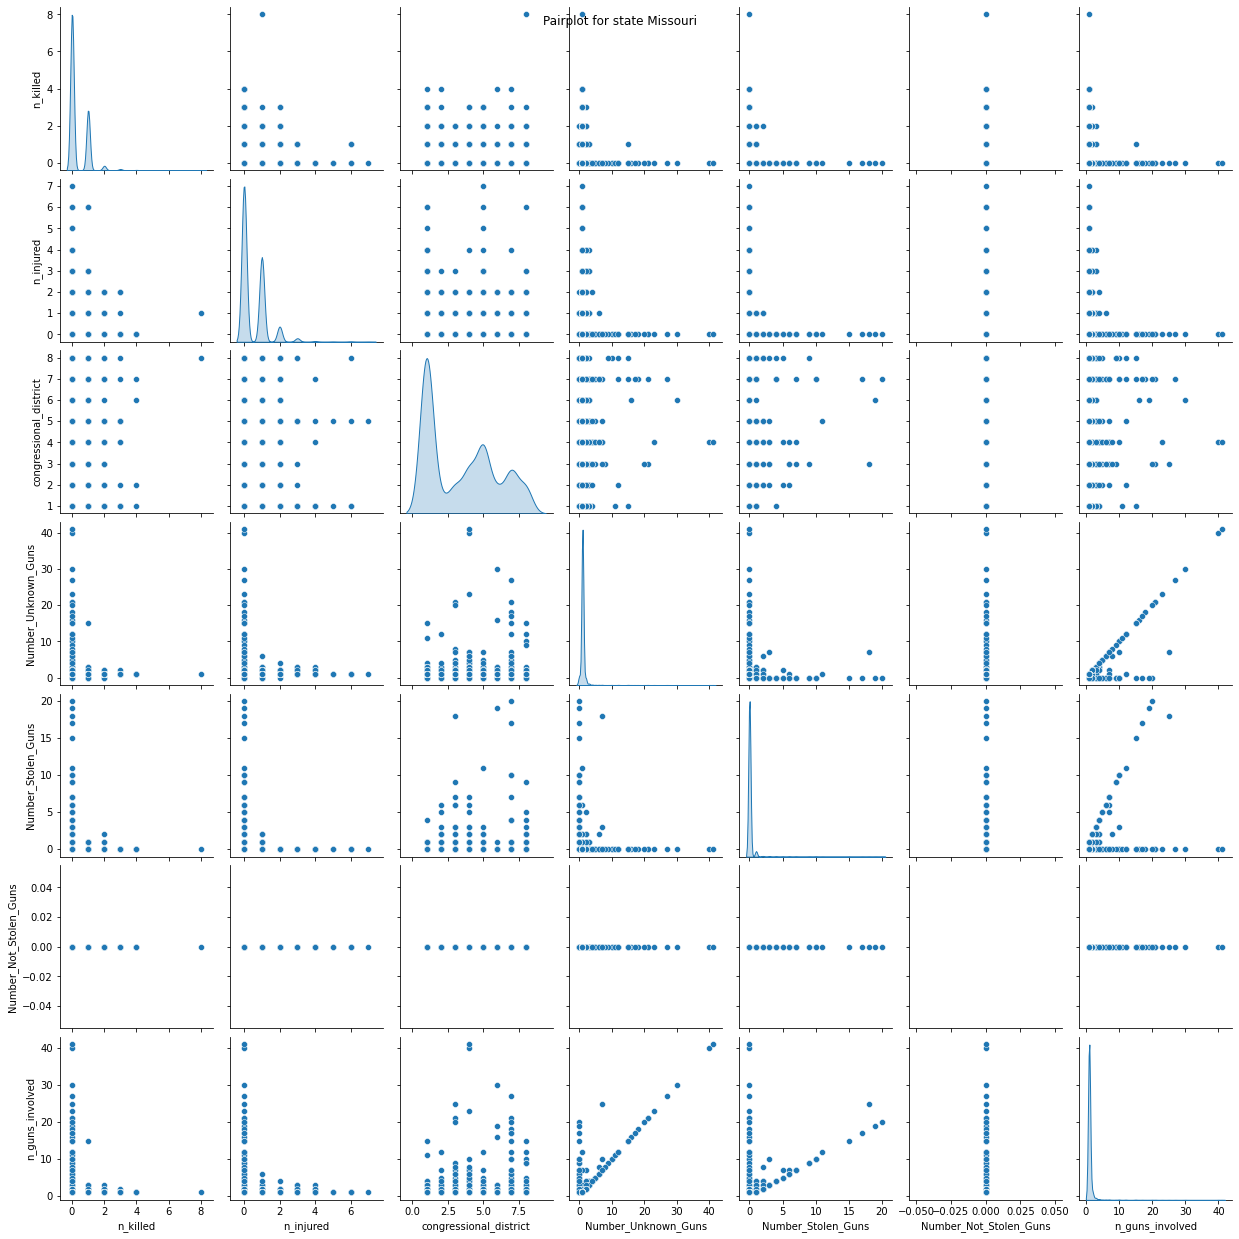

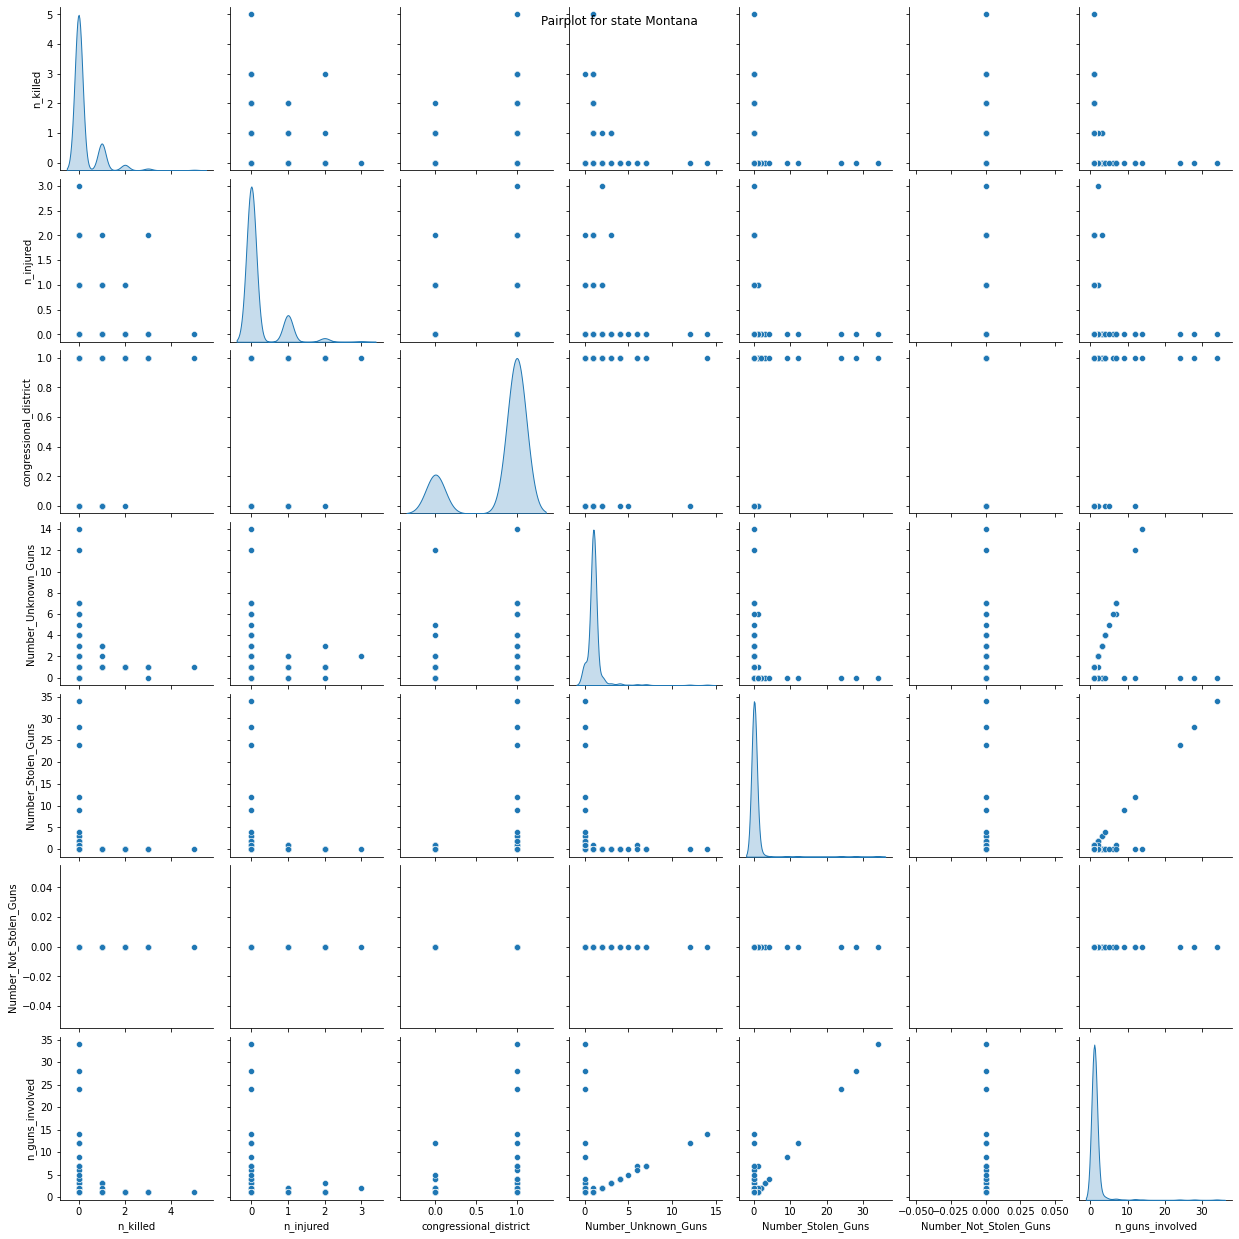

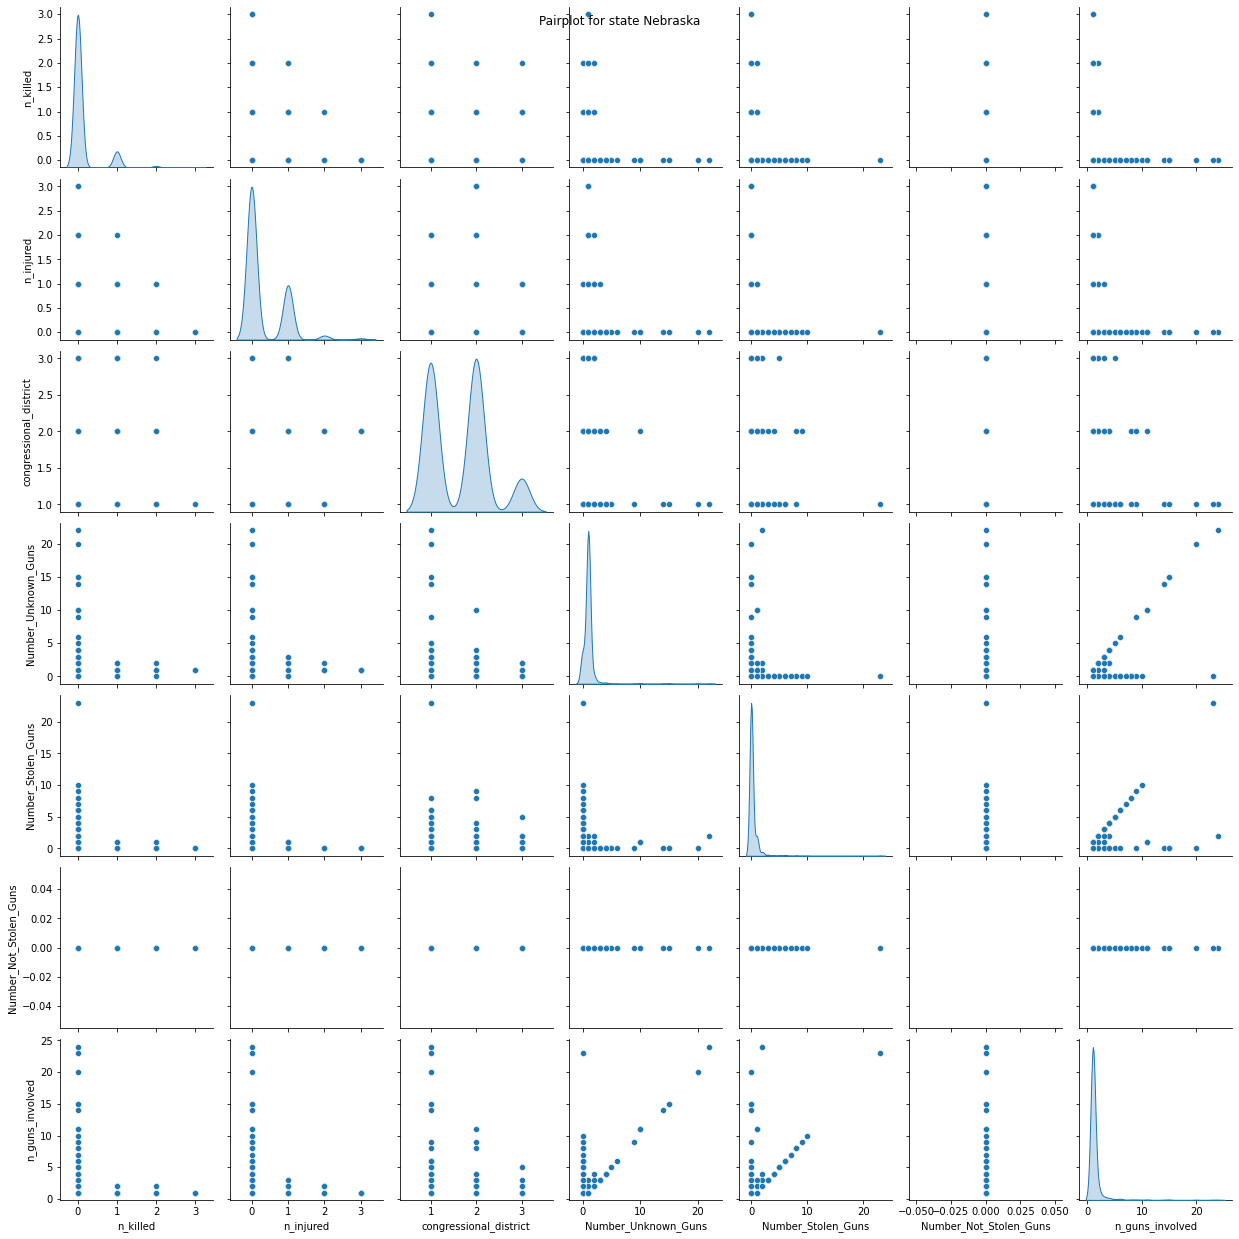

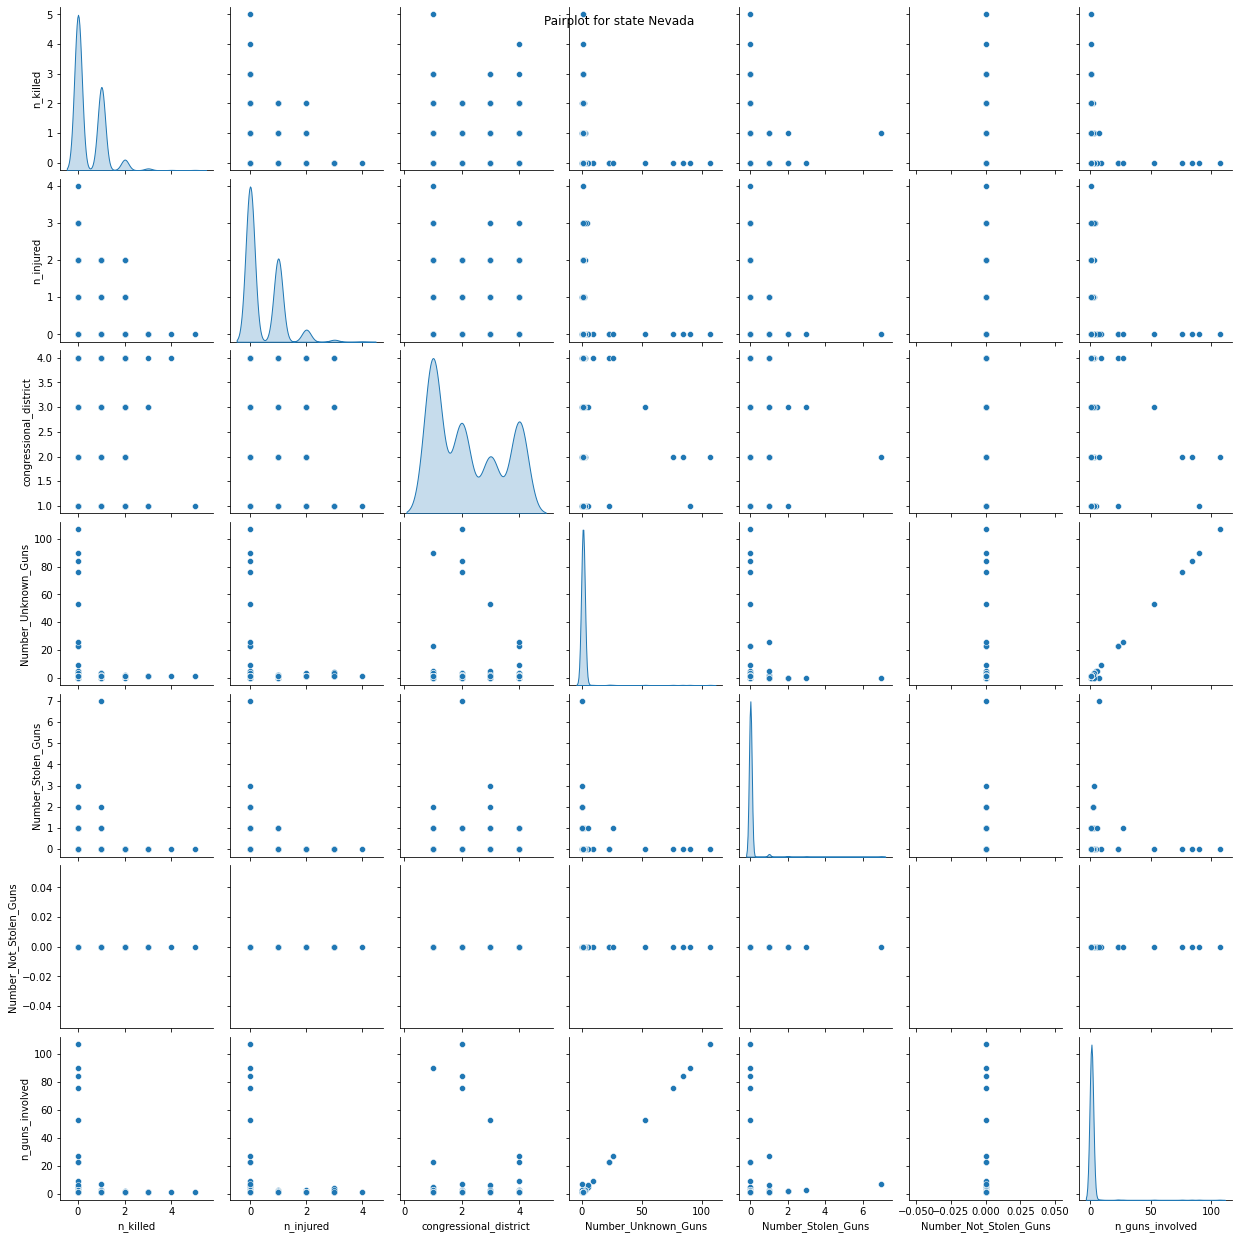

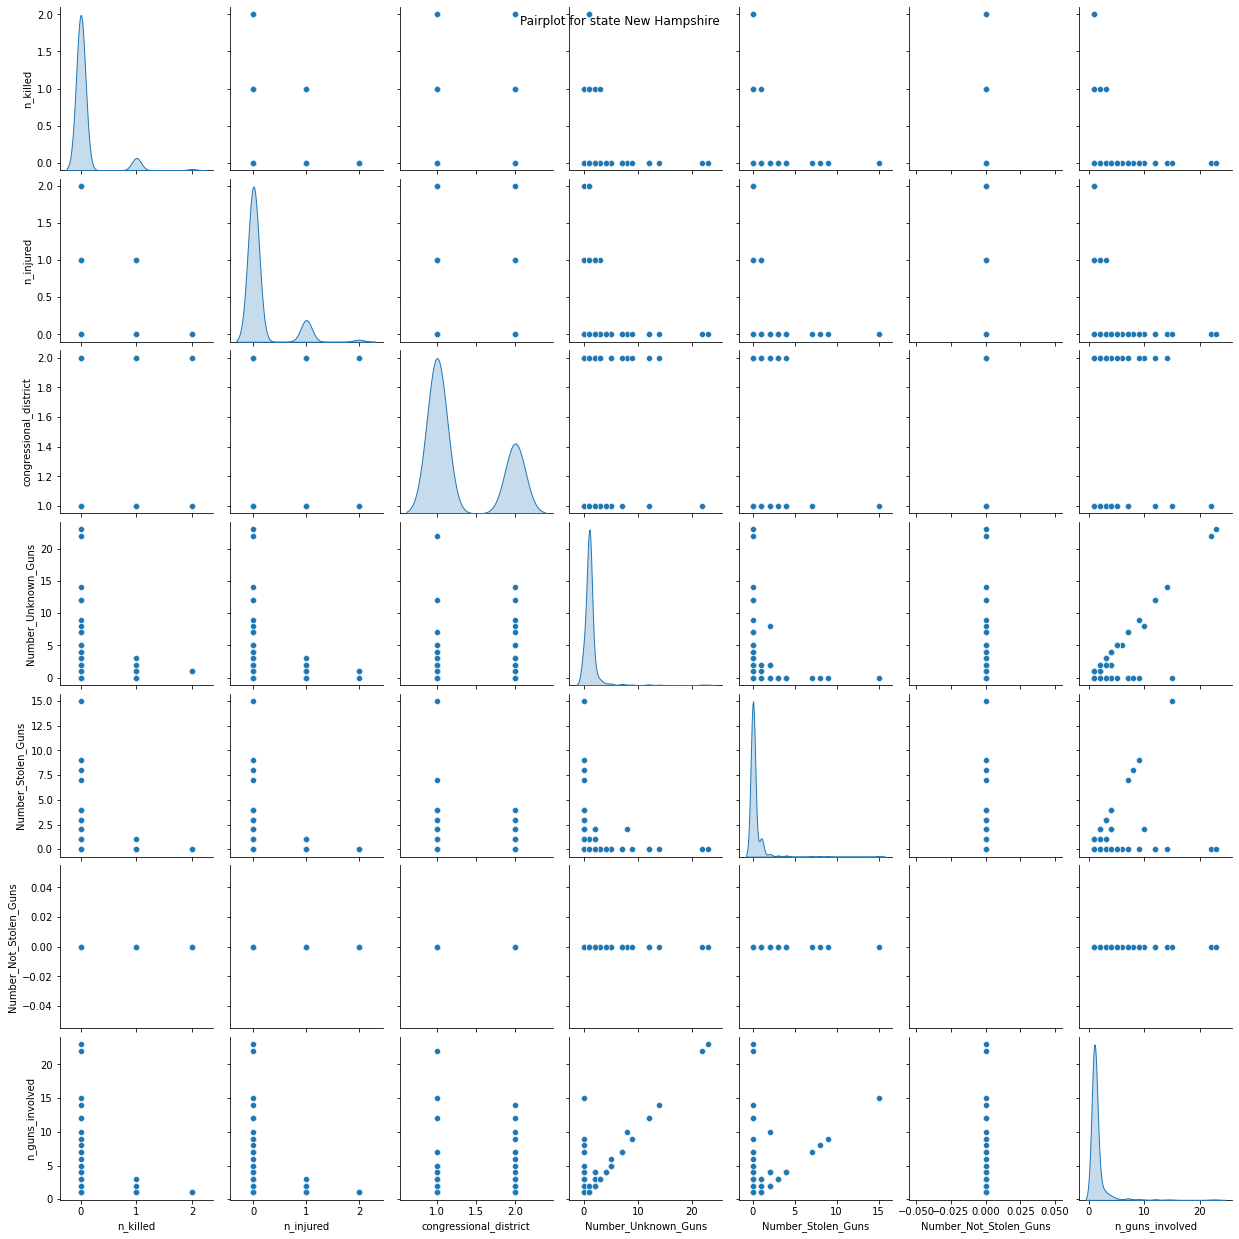

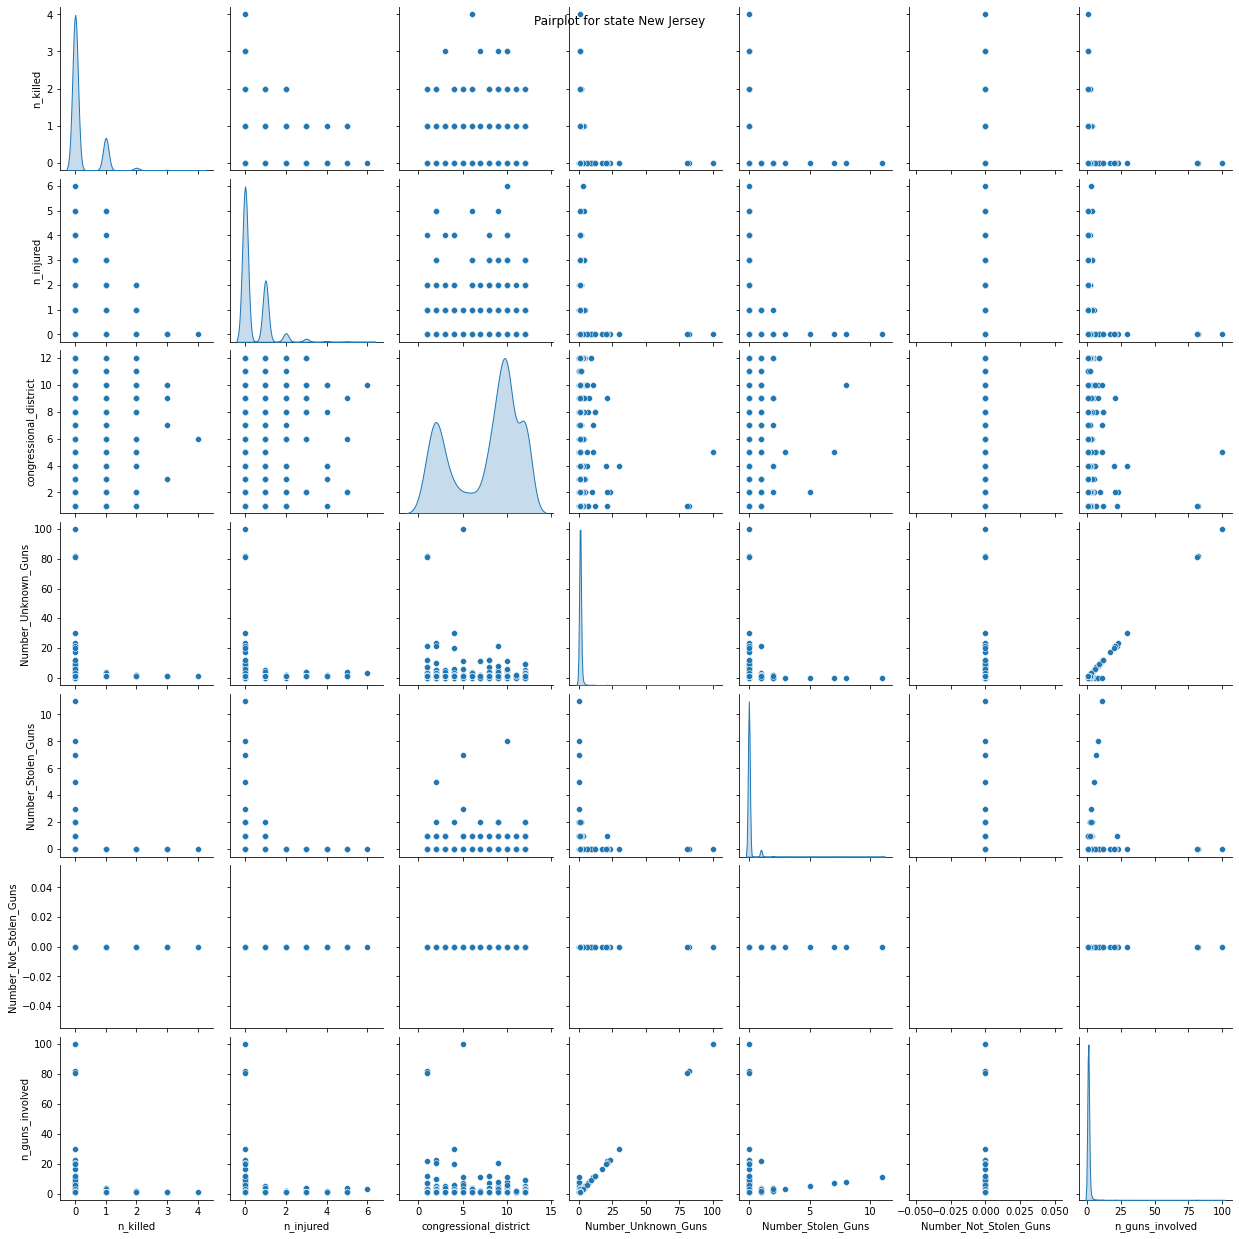

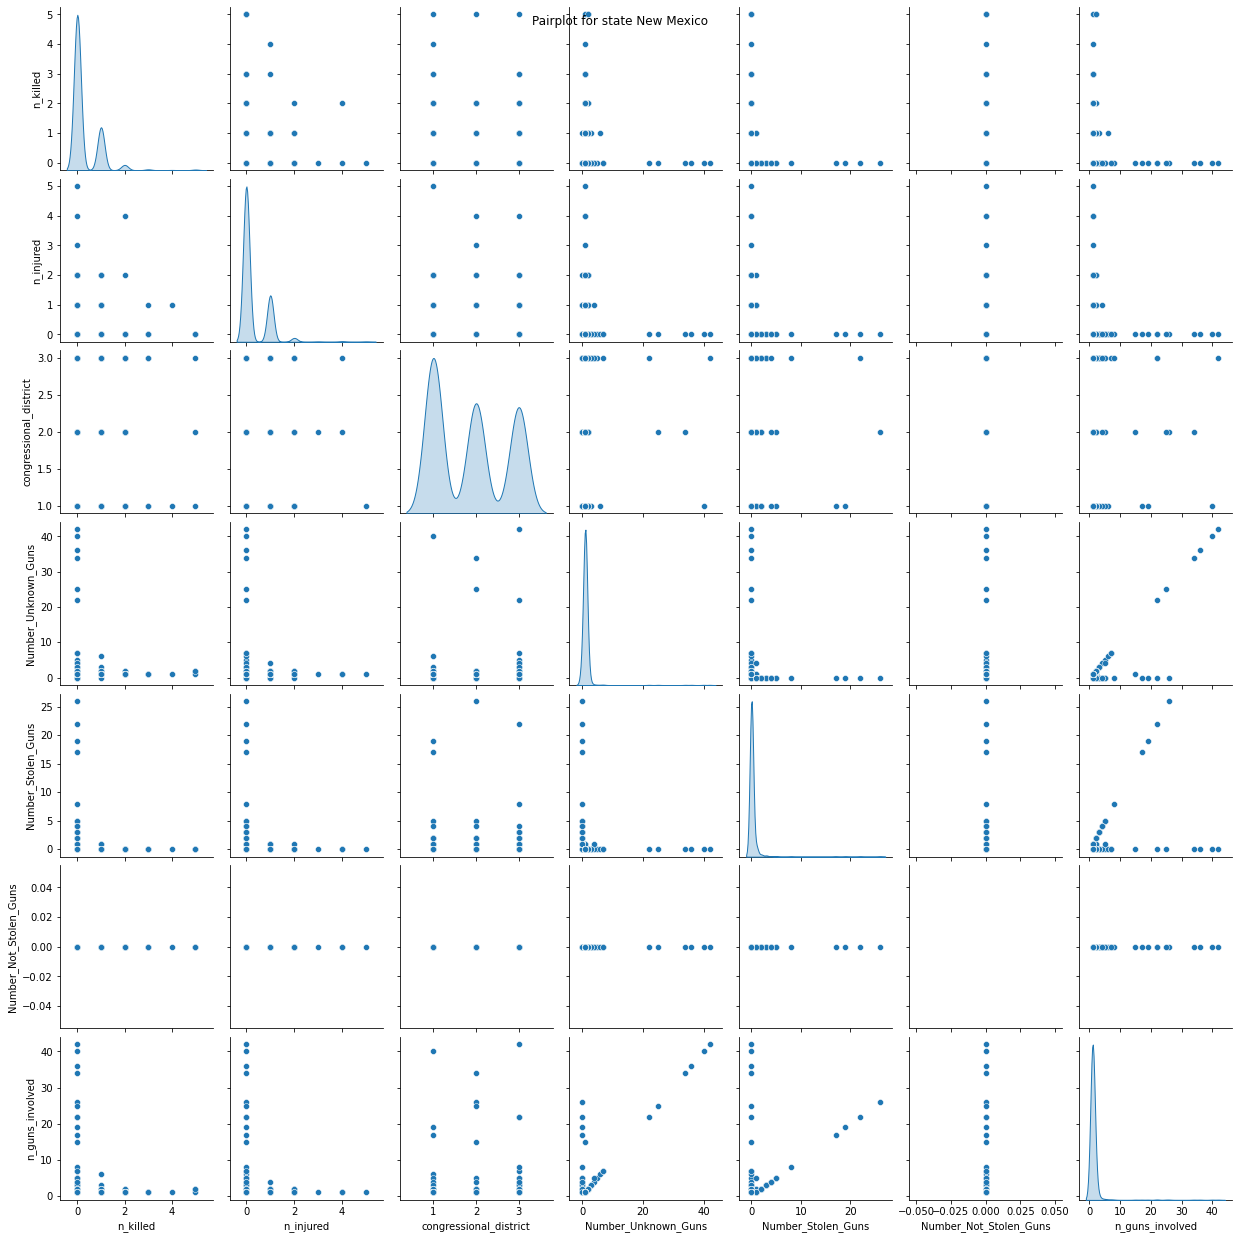

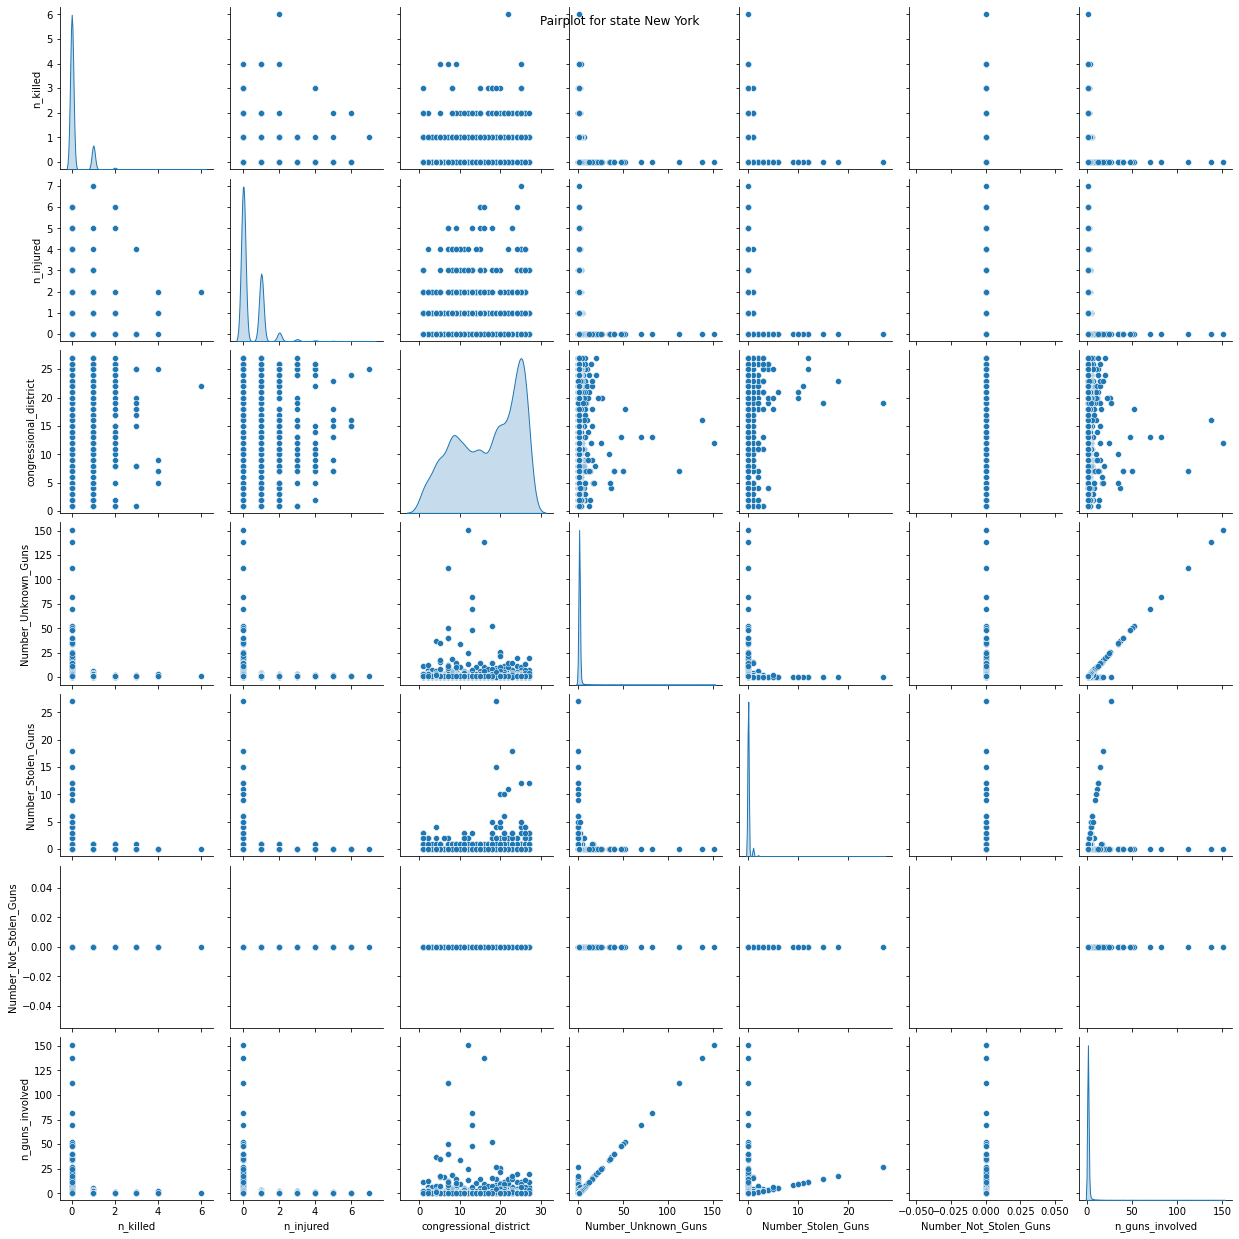

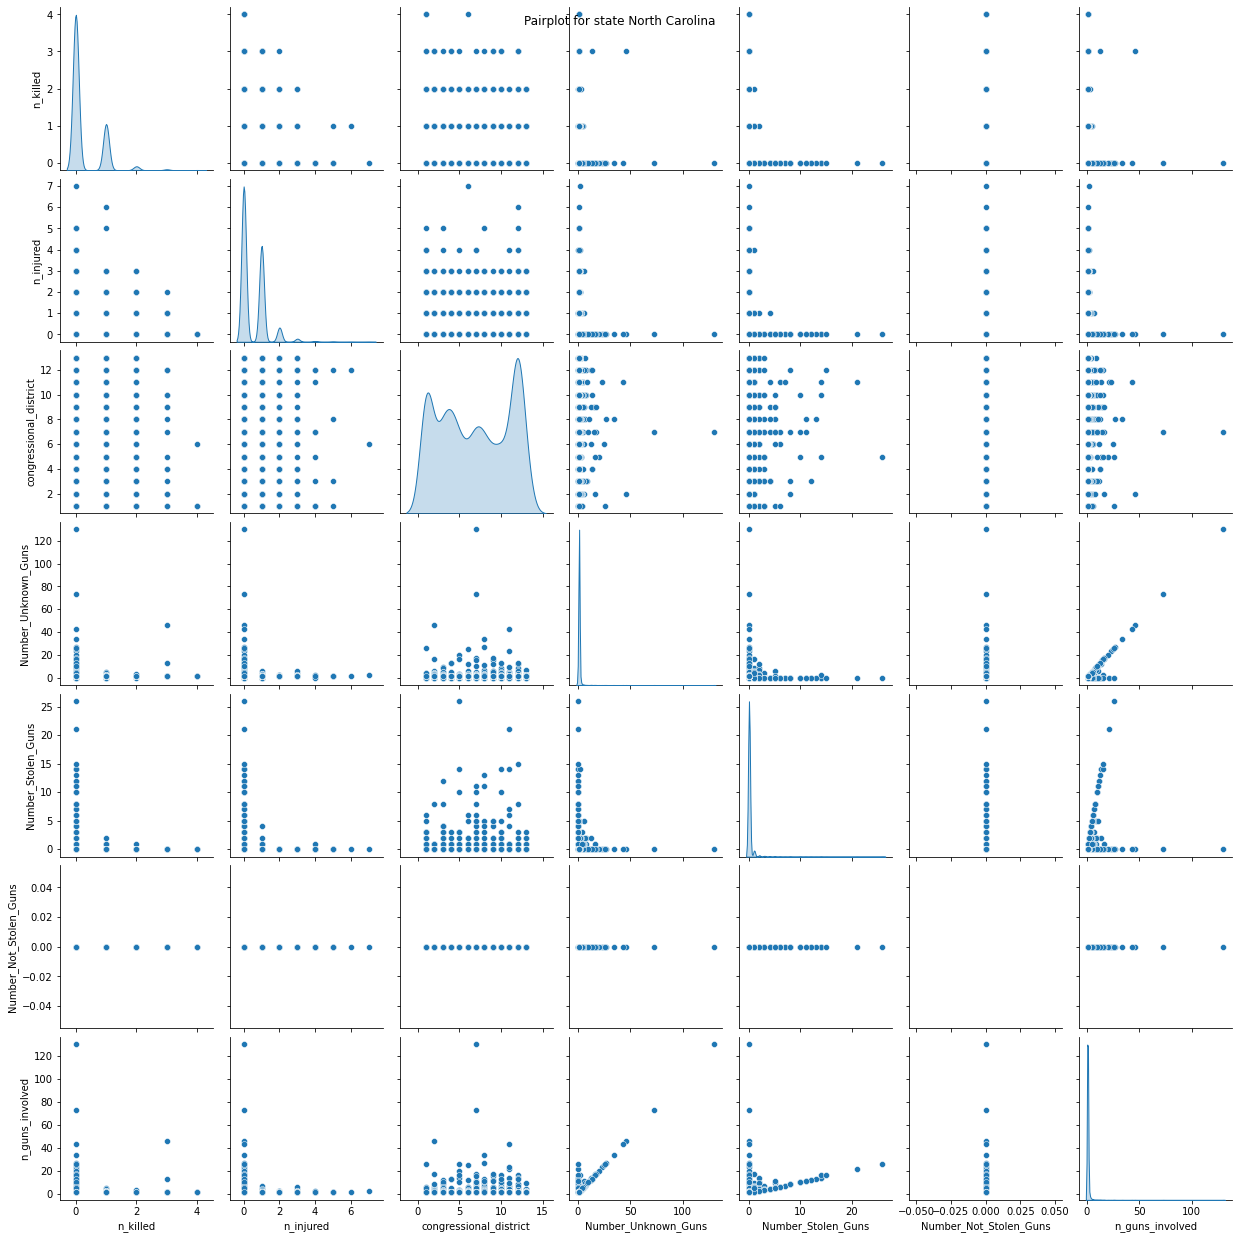

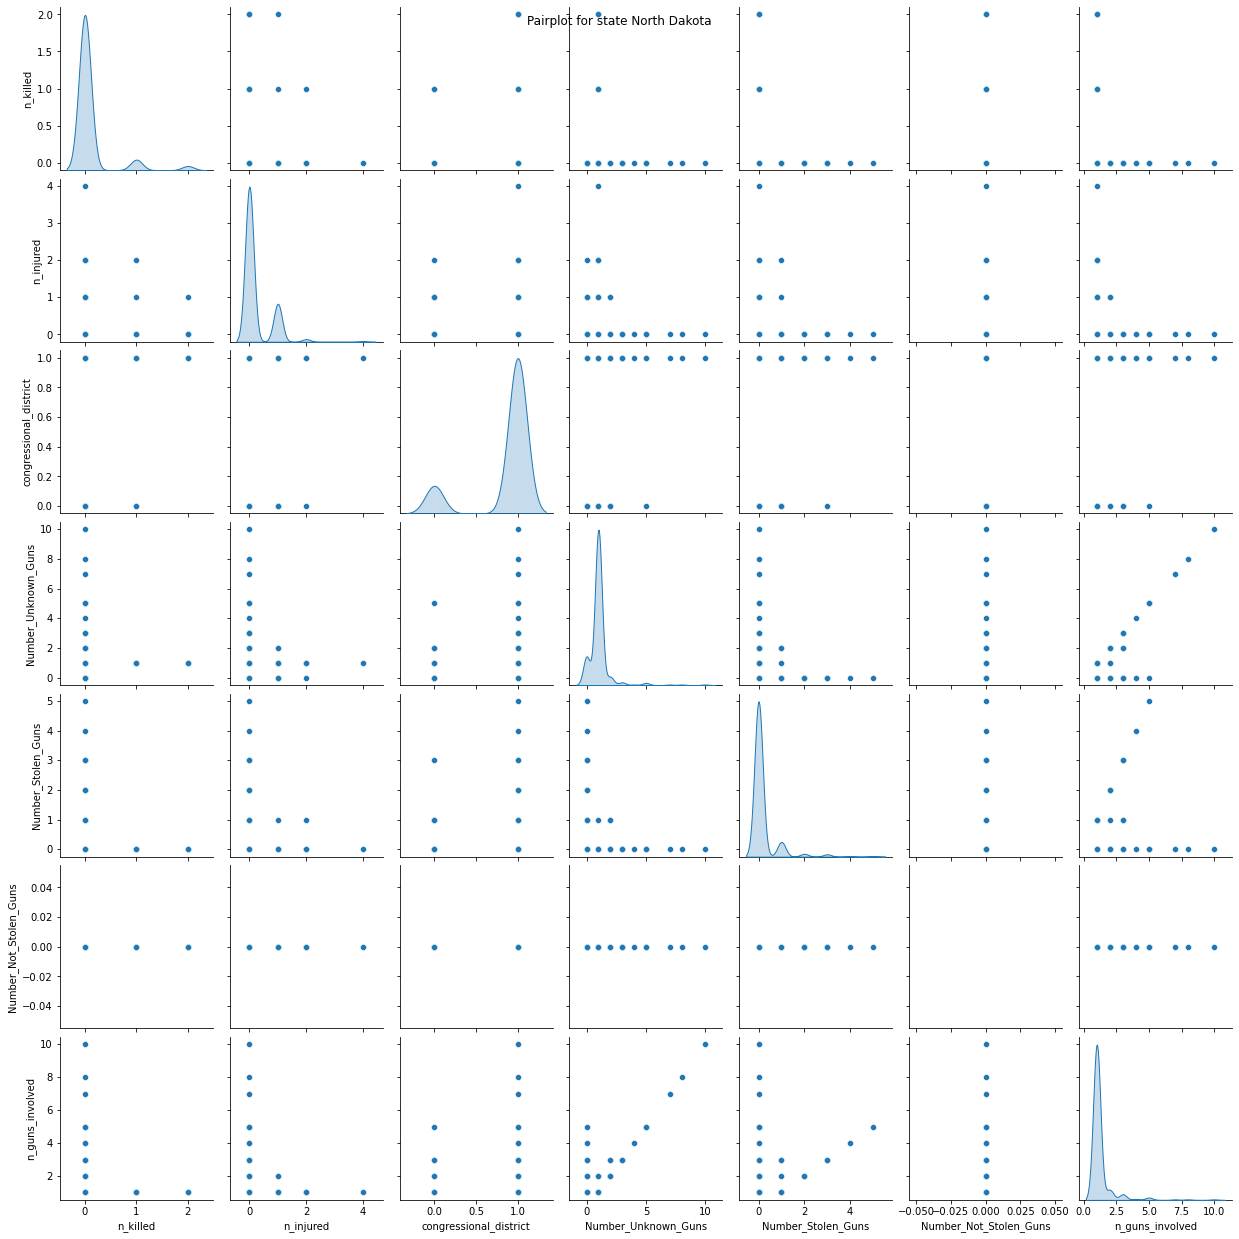

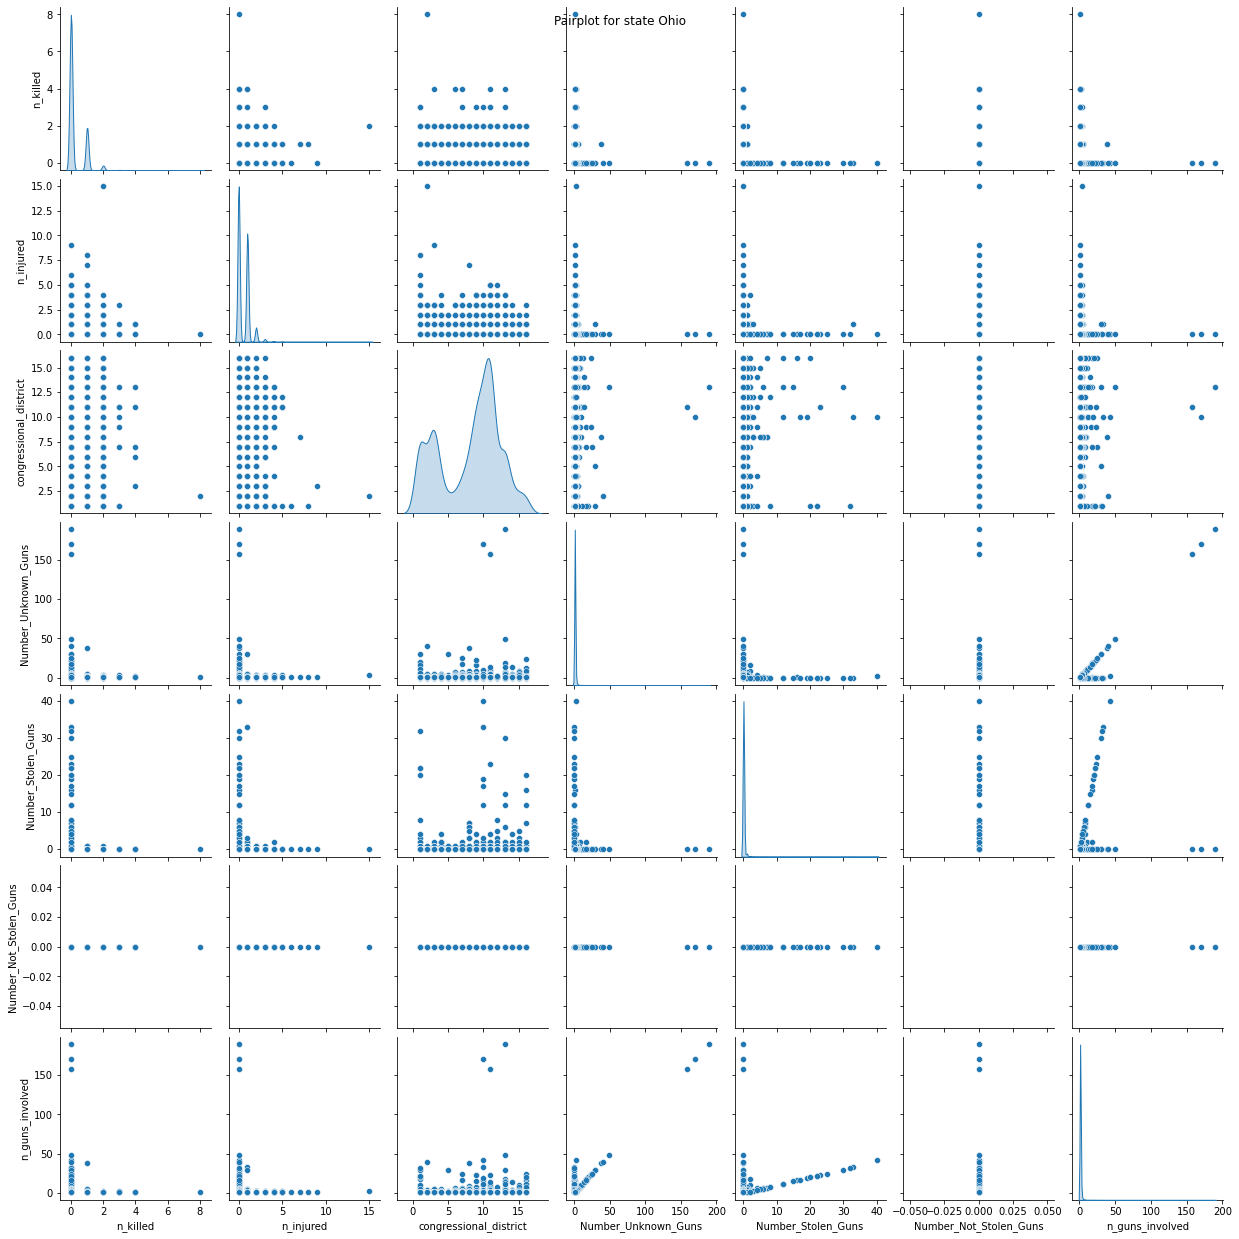

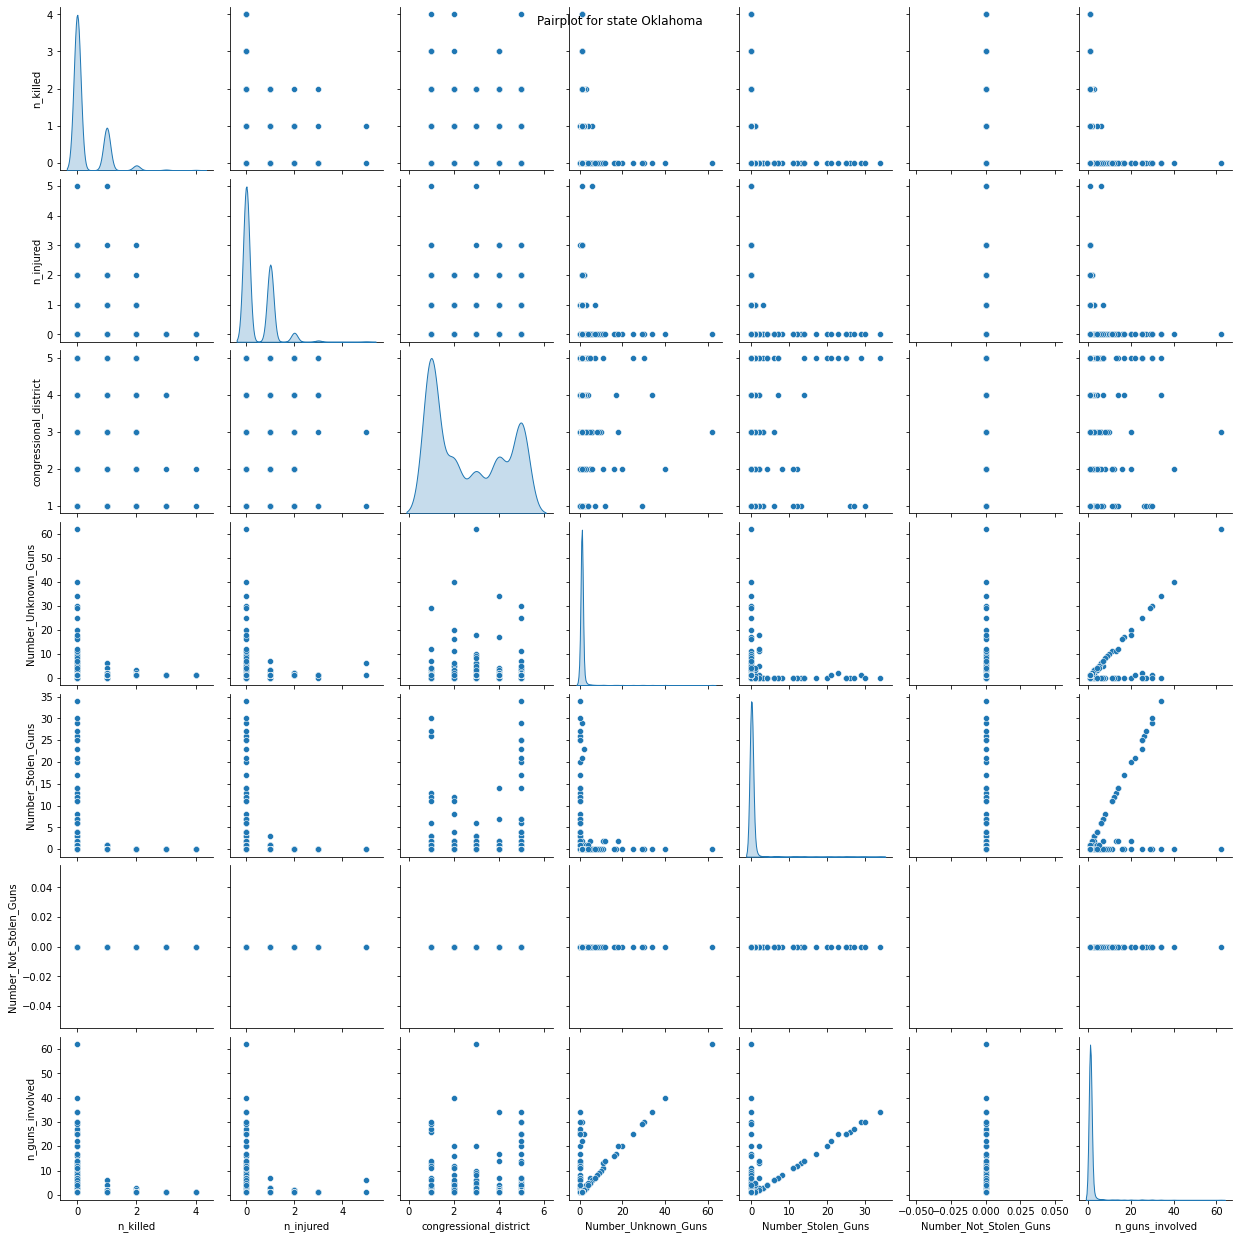

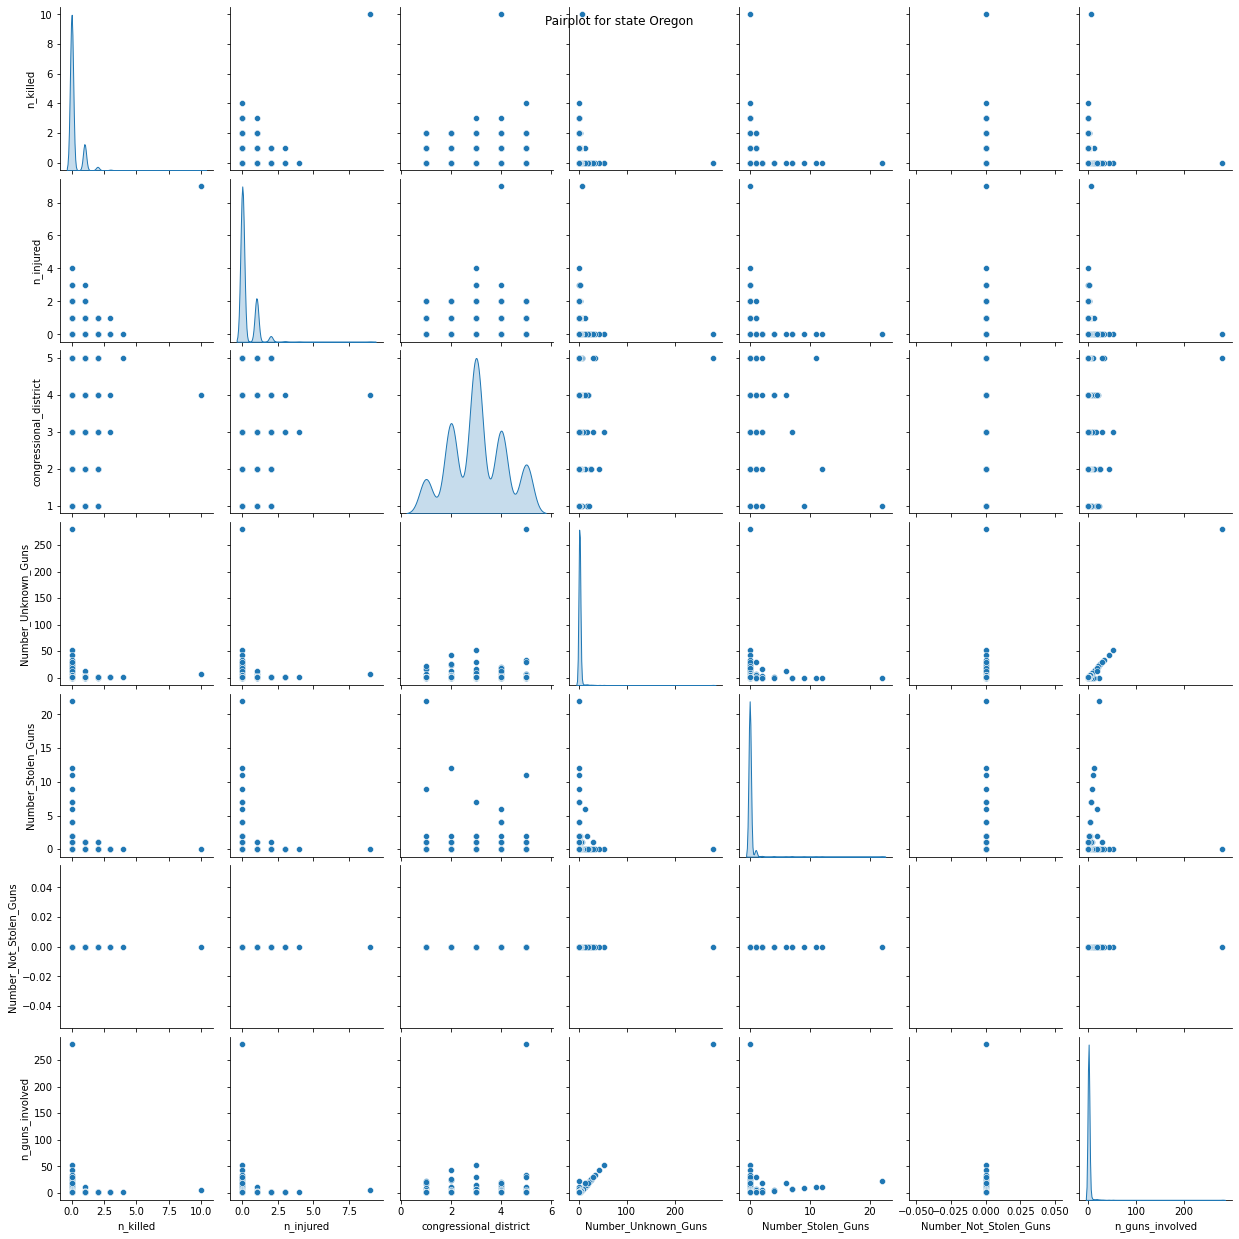

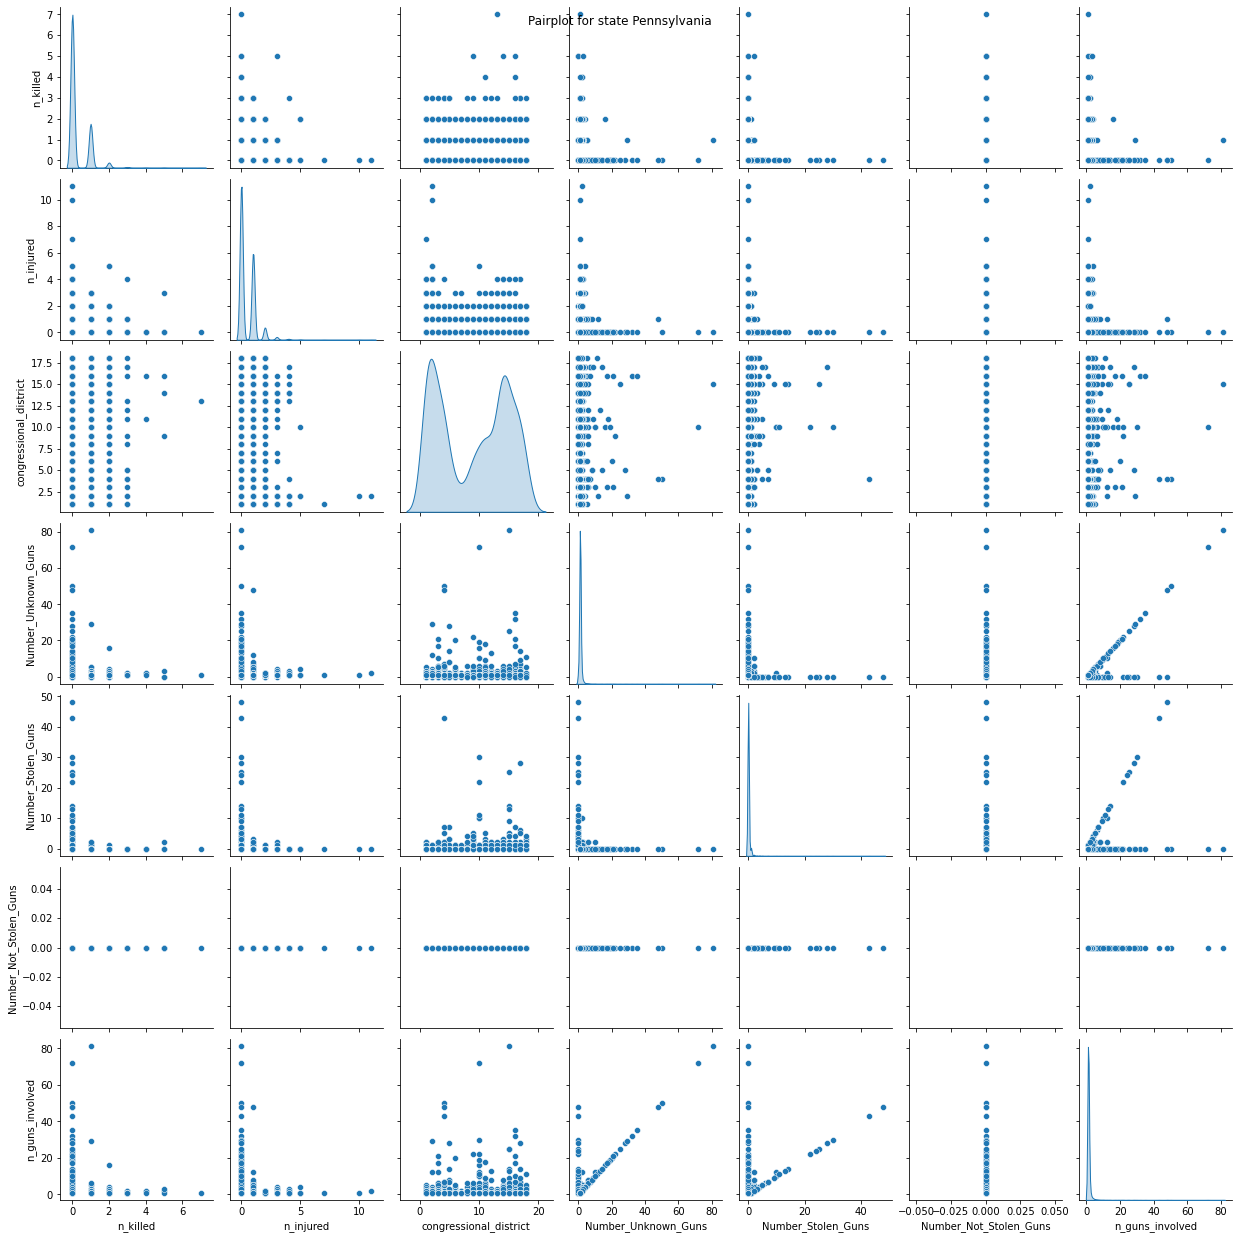

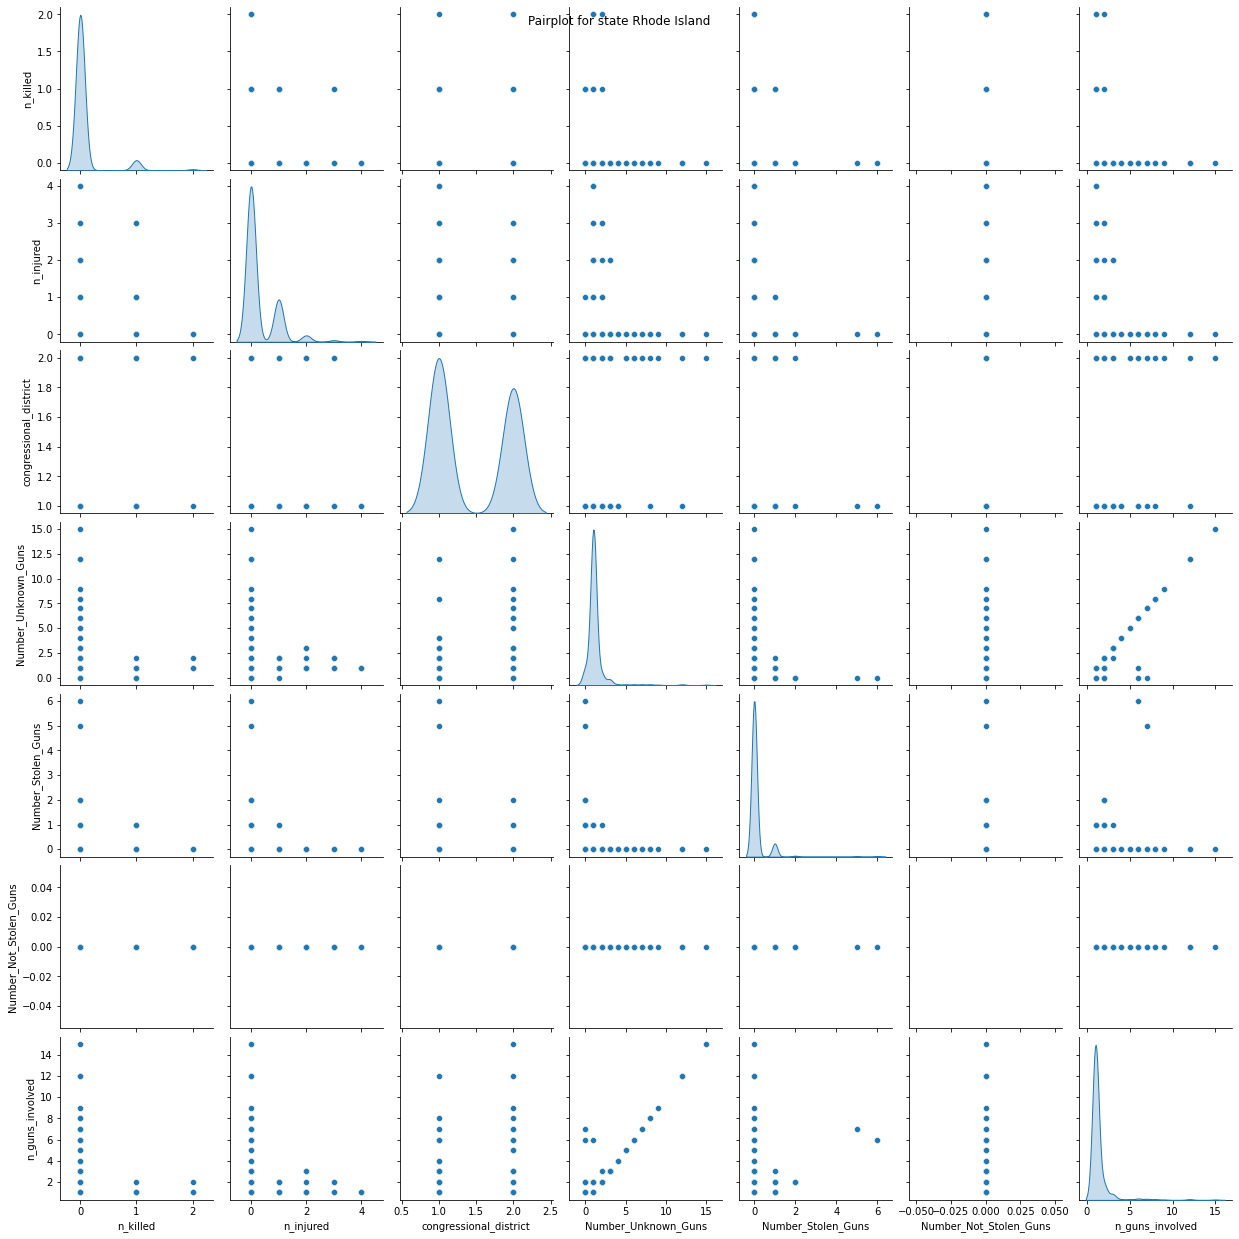

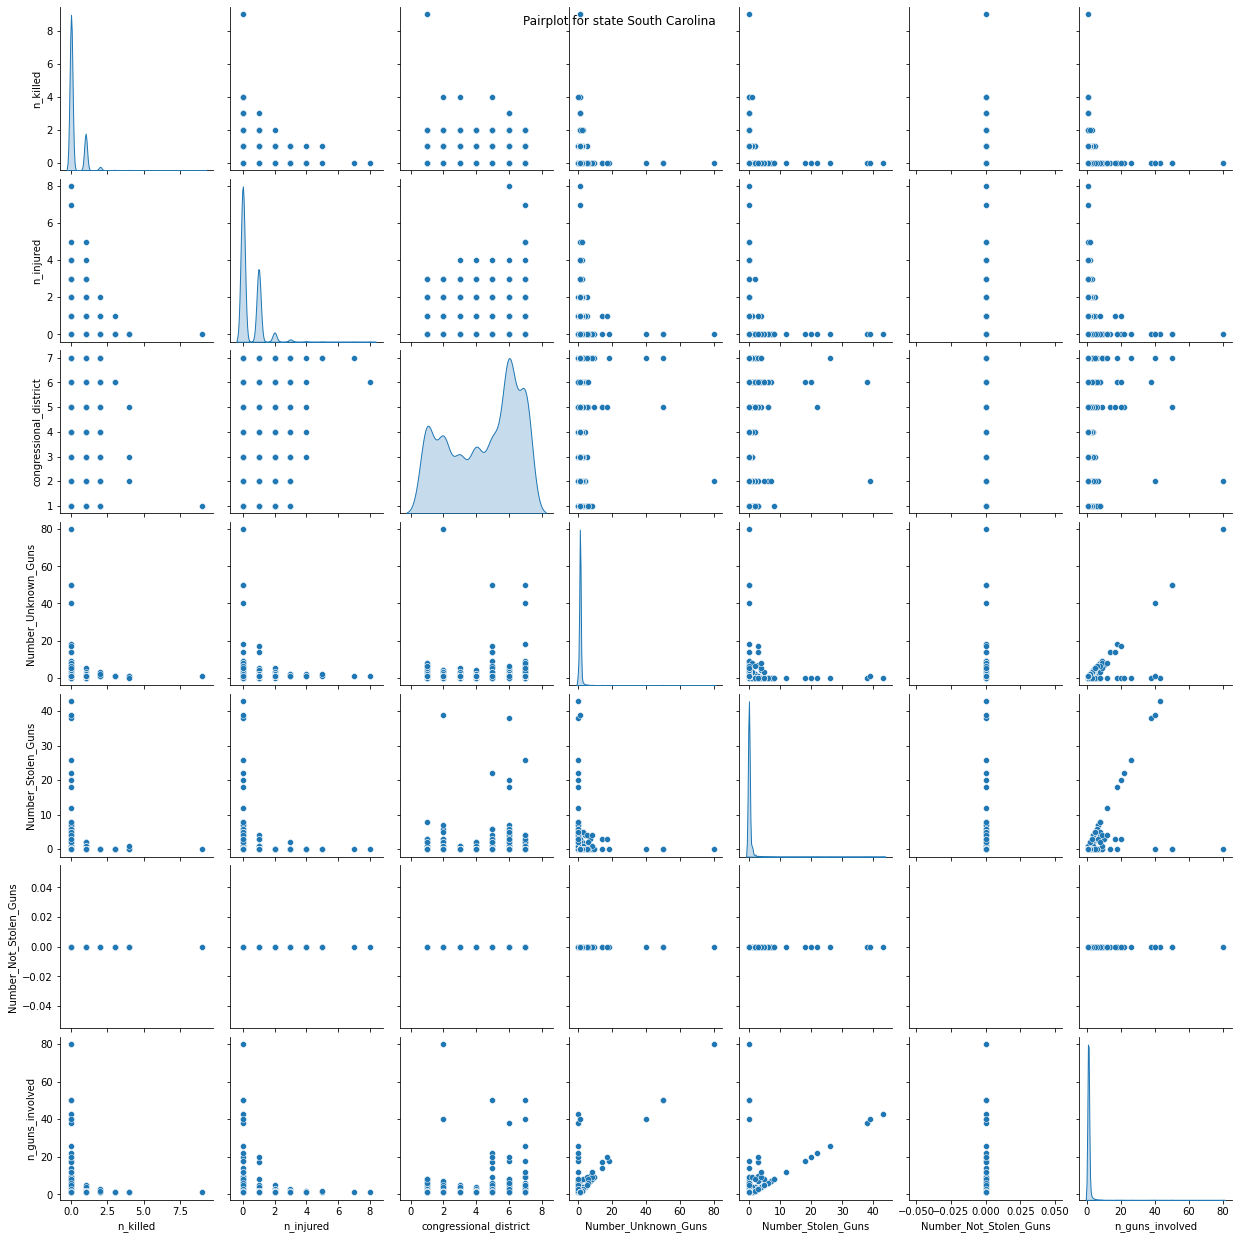

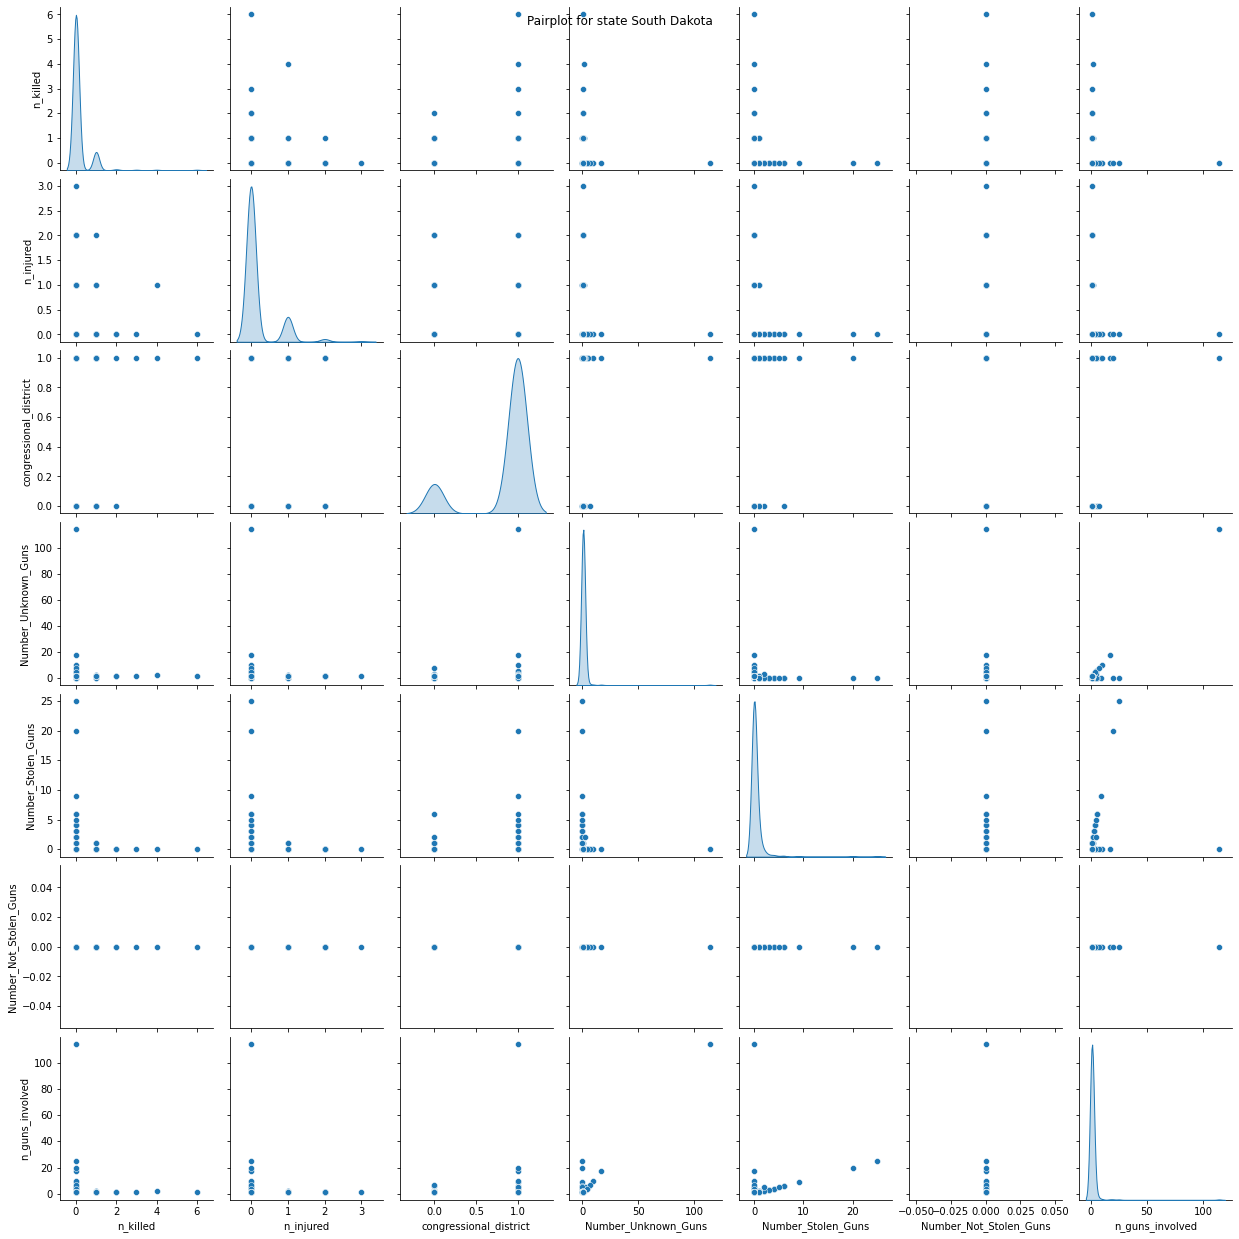

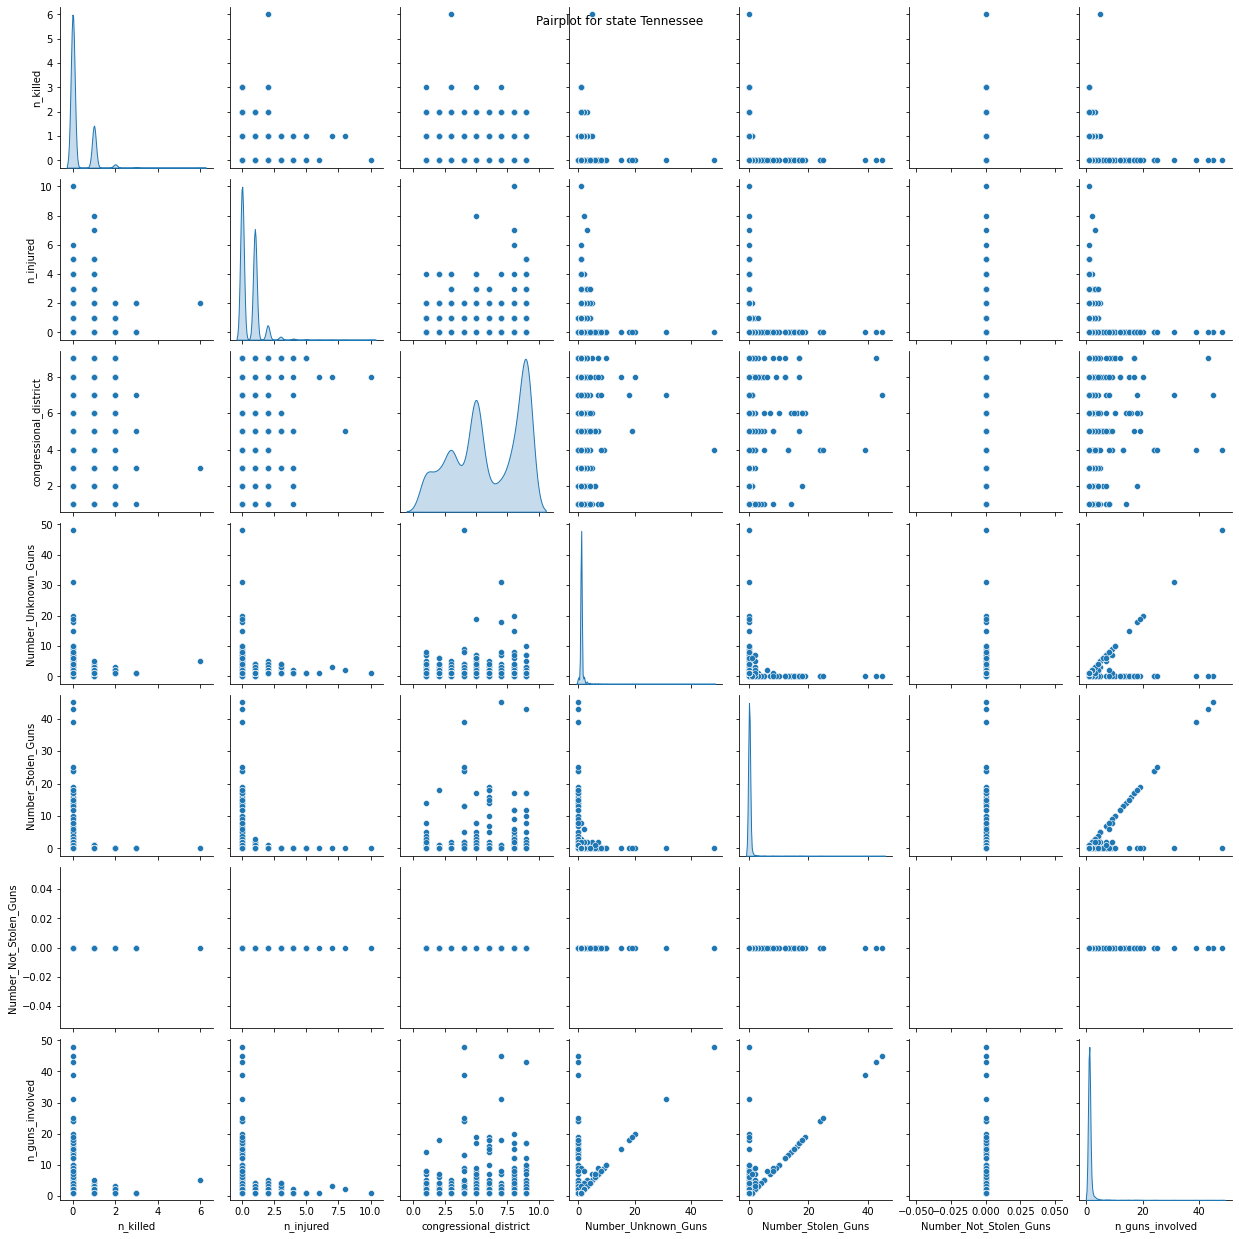

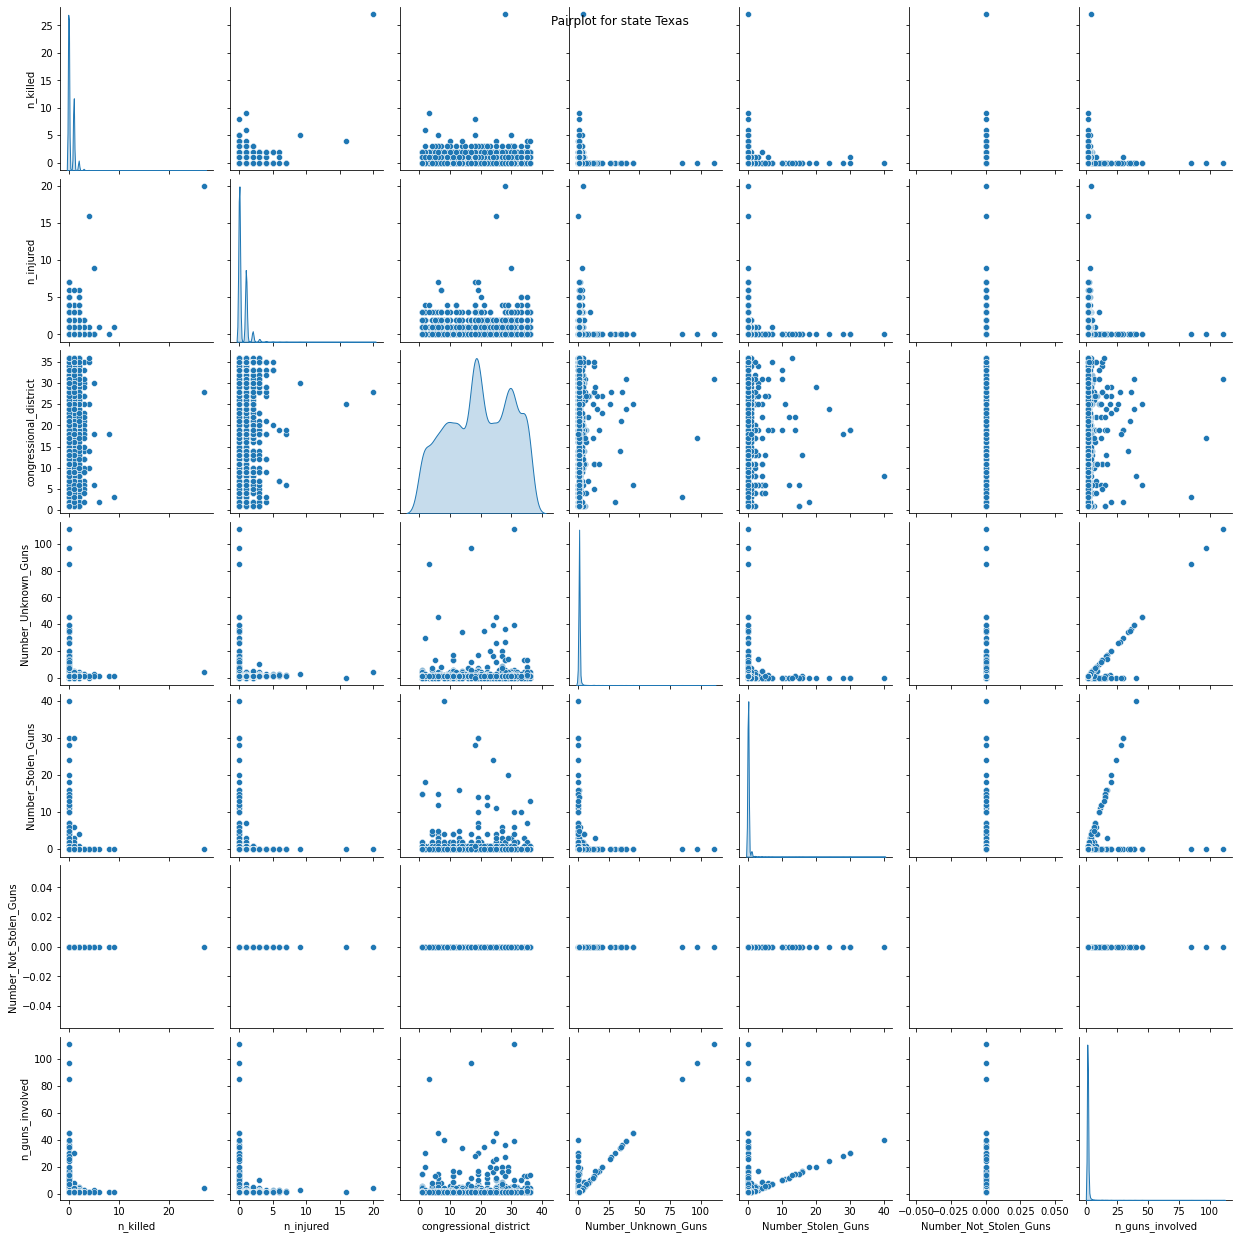

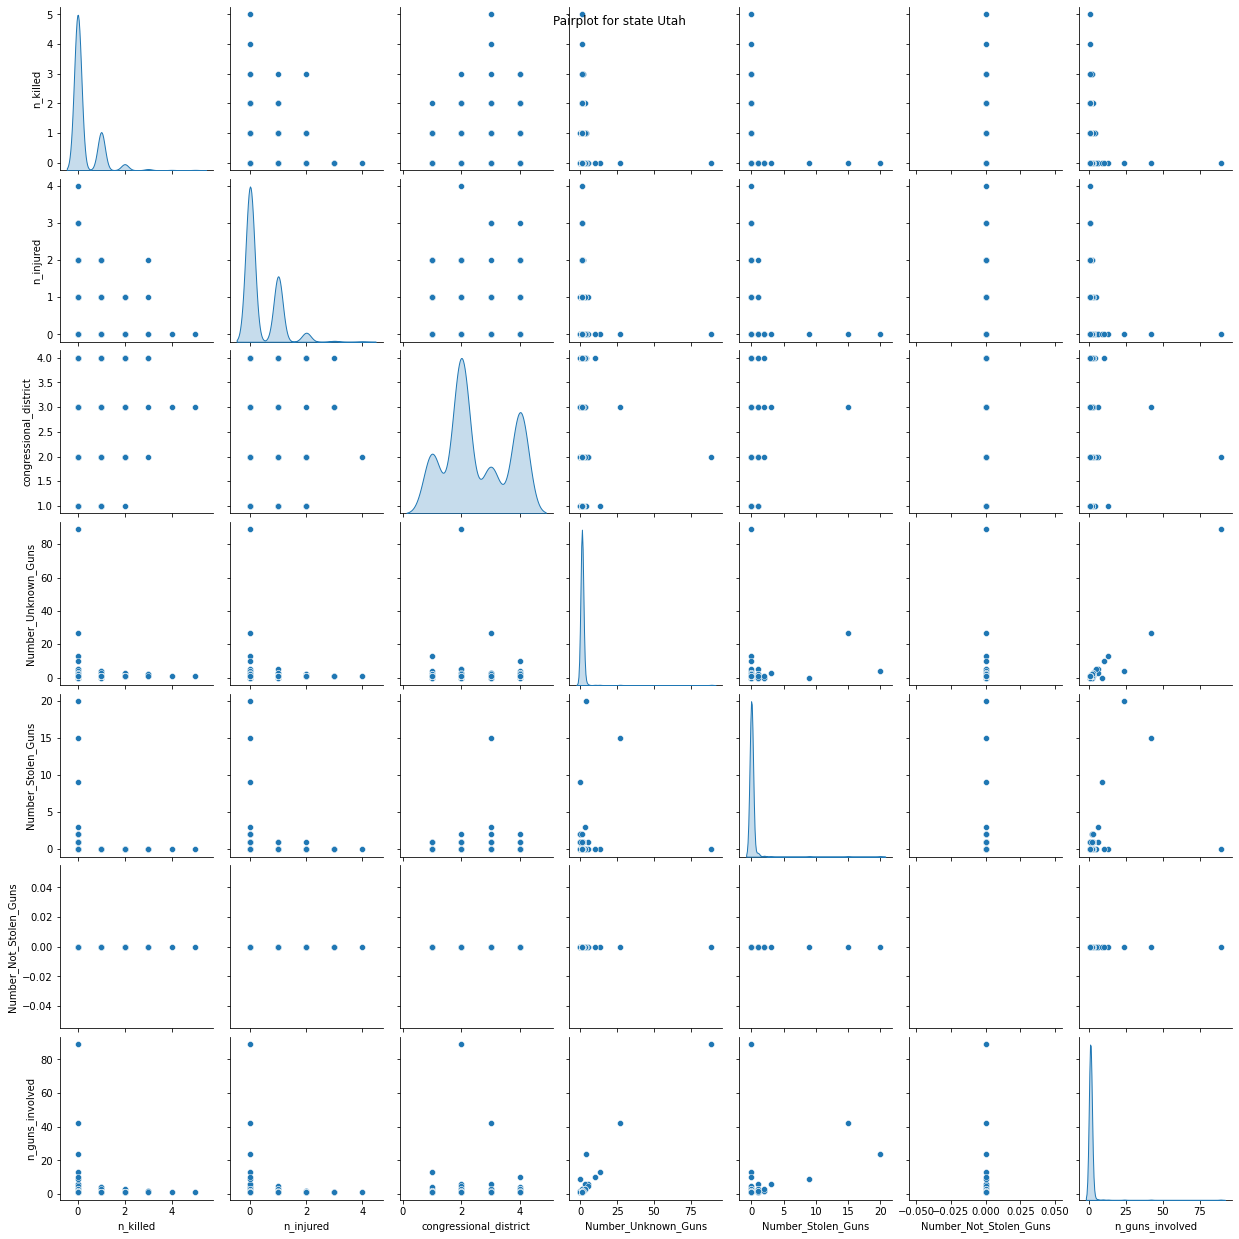

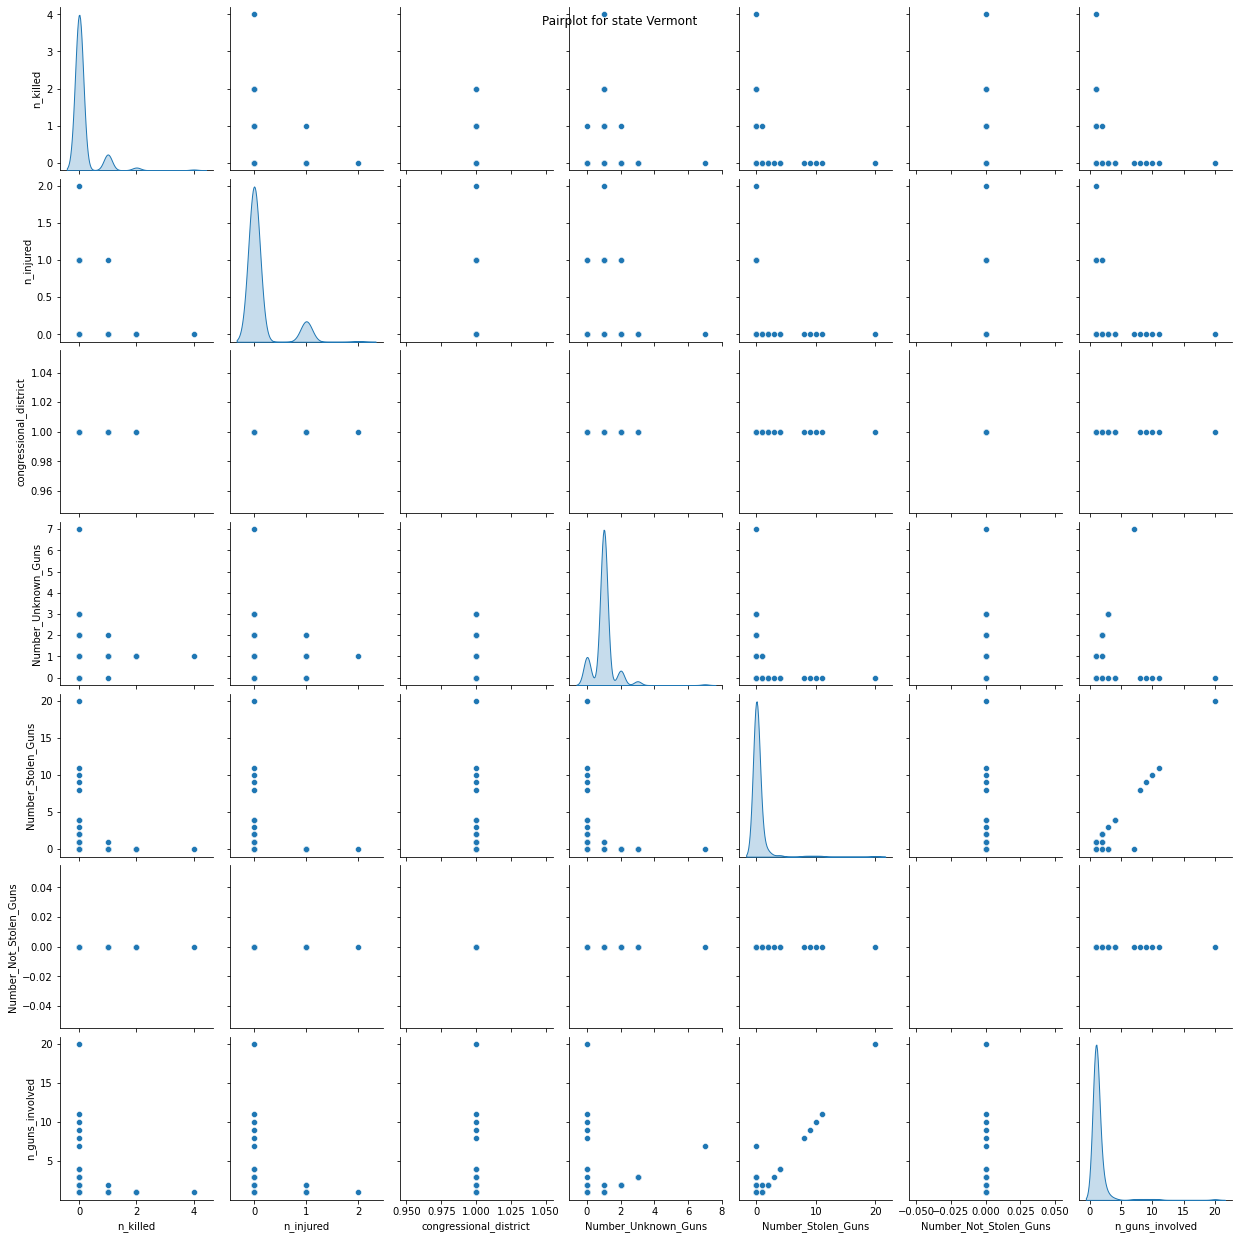

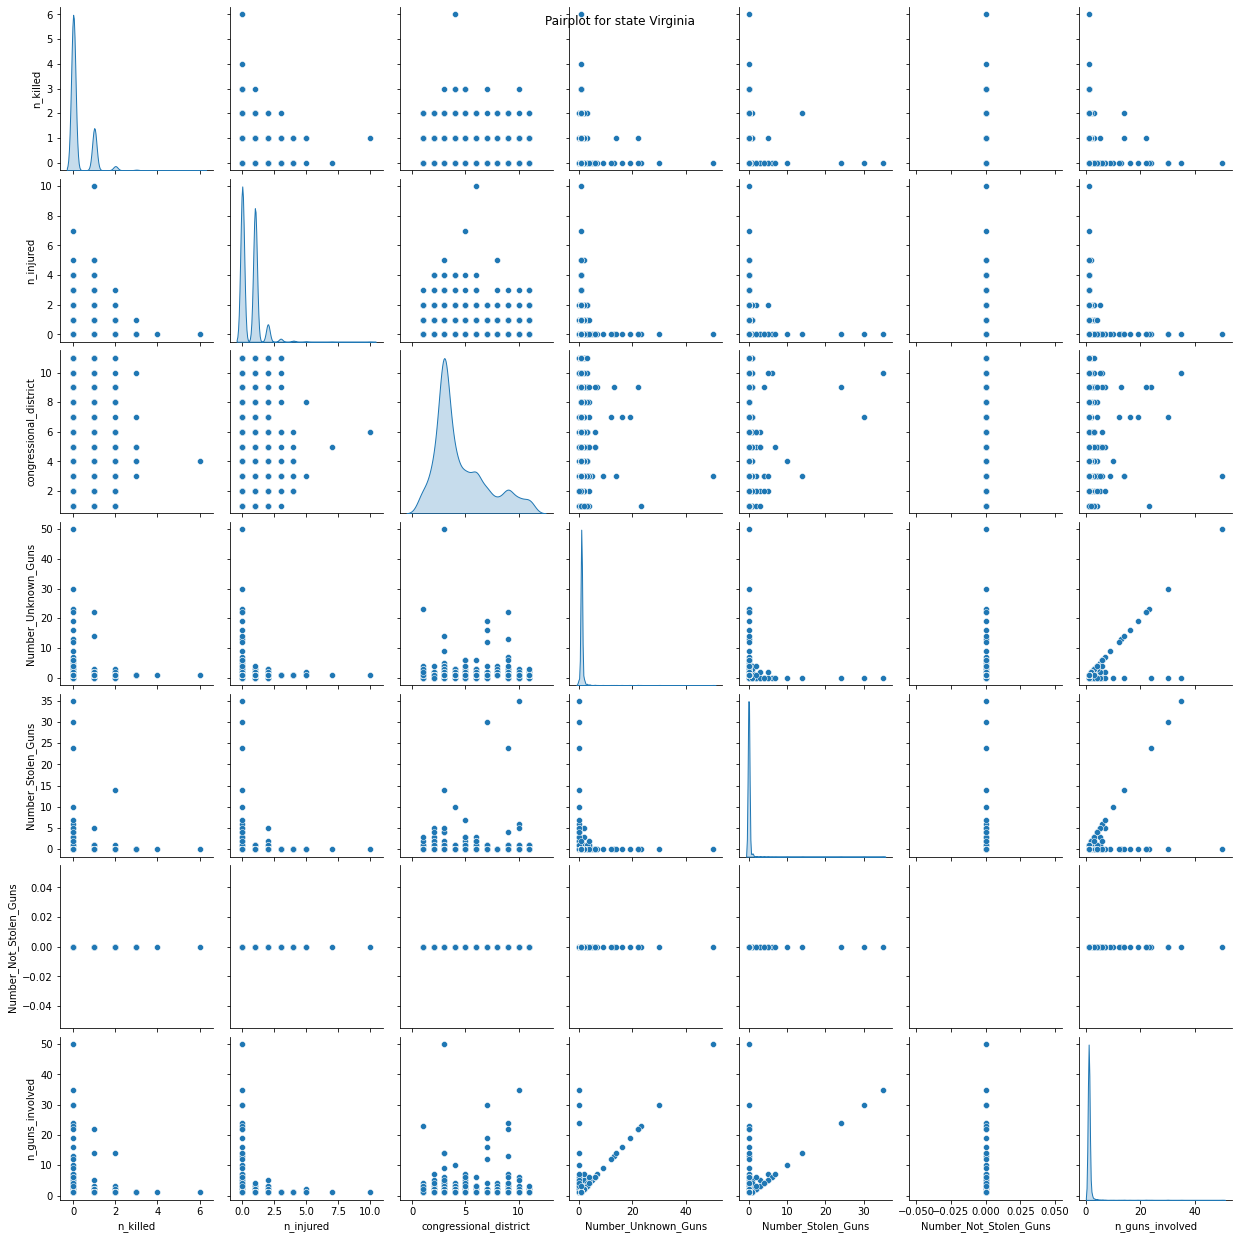

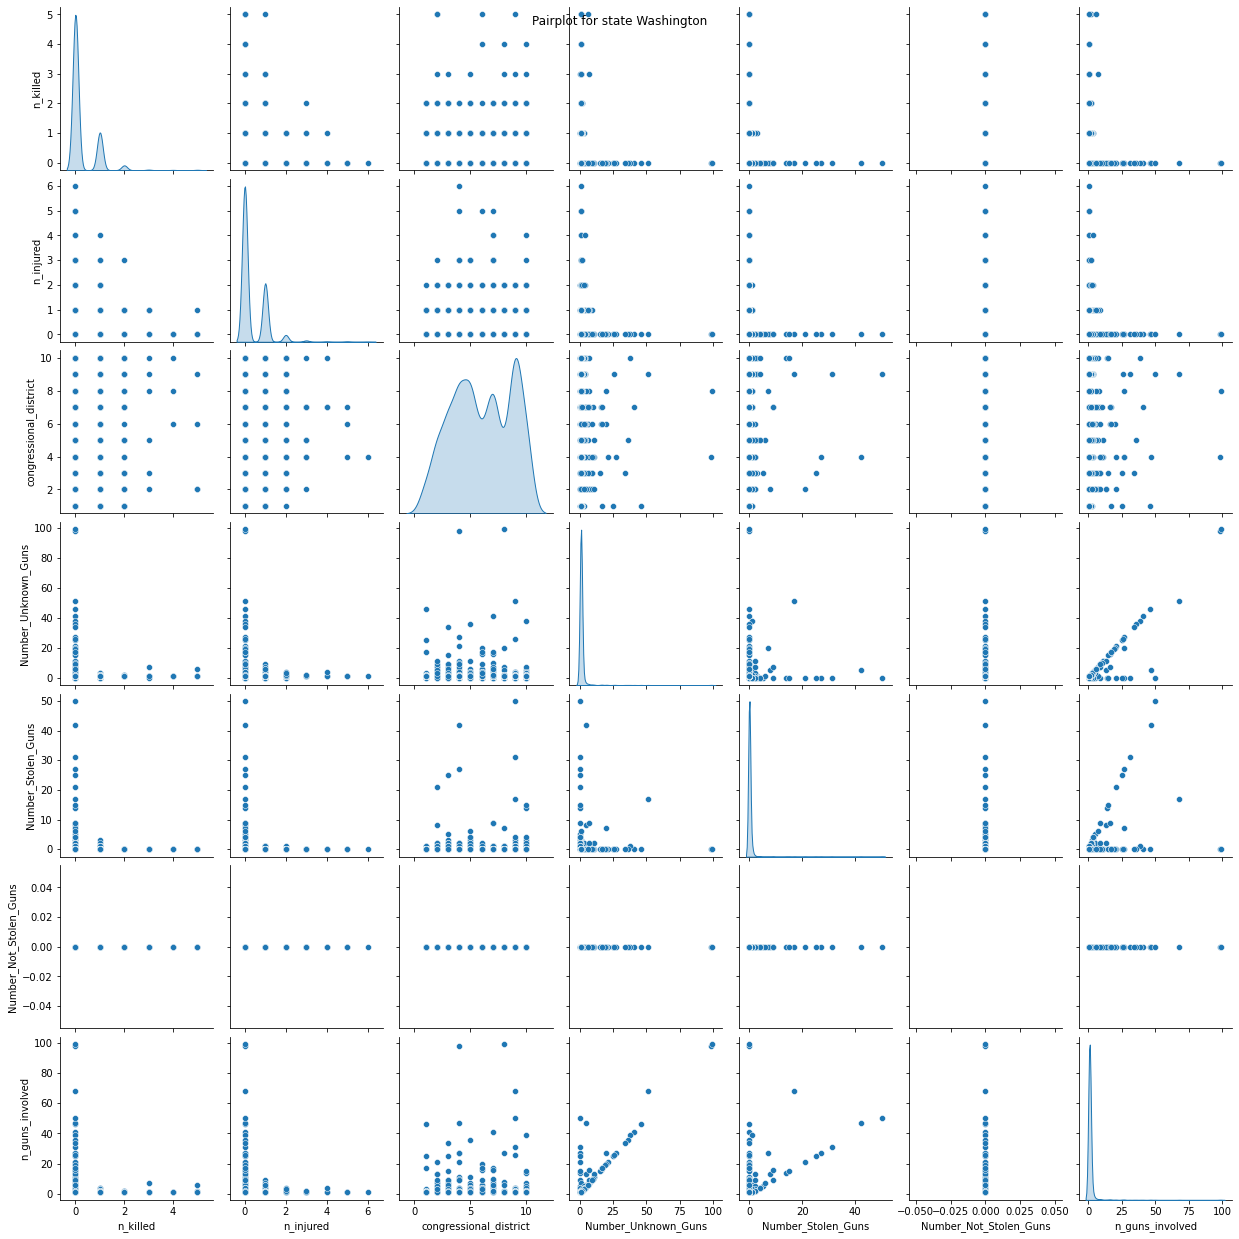

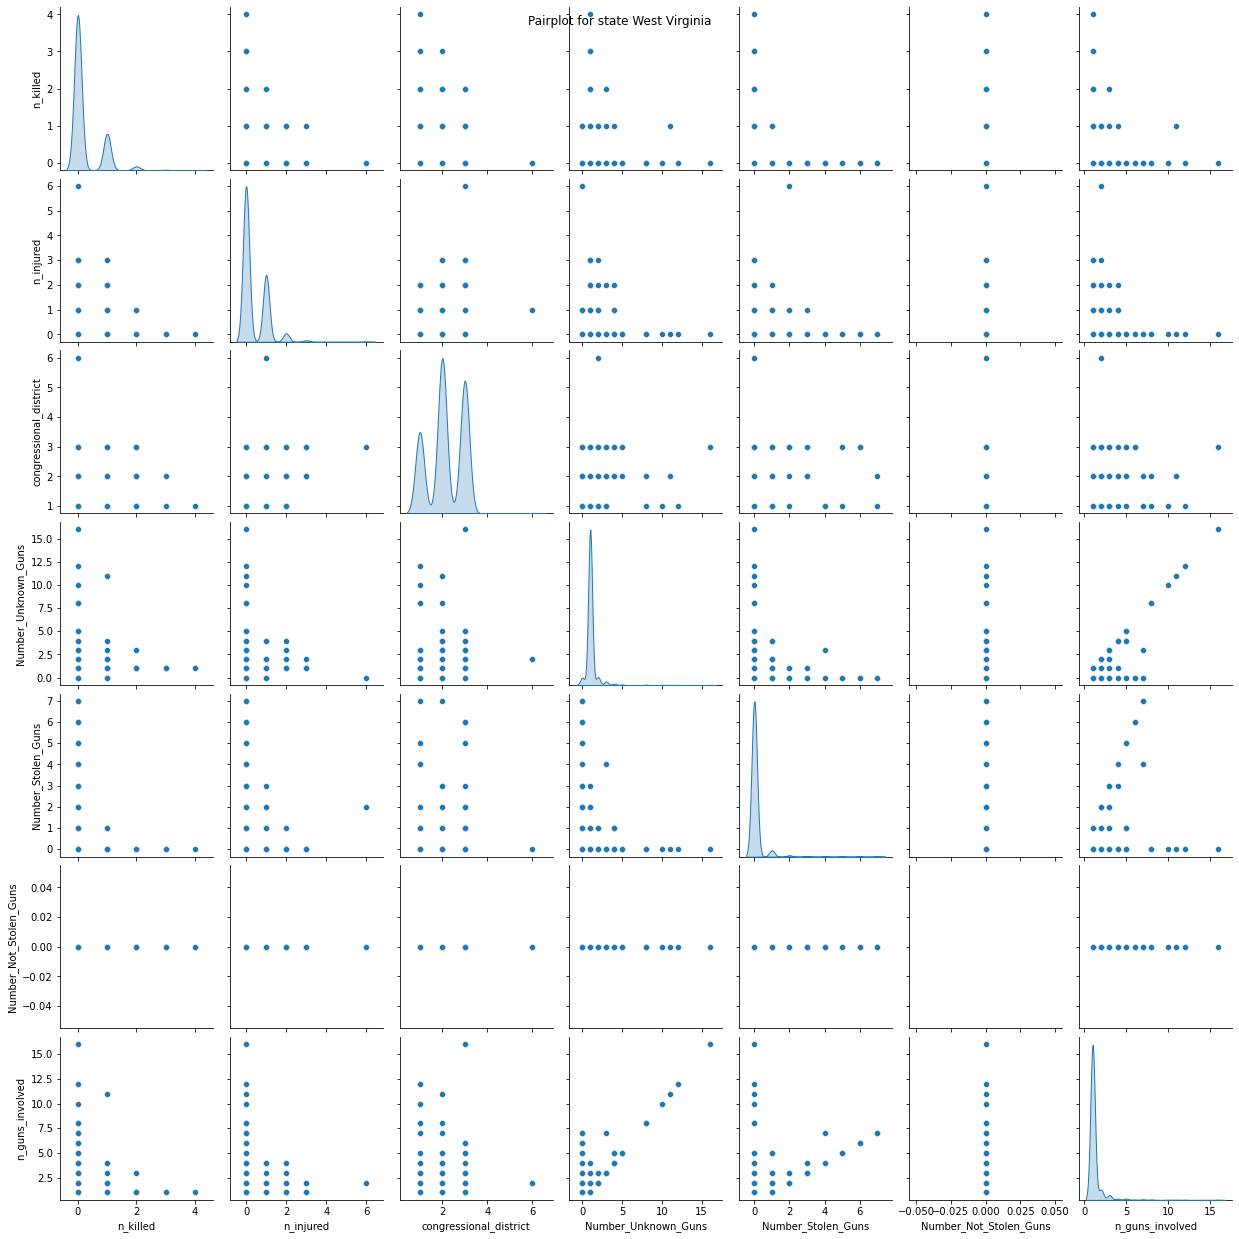

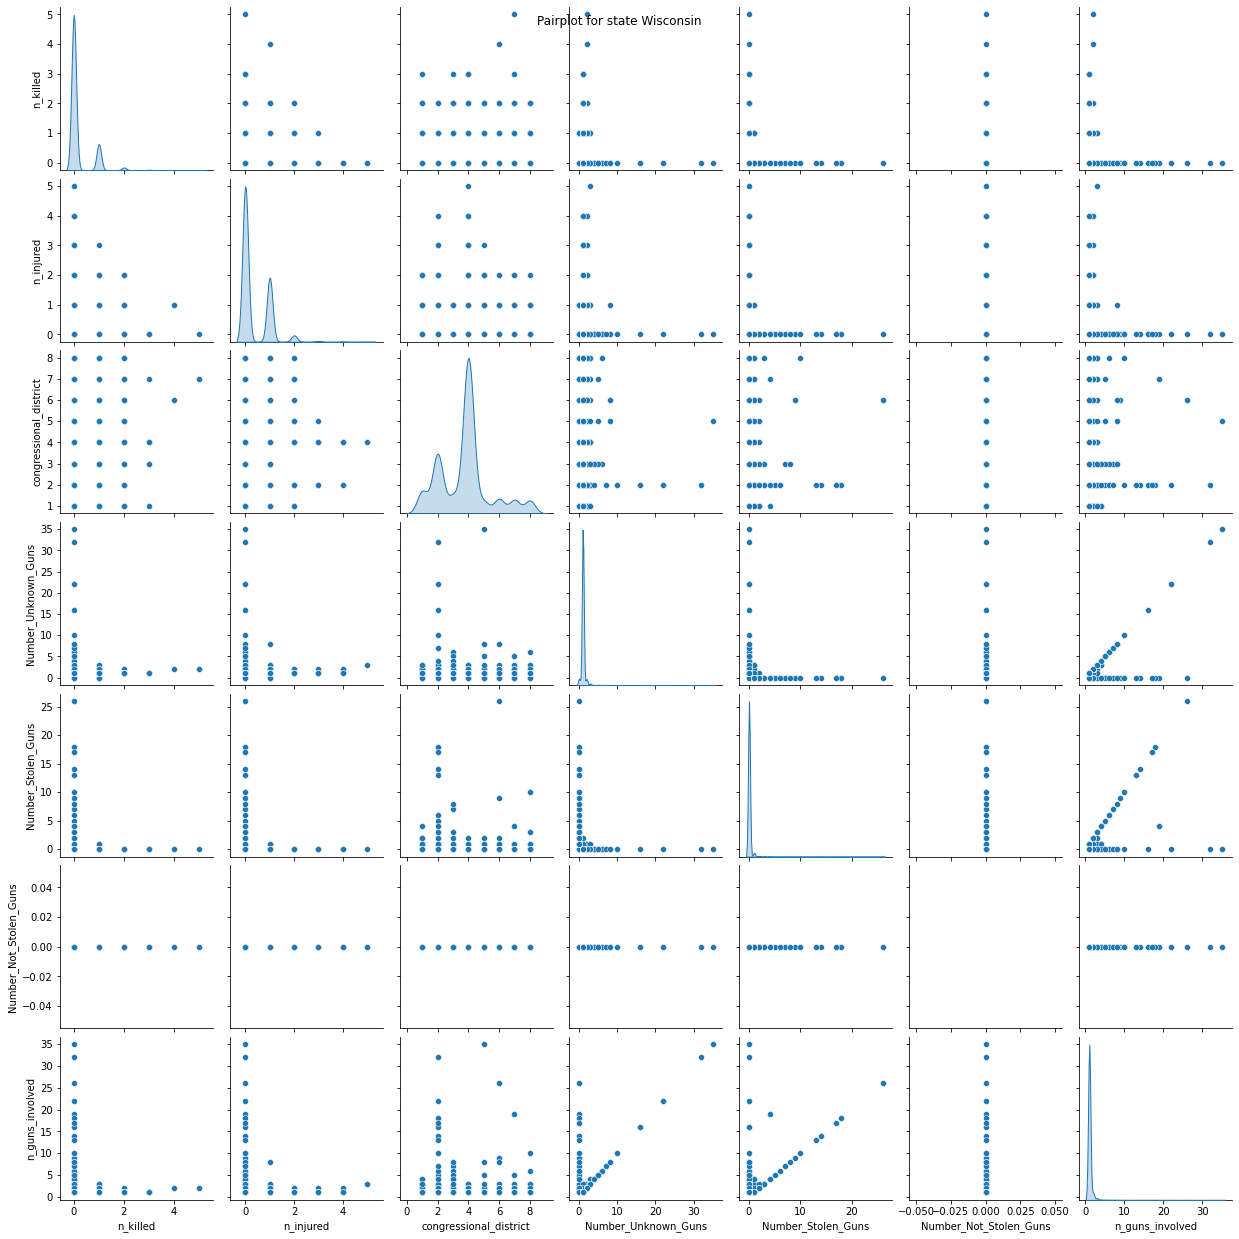

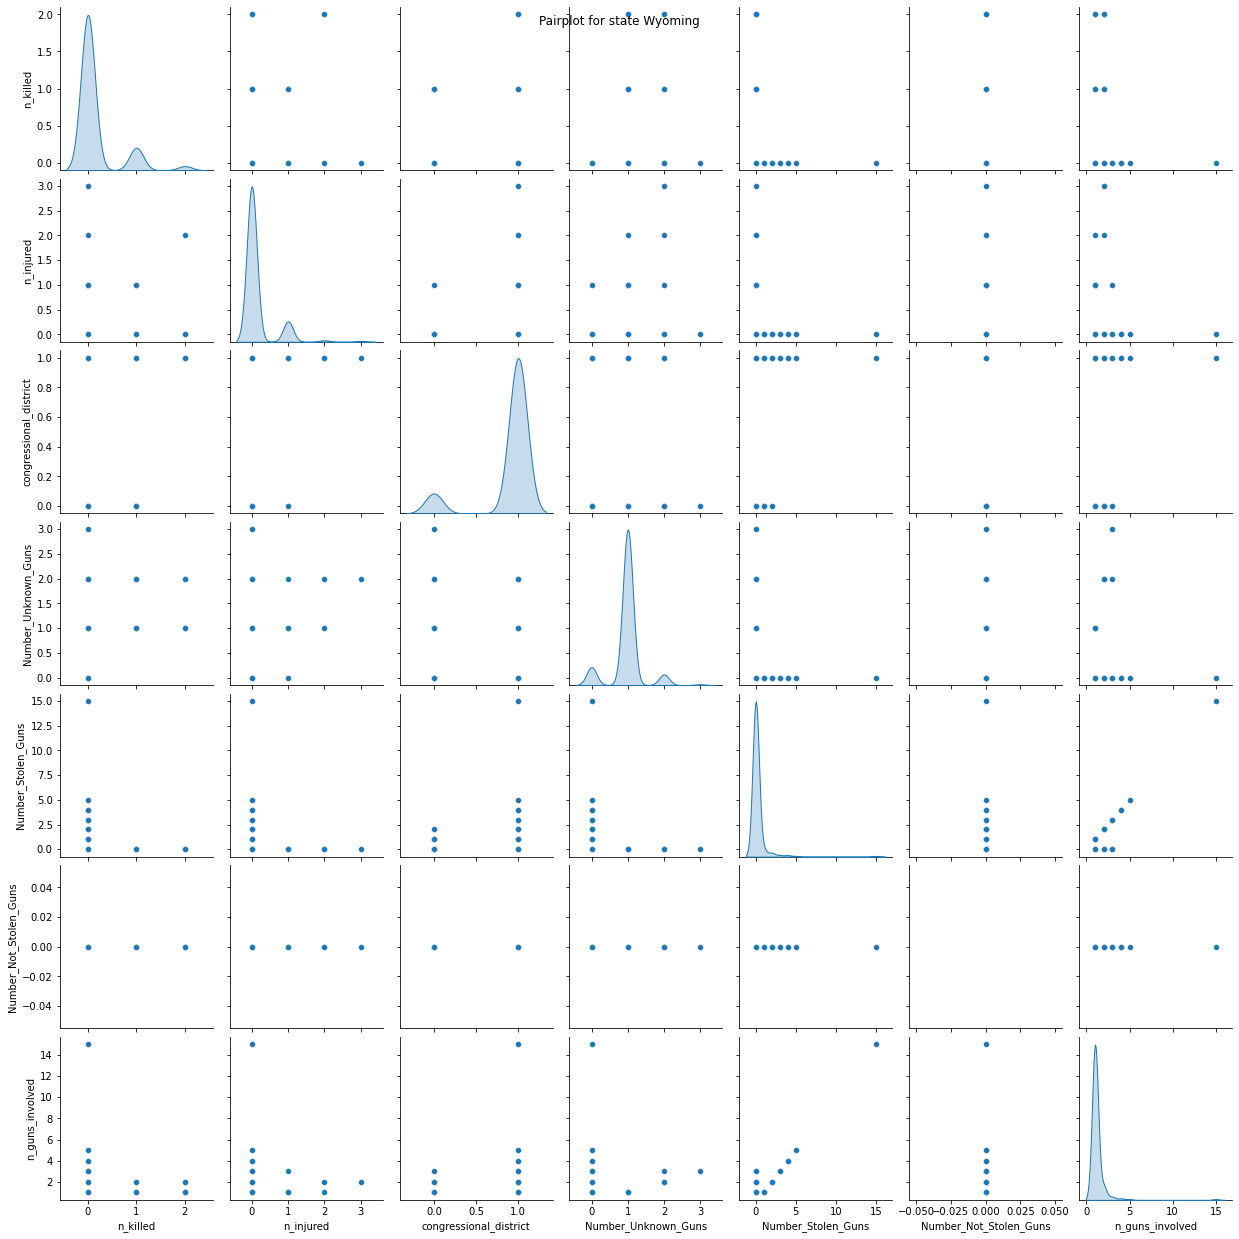

In [57]:
state_names = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", 
               "District of Columbia", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", 
               "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", 
               "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", 
               "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", 
               "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", 
               "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
for state in sorted(state_names) :
    sns.pairplot(pair_df[pair_df['state']==state],kind='scatter',diag_kind='kde')
    plt.suptitle('Pairplot for state {}'.format(state))
    plt.show()

### Histogram of States vs Incidents

<AxesSubplot:>

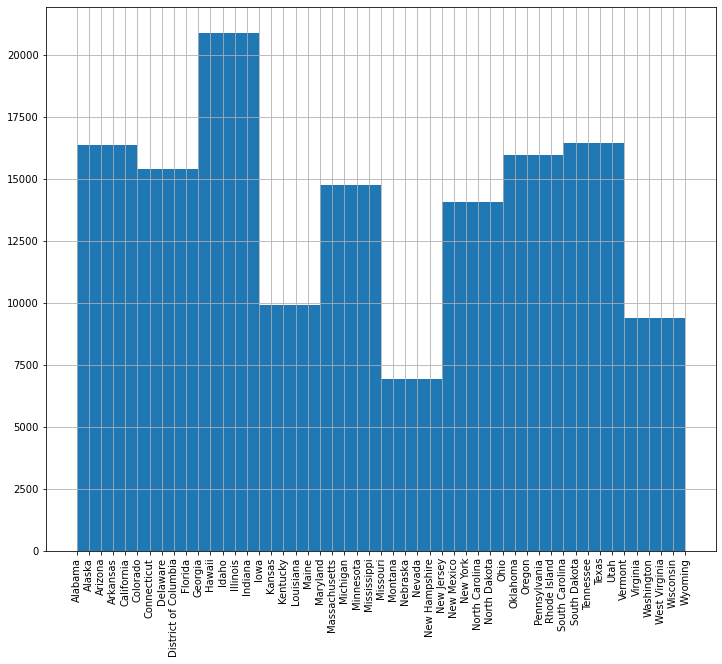

In [64]:
temp6['state'].hist(xrot=90, figsize=(12.0,10.0))